In [1]:
import os
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from diffusers import UNet2DConditionModel, DDIMScheduler, AutoencoderKL
from diffusers.optimization import get_cosine_schedule_with_warmup
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np
import time
import gc
from datetime import datetime
from torch.cuda.amp import autocast

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Loading VAE...
VAE load - missing keys: []
VAE load - unexpected keys: []
Initializing UNet and scheduler...
Loading model checkpoint...
Loaded EMA weights successfully
Loading test data...
Text embeddings shape: torch.Size([9573, 512])
Test dataset size: 958
Sample z shape: torch.Size([4, 32, 32])
Sample embedding shape: torch.Size([512])

=== Testing on a single sample first ===
Test sample shapes - z: torch.Size([4, 32, 32]), embedding: torch.Size([512])
Quick test with 10 steps...
x_t shape: torch.Size([1, 4, 32, 32])
t_tensor shape: torch.Size([1])
emb0_batch shape: torch.Size([1, 1, 512])
Forward pass successful! Noise pred shape: torch.Size([1, 4, 32, 32])
Model is working! Proceeding with full inference...

=== Testing with random samples from test set ===
Running inference on test sample 59...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 57.78it/s]


Saved results to ./inference_results/test_sample_59_progression.png and ./inference_results/test_sample_59_final.png
Running inference on test sample 256...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 61.74it/s]


Saved results to ./inference_results/test_sample_256_progression.png and ./inference_results/test_sample_256_final.png
Running inference on test sample 300...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 61.64it/s]


Saved results to ./inference_results/test_sample_300_progression.png and ./inference_results/test_sample_300_final.png

=== Testing different guidance scales ===
Running inference with guidance scale 1.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 55.77it/s]


Saved results to ./inference_results/guidance_scale_1.0_progression.png and ./inference_results/guidance_scale_1.0_final.png
Running inference with guidance scale 5.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 57.19it/s]


Saved results to ./inference_results/guidance_scale_5.0_progression.png and ./inference_results/guidance_scale_5.0_final.png
Running inference with guidance scale 7.5...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 60.39it/s]


Saved results to ./inference_results/guidance_scale_7.5_progression.png and ./inference_results/guidance_scale_7.5_final.png
Running inference with guidance scale 10.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 58.88it/s]


Saved results to ./inference_results/guidance_scale_10.0_progression.png and ./inference_results/guidance_scale_10.0_final.png

=== Creating guidance scale comparison grid ===
Generating for sample 0 with guidance scale 1.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 62.64it/s]


Generating for sample 0 with guidance scale 3.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 62.79it/s]


Generating for sample 0 with guidance scale 5.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 62.74it/s]


Generating for sample 0 with guidance scale 7.5...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 62.64it/s]


Generating for sample 0 with guidance scale 10.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 62.63it/s]


Saved guidance grid to ./inference_results/sample_0_guidance_grid.png
Generating for sample 5 with guidance scale 1.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 58.75it/s]


Generating for sample 5 with guidance scale 3.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 60.56it/s]


Generating for sample 5 with guidance scale 5.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 60.81it/s]


Generating for sample 5 with guidance scale 7.5...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 63.21it/s]


Generating for sample 5 with guidance scale 10.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 62.75it/s]


Saved guidance grid to ./inference_results/sample_5_guidance_grid.png
Generating for sample 10 with guidance scale 1.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 62.23it/s]


Generating for sample 10 with guidance scale 3.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 63.05it/s]


Generating for sample 10 with guidance scale 5.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 61.04it/s]


Generating for sample 10 with guidance scale 7.5...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 63.06it/s]


Generating for sample 10 with guidance scale 10.0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...


100%|██████████| 50/50 [00:00<00:00, 61.75it/s]


Saved guidance grid to ./inference_results/sample_10_guidance_grid.png
Inference complete! Results saved to ./inference_results


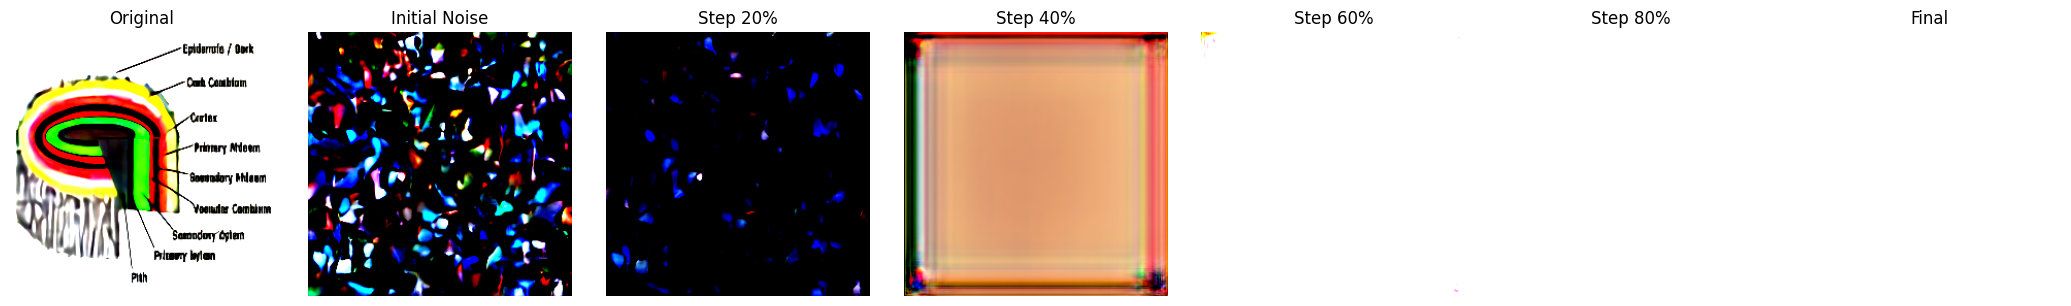

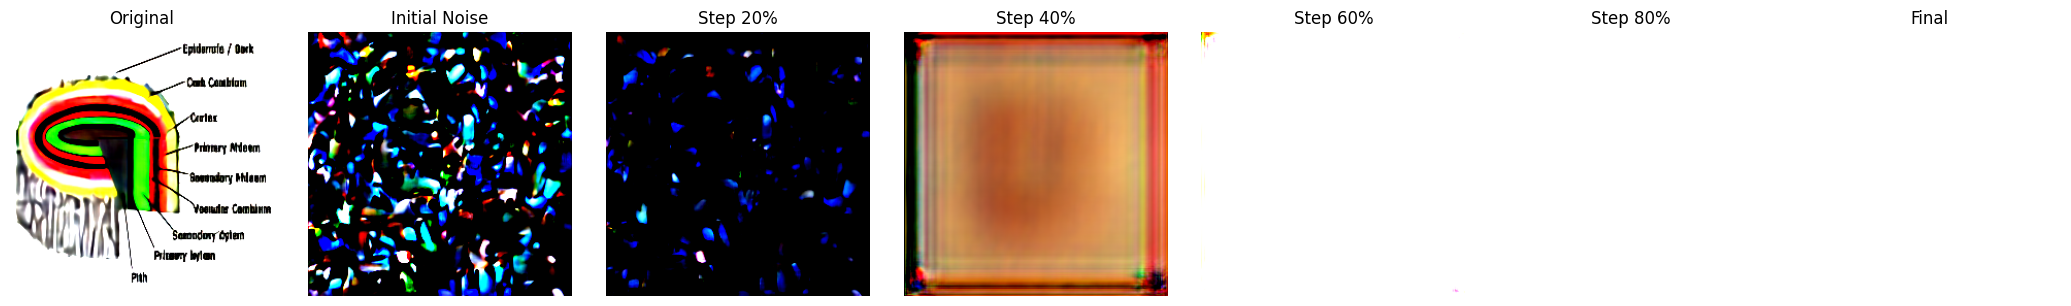

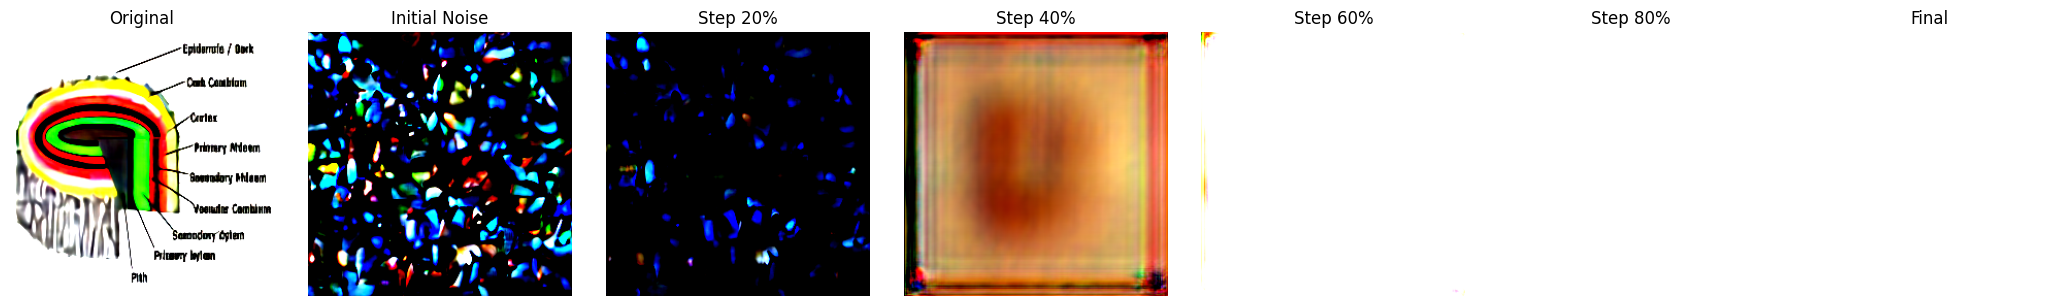

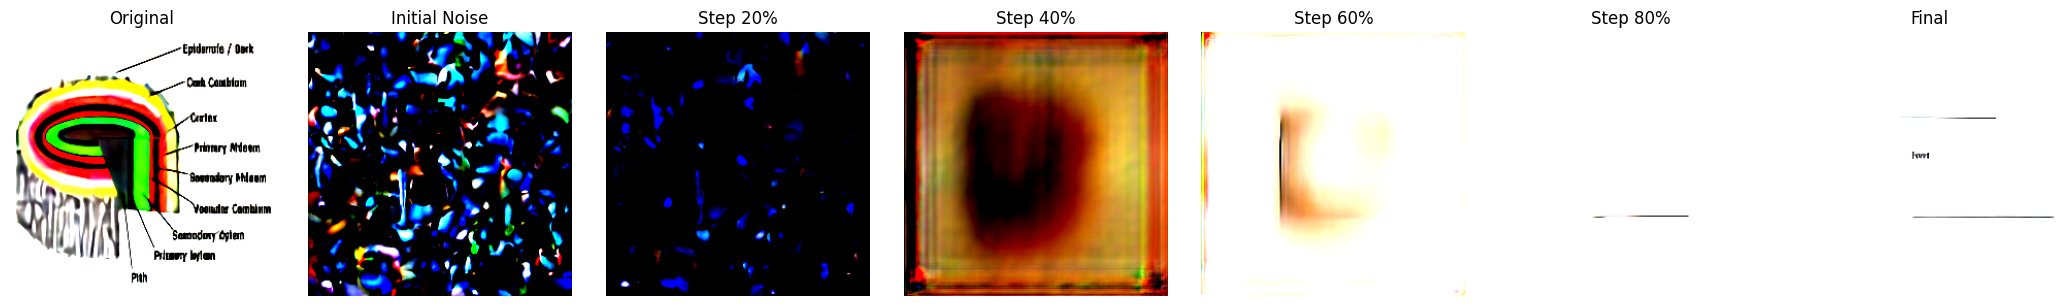

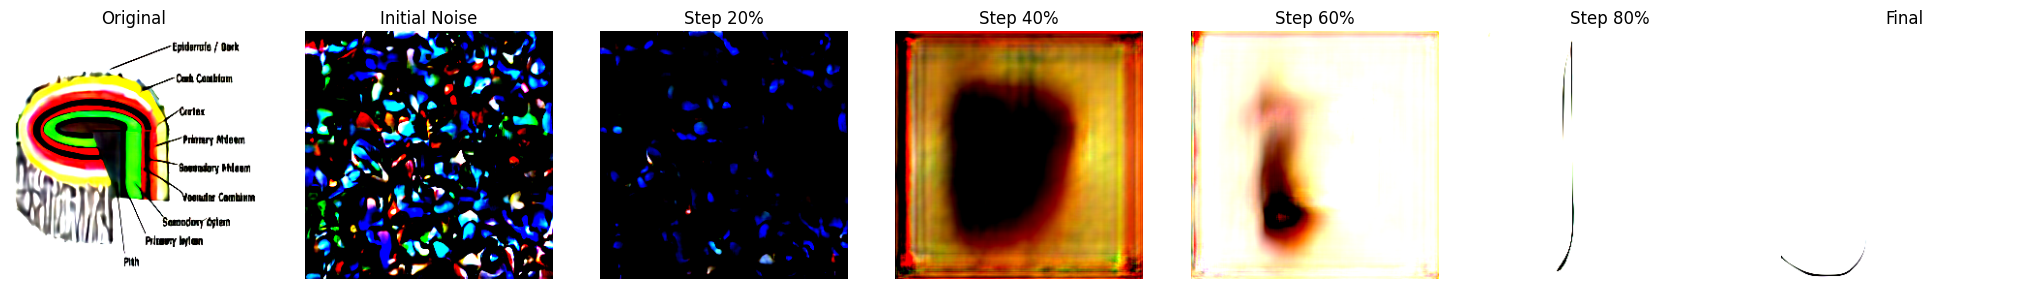

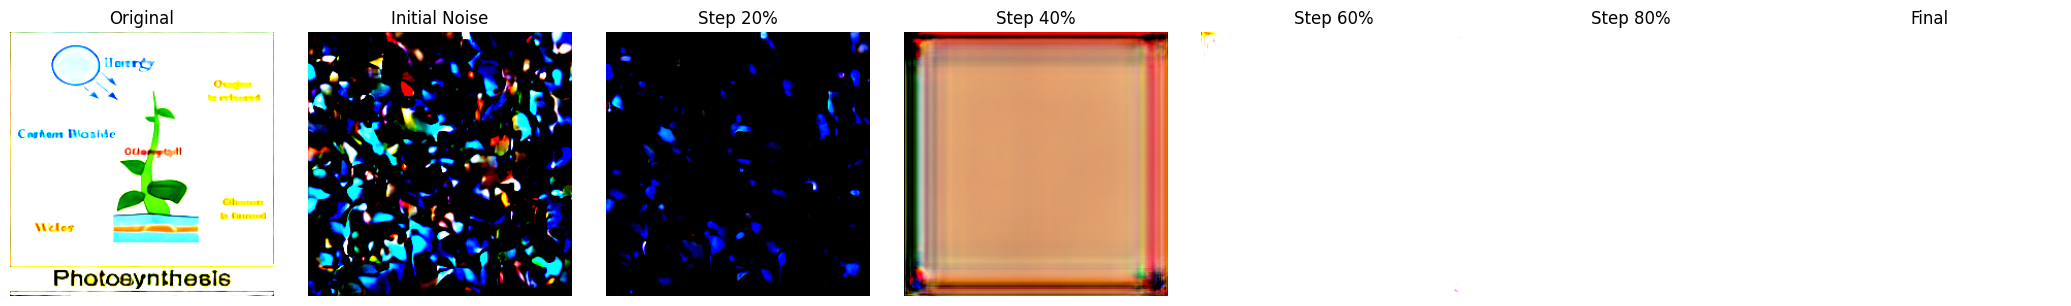

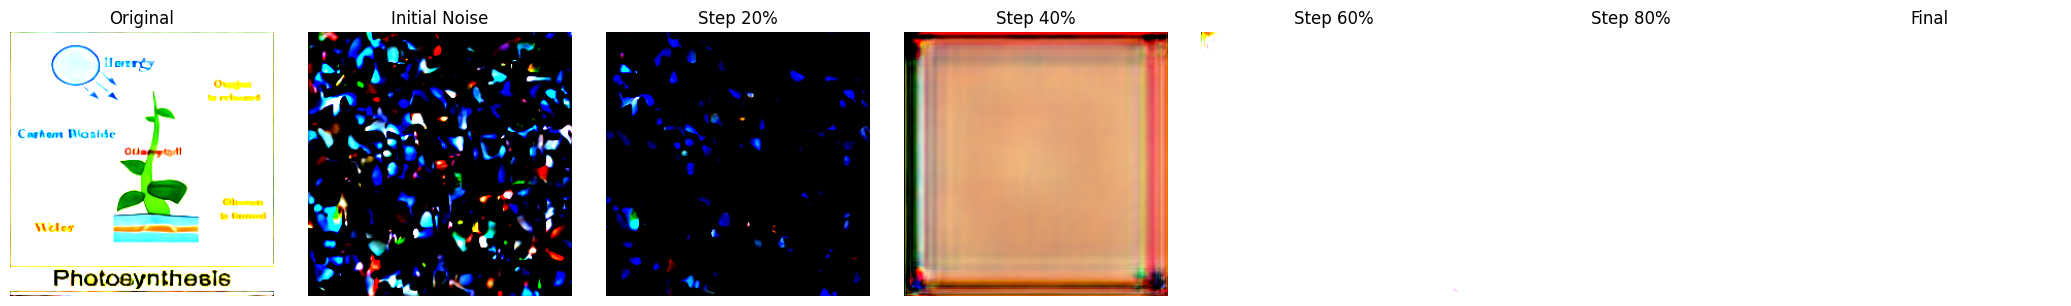

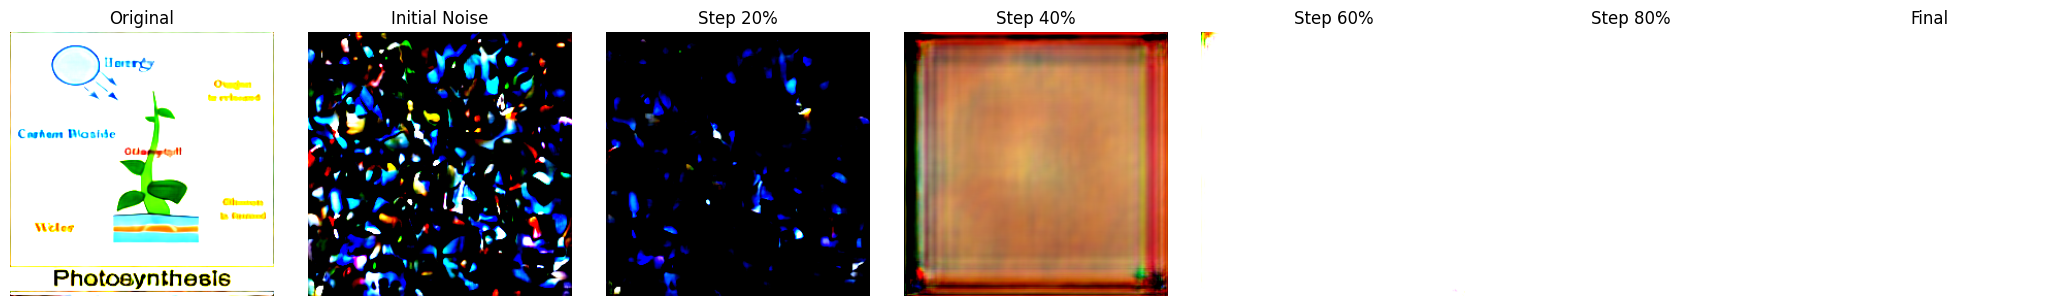

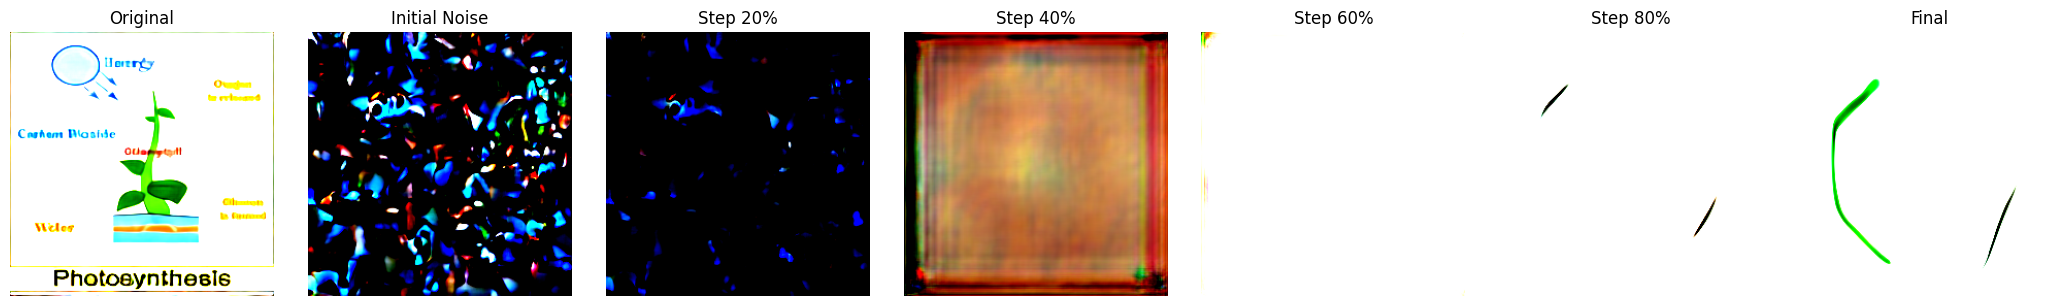

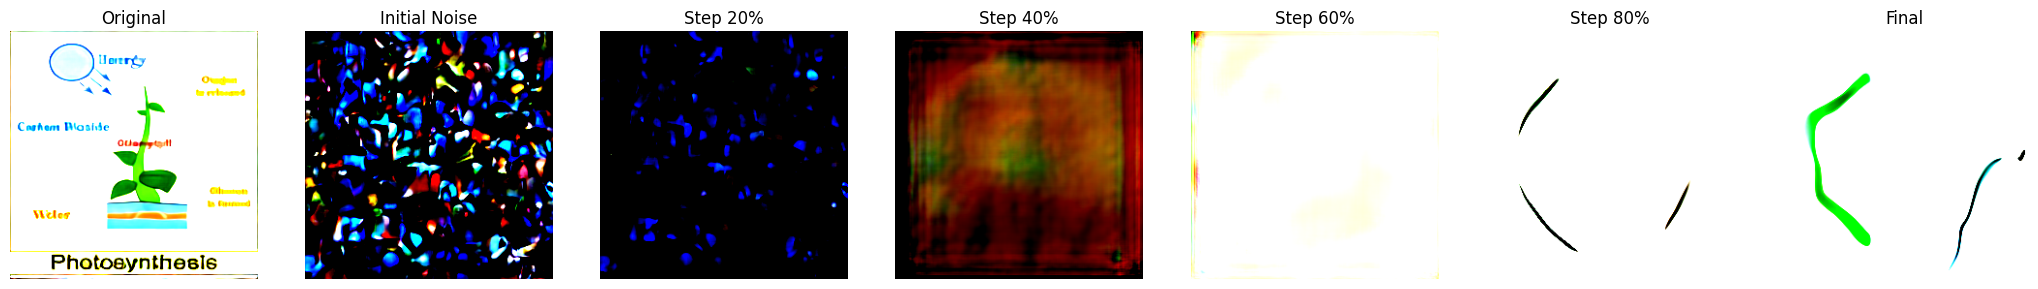

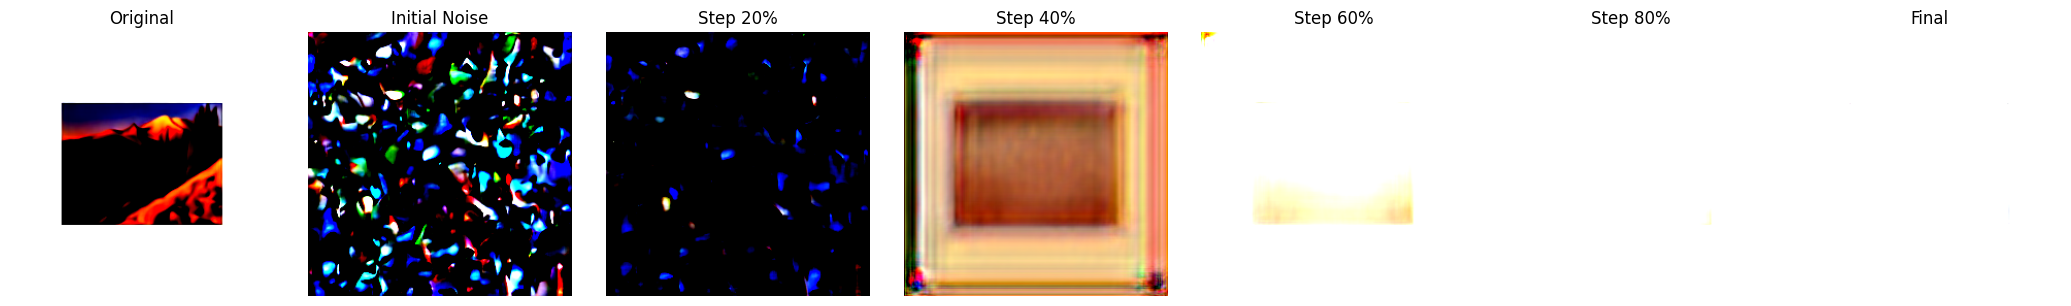

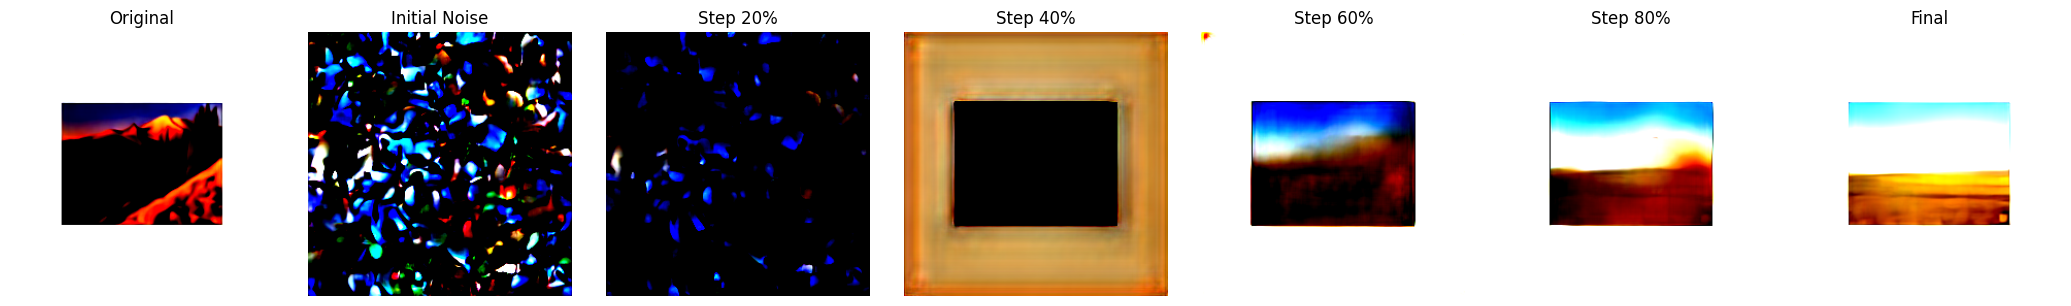

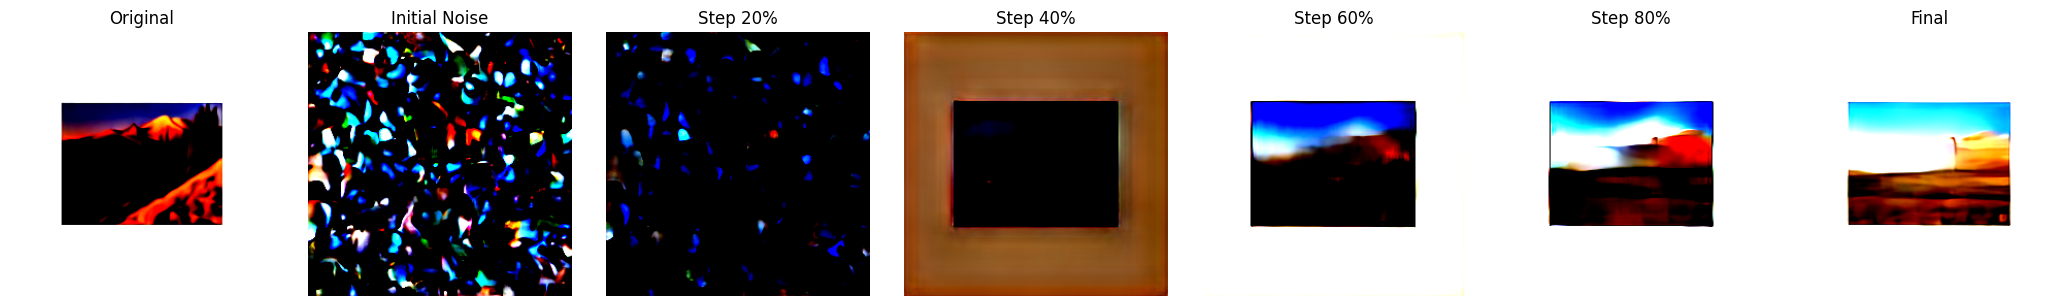

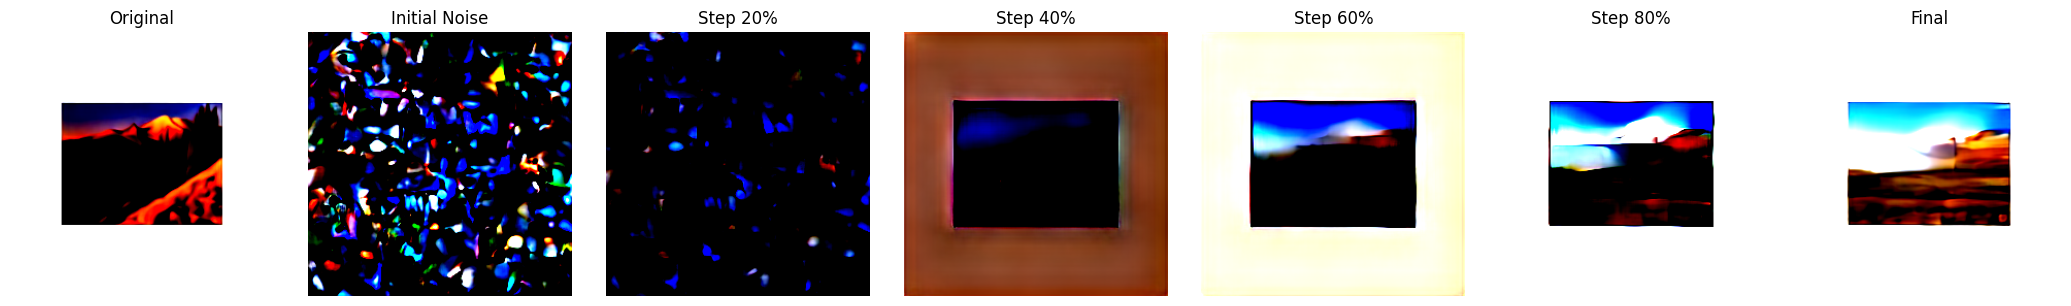

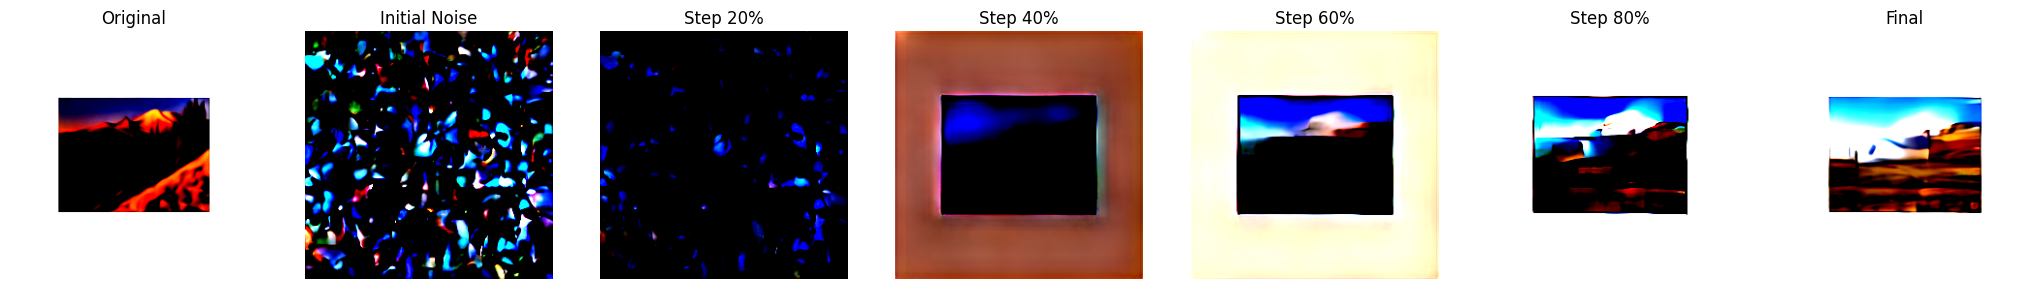

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from diffusers import AutoencoderKL, UNet2DConditionModel
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import os

# Create output directories if they don't exist
output_dir = "./inference_results"
os.makedirs(output_dir, exist_ok=True)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# === Load Models & Scheduler ===

# 1) DDIM Scheduler (unchanged)
class DDIMScheduler:
    def __init__(self, num_train_timesteps=1000, beta_start=1e-4, beta_end=0.02):
        self.num_train_timesteps = num_train_timesteps
        self.betas = torch.linspace(beta_start, beta_end, num_train_timesteps, device=device)
        self.alphas = 1 - self.betas
        self.alpha_cumprod = torch.cumprod(self.alphas, dim=0)
        self.sqrt_alpha_cumprod = torch.sqrt(self.alpha_cumprod)
        self.sqrt_one_minus_alpha_cumprod = torch.sqrt(1 - self.alpha_cumprod)

    def add_noise(self, x0, t, noise):
        a = self.sqrt_alpha_cumprod[t][:, None, None, None]
        b = self.sqrt_one_minus_alpha_cumprod[t][:, None, None, None]
        return a * x0 + b * noise

    def _get_prev(self, t, steps):
        step_ratio = self.num_train_timesteps // steps
        prev = torch.clamp(t - step_ratio, min=0).to(device)
        return prev

    def step(self, model_out, t, sample, guidance_scale, num_inference_steps):
        if isinstance(t, int):
            t = torch.tensor([t], device=device)
        if t.dim()==0:
            t = t.unsqueeze(0)
        prev_t    = self._get_prev(t, num_inference_steps)
        alpha_t   = self.alpha_cumprod[t][:,None,None,None]
        alpha_prev= self.alpha_cumprod[prev_t][:,None,None,None]
        pred_orig = (sample - torch.sqrt(1-alpha_t)*model_out) / torch.sqrt(alpha_t)
        sigma     = torch.sqrt((1-alpha_prev)/(1-alpha_t) * (1 - alpha_t/alpha_prev))
        return torch.sqrt(alpha_prev)*pred_orig + sigma * model_out

    def get_timesteps_for_inference(self, steps):
        ratio = self.num_train_timesteps // steps
        ts = list(range(0, self.num_train_timesteps, ratio))
        return sorted(ts, reverse=True)


# 2) Text-conditioned U-Net
class TextConditionedUNet(nn.Module):
    def __init__(self, text_dim=512):
        super().__init__()
        self.unet = UNet2DConditionModel(
            sample_size=32, in_channels=4, out_channels=4,
            layers_per_block=2, block_out_channels=(256,512,768,1024),
            down_block_types=("DownBlock2D","DownBlock2D","CrossAttnDownBlock2D","CrossAttnDownBlock2D"),
            up_block_types=("CrossAttnUpBlock2D","CrossAttnUpBlock2D","UpBlock2D","UpBlock2D"),
            cross_attention_dim=text_dim, attention_head_dim=64, dropout=0.1
        ).to(device)

    def forward(self, x, t, emb, guidance_scale=1.0):
        # Make sure emb has shape [batch, seq_len, hidden_dim]
        if emb.dim() == 2:  # [batch, hidden_dim]
            emb = emb.unsqueeze(1)
        elif emb.dim() == 3 and emb.shape[1] == 1 and emb.shape[2] == 512:  # [batch, 1, hidden_dim]
            pass  # Already in correct format
        else:
            print(f"Embedding shape before processing: {emb.shape}")
            raise ValueError(f"Expected text embeddings with shape [batch, 512] or [batch, 1, 512], got {emb.shape}")

        if guidance_scale == 1.0:
            return self.unet(x, t, encoder_hidden_states=emb).sample

        # For classifier-free guidance, we need to create a null embedding
        uncond = torch.zeros_like(emb)
        emb_cat = torch.cat([uncond, emb], dim=0)
        x_cat = torch.cat([x, x], dim=0)
        t_cat = torch.cat([t, t], dim=0)

        # Forward pass
        pred = self.unet(x_cat, t_cat, encoder_hidden_states=emb_cat).sample
        noise_u, noise_c = pred.chunk(2)
        return noise_u + guidance_scale * (noise_c - noise_u)


# 3) Load your VAE
print("Loading VAE...")
vae = AutoencoderKL.from_pretrained(
    "runwayml/stable-diffusion-v1-5", subfolder="vae"
).to(device)
ckpt = torch.load("best_fine_tuned_vae.pth", map_location=device)
missing, unexpected = vae.load_state_dict(ckpt, strict=False)
print("VAE load - missing keys:", missing)
print("VAE load - unexpected keys:", unexpected)
vae.eval()

# Get VAE scaling factor
scale = vae.config.scaling_factor  # ≈0.18215

# 4) EMA helper (for loading EMA weights)
class EMA:
    def __init__(self, model, decay=0.9999):
        self.decay  = decay
        self.shadow = {n:p.data.clone() for n,p in model.named_parameters() if p.requires_grad}
        self.backup = {}
    def update(self, model):
        for n,p in model.named_parameters():
            if p.requires_grad:
                self.shadow[n] = self.decay * self.shadow[n] + (1-self.decay) * p.data
    def apply_shadow(self, model):
        for n,p in model.named_parameters():
            if p.requires_grad:
                self.backup[n] = p.data
                p.data        = self.shadow[n]
    def restore(self, model):
        for n,p in model.named_parameters():
            if p.requires_grad:
                p.data = self.backup[n]
        self.backup.clear()
    def state_dict(self):    return self.shadow
    def load_state_dict(self, sd): self.shadow = sd

# 5) Instantiate UNet, scheduler, EMA
print("Initializing UNet and scheduler...")
unet = TextConditionedUNet(text_dim=512)
scheduler = DDIMScheduler(num_train_timesteps=1000)
ema = EMA(unet)

# 6) Load your trained model weights (preferably EMA weights)
print("Loading model checkpoint...")
try:
    ema_state = torch.load("outputs/best_diffusion_model_ema.pth", map_location=device)
    ema.load_state_dict(ema_state)
    ema.apply_shadow(unet)
    print("Loaded EMA weights successfully")
except:
    print("Failed to load EMA weights, trying regular model weights...")
    model_state = torch.load("./best_diffusion_model.pth", map_location=device)
    unet.load_state_dict(model_state)
    print("Loaded regular model weights")

unet.eval()

# === Load Test Data ===
print("Loading test data...")
data = torch.load("latent_text_data.pt")
latents_raw = data["z"].float()  # [N,4,32,32], raw
text_embeddings = data["text_embeddings"].float()

# Print the shape to verify
print(f"Text embeddings shape: {text_embeddings.shape}")

# Adjust embeddings as needed to ensure correct format
if text_embeddings.dim() == 2:  # [N, 512]
    # This is already in the correct format for our later processing
    pass
elif text_embeddings.dim() == 3 and text_embeddings.shape[2] == 512:  # [N, seq_len, 512]
    # Already in the expected format
    pass
else:
    print(f"Warning: Unexpected text embeddings shape: {text_embeddings.shape}")
    # Try to reshape if possible
    if text_embeddings.dim() == 3 and text_embeddings.shape[1] == 512:
        text_embeddings = text_embeddings.transpose(1, 2)
        print(f"Reshaped to: {text_embeddings.shape}")

# Deterministic splits (same as during training)
total_samples = len(latents_raw)
perm = torch.randperm(total_samples, generator=torch.Generator().manual_seed(42))
train_end = int(0.8 * total_samples)
val_end = train_end + int(0.1 * total_samples)
test_idx = perm[val_end:]

# Dataset with scaling
class LatentTextDataset(Dataset):
    def __init__(self, latents_raw, text_embs, scale):
        self.latents_raw = latents_raw
        self.text_embs = text_embs
        self.scale = scale

    def __len__(self):
        return len(self.latents_raw)

    def __getitem__(self, idx):
        z = self.latents_raw[idx] * self.scale
        return z, self.text_embs[idx]

test_ds = LatentTextDataset(latents_raw[test_idx], text_embeddings[test_idx], scale)
print(f"Test dataset size: {len(test_ds)}")

# Let's examine one sample
sample_z, sample_emb = test_ds[0]
print(f"Sample z shape: {sample_z.shape}")
print(f"Sample embedding shape: {sample_emb.shape}")

# === Inference Functions ===

def run_inference_on_test_sample(sample_idx=0, guidance_scale=7.5, steps=100):
    """Run inference on a specific test sample"""
    # Get test sample
    z0, emb0 = test_ds[sample_idx]
    z0 = z0.unsqueeze(0).to(device)

    # Ensure embedding has correct shape [batch, seq_len, dim]
    if emb0.dim() == 1:  # [512]
        emb0 = emb0.unsqueeze(0).unsqueeze(0)  # [1, 1, 512]
    elif emb0.dim() == 2:  # [1, 512] or similar
        if emb0.shape[0] == 512:  # Transposed
            emb0 = emb0.unsqueeze(0).transpose(1, 2)  # [1, 1, 512]
        else:
            emb0 = emb0.unsqueeze(1)  # [1, 1, 512]

    emb0 = emb0.to(device)
    print(f"Inference embedding shape: {emb0.shape}")

    # Get original VAE reconstruction
    with torch.no_grad():
        recon0 = vae.decode(z0).sample.clamp(0, 1)
        orig_img = recon0[0].detach().permute(1, 2, 0).cpu().numpy()

    # Run diffusion from noise
    x_t = torch.randn_like(z0, device=device)
    timesteps = scheduler.get_timesteps_for_inference(steps=steps)

    # For visualization - just capture specific steps
    # Initialize with the first noisy latent
    latents_chain = [x_t.detach().cpu()]

    # Calculate how many steps to capture (max 5)
    total_capture = min(5, steps)
    capture_interval = max(1, steps // total_capture)

    print(f"Running {steps} denoising steps, capturing {total_capture} intermediate results...")
    with torch.no_grad():
        for i, step in enumerate(tqdm(timesteps)):
            t_tensor = torch.tensor([step], device=device)
            noise_pred = unet(x_t, t_tensor, emb0, guidance_scale=guidance_scale)
            x_t = scheduler.step(
                noise_pred, t_tensor, x_t,
                guidance_scale=guidance_scale,
                num_inference_steps=steps
            )

            # Only capture some of the steps for visualization to avoid memory issues
            if (i % capture_interval == 0) and (len(latents_chain) < total_capture):
                latents_chain.append(x_t.detach().cpu())

        # Always make sure we capture the final step
        if latents_chain[-1] is not x_t:
            latents_chain.append(x_t.detach().cpu())

        # Decode generated latent
        gen_img = vae.decode(x_t).sample.clamp(0, 1)
        gen_img = gen_img[0].detach().permute(1, 2, 0).cpu().numpy()

    # Visualize - create the right number of axes based on what we captured
    num_images = len(latents_chain) + 1  # +1 for original reconstruction
    fig, axs = plt.subplots(1, num_images, figsize=(num_images * 3, 3))

    # Original reconstruction
    axs[0].imshow(orig_img)
    axs[0].set_title("Original")
    axs[0].axis("off")

    # Initial noise + denoising steps
    for i, latent in enumerate(latents_chain, start=1):
        with torch.no_grad():  # Ensure no gradients
            img_t = vae.decode(latent.to(device)).sample.clamp(0, 1)
            # Use detach() before calling numpy()
            img = img_t[0].detach().permute(1, 2, 0).cpu().numpy()
        axs[i].imshow(img)

        if i == 1:
            axs[i].set_title("Initial Noise")
        elif i == len(latents_chain):
            axs[i].set_title("Final")
        else:
            # Calculate approximate percentage done
            percent = int((i - 1) / (len(latents_chain) - 1) * 100)
            axs[i].set_title(f"Step {percent}%")

        axs[i].axis("off")

    plt.tight_layout()
    return fig, gen_img


def generate_from_text(text_embedding, guidance_scale=7.5, steps=100):
    """Generate an image from a text embedding"""
    # Ensure embedding has correct shape [batch, seq_len, dim]
    if text_embedding.dim() == 1:  # [512]
        text_embedding = text_embedding.unsqueeze(0).unsqueeze(0)  # [1, 1, 512]
    elif text_embedding.dim() == 2:  # [1, 512] or similar
        if text_embedding.shape[0] == 512:  # Transposed
            text_embedding = text_embedding.unsqueeze(0).transpose(1, 2)  # [1, 1, 512]
        else:
            text_embedding = text_embedding.unsqueeze(1)  # [1, 1, 512]

    text_embedding = text_embedding.to(device)
    print(f"Generation embedding shape: {text_embedding.shape}")

    # Start from random noise
    x_t = torch.randn(1, 4, 32, 32, device=device)
    timesteps = scheduler.get_timesteps_for_inference(steps=steps)

    # For visualization - just capture specific steps (max 5)
    latents_chain = [x_t.detach().cpu()]

    # Calculate how many steps to capture
    total_capture = min(5, steps)
    capture_interval = max(1, steps // total_capture)

    print(f"Running {steps} denoising steps, capturing {total_capture} intermediate results...")
    with torch.no_grad():
        for i, step in enumerate(tqdm(timesteps)):
            t_tensor = torch.tensor([step], device=device)
            noise_pred = unet(x_t, t_tensor, text_embedding, guidance_scale=guidance_scale)
            x_t = scheduler.step(
                noise_pred, t_tensor, x_t,
                guidance_scale=guidance_scale,
                num_inference_steps=steps
            )

            # Only capture some of the steps for visualization
            if (i % capture_interval == 0) and (len(latents_chain) < total_capture):
                latents_chain.append(x_t.detach().cpu())

        # Always capture the final step
        if latents_chain[-1] is not x_t:
            latents_chain.append(x_t.detach().cpu())

        # Decode generated latent
        gen_img = vae.decode(x_t).sample.clamp(0, 1)
        gen_img = gen_img[0].detach().permute(1, 2, 0).cpu().numpy()

    # Visualize denoising progression - create the right number of axes
    num_images = len(latents_chain)
    fig, axs = plt.subplots(1, num_images, figsize=(num_images * 3, 3))

    # Check if we have only one image (edge case)
    if num_images == 1:
        axs = [axs]  # Make it indexable

    for i, latent in enumerate(latents_chain):
        with torch.no_grad():  # Ensure no gradients
            img_t = vae.decode(latent.to(device)).sample.clamp(0, 1)
            # Use detach() before calling numpy()
            img = img_t[0].detach().permute(1, 2, 0).cpu().numpy()
        axs[i].imshow(img)

        if i == 0:
            axs[i].set_title("Initial Noise")
        elif i == len(latents_chain) - 1:
            axs[i].set_title("Final")
        else:
            # Calculate approximate percentage done
            percent = int(i / (len(latents_chain) - 1) * 100)
            axs[i].set_title(f"Step {percent}%")

        axs[i].axis("off")

    plt.tight_layout()
    return fig, gen_img


# === Run inference on a single sample first to check ===
print("\n=== Testing on a single sample first ===")
try:
    # Extract a sample
    test_idx = 0
    z0, emb0 = test_ds[test_idx]
    print(f"Test sample shapes - z: {z0.shape}, embedding: {emb0.shape}")

    # Try different embedding formats
    if emb0.dim() == 1:  # [512]
        emb0_formatted = emb0.unsqueeze(0).unsqueeze(0)  # [1, 1, 512]
    else:
        emb0_formatted = emb0.unsqueeze(0).unsqueeze(0)  # Add batch and seq dims

    # Quick test with small number of steps
    test_steps = 10
    print(f"Quick test with {test_steps} steps...")

    # Set up input tensors
    z0_batch = z0.unsqueeze(0).to(device)
    emb0_batch = emb0_formatted.to(device)
    x_t = torch.randn_like(z0_batch, device=device)
    t_tensor = torch.tensor([500], device=device)  # Mid-point timestep

    # Print shapes
    print(f"x_t shape: {x_t.shape}")
    print(f"t_tensor shape: {t_tensor.shape}")
    print(f"emb0_batch shape: {emb0_batch.shape}")

    # Try forward pass
    with torch.no_grad():
        noise_pred = unet(x_t, t_tensor, emb0_batch, guidance_scale=1.0)
        print(f"Forward pass successful! Noise pred shape: {noise_pred.shape}")

    print("Model is working! Proceeding with full inference...")

except Exception as e:
    print(f"Error during test: {e}")
    import traceback
    traceback.print_exc()
    print("Stopping here for debugging")
    raise e

# === Run inference examples ===

# 1. Generate from random test samples
print("\n=== Testing with random samples from test set ===")
num_samples = 3
for i in range(num_samples):
    random_idx = np.random.randint(0, len(test_ds))
    print(f"Running inference on test sample {random_idx}...")
    fig, gen_img = run_inference_on_test_sample(
        sample_idx=random_idx,
        guidance_scale=7.5,
        steps=50  # Reduced for faster testing
    )

    # Save the progression visualization
    output_path = os.path.join(output_dir, f"test_sample_{random_idx}_progression.png")
    plt.savefig(output_path)
    plt.close(fig)

    # Also save just the final generated image
    plt.figure(figsize=(5, 5))
    plt.imshow(gen_img)
    plt.axis('off')
    plt.tight_layout()
    final_output_path = os.path.join(output_dir, f"test_sample_{random_idx}_final.png")
    plt.savefig(final_output_path)
    plt.close()

    print(f"Saved results to {output_path} and {final_output_path}")

# 2. Compare guidance scales
print("\n=== Testing different guidance scales ===")
test_idx = 0  # Use a consistent sample
guidance_scales = [1.0, 5.0, 7.5, 10.0]  # Test a wider range

for gs in guidance_scales:
    print(f"Running inference with guidance scale {gs}...")
    fig, gen_img = run_inference_on_test_sample(
        sample_idx=test_idx,
        guidance_scale=gs,
        steps=50  # Reduced for faster testing
    )

    # Save the progression visualization
    output_path = os.path.join(output_dir, f"guidance_scale_{gs}_progression.png")
    plt.savefig(output_path)
    plt.close(fig)

    # Also save just the final generated image
    plt.figure(figsize=(5, 5))
    plt.imshow(gen_img)
    plt.axis('off')
    plt.title(f"Guidance Scale: {gs}")
    plt.tight_layout()
    final_output_path = os.path.join(output_dir, f"guidance_scale_{gs}_final.png")
    plt.savefig(final_output_path)
    plt.close()

    print(f"Saved results to {output_path} and {final_output_path}")

# 3. Generate a grid of guidance scale comparisons
print("\n=== Creating guidance scale comparison grid ===")
guidance_scales = [1.0, 3.0, 5.0, 7.5, 10.0]
test_indices = [0, 5, 10]  # Compare multiple test samples

for test_idx in test_indices:
    # Create a grid of generated images with different guidance scales
    fig, axs = plt.subplots(1, len(guidance_scales), figsize=(len(guidance_scales) * 4, 4))

    for i, gs in enumerate(guidance_scales):
        print(f"Generating for sample {test_idx} with guidance scale {gs}...")
        _, gen_img = run_inference_on_test_sample(
            sample_idx=test_idx,
            guidance_scale=gs,
            steps=50
        )

        axs[i].imshow(gen_img)
        axs[i].set_title(f"GS: {gs}")
        axs[i].axis("off")

    plt.tight_layout()
    grid_path = os.path.join(output_dir, f"sample_{test_idx}_guidance_grid.png")
    plt.savefig(grid_path)
    plt.close(fig)
    print(f"Saved guidance grid to {grid_path}")

print("Inference complete! Results saved to", output_dir)

In [30]:
import torch
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import os
import json
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load CLIP model for CLIP Score
print("Loading CLIP model...")
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model.eval()

def calculate_metrics(orig_img, gen_img, text_embedding):
    """
    Calculate PSNR, SSIM, and CLIP Score for a pair of original and generated images.

    Args:
        orig_img (np.ndarray): Original image, shape [H, W, C], values in [0, 1]
        gen_img (np.ndarray): Generated image, shape [H, W, C], values in [0, 1]
        text_embedding (torch.Tensor): Text embedding, shape [seq_len, 512] or [512]

    Returns:
        dict: Dictionary containing PSNR, SSIM, and CLIP Score, or None if an error occurs
    """
    try:
        # Ensure images are in correct format
        orig_img = np.clip(orig_img, 0, 1)
        gen_img = np.clip(gen_img, 0, 1)

        # Convert to uint8 for SSIM (skimage expects [0, 255])
        orig_img_uint8 = (orig_img * 255).astype(np.uint8)
        gen_img_uint8 = (gen_img * 255).astype(np.uint8)

        # Calculate PSNR
        psnr_value = psnr(orig_img_uint8, gen_img_uint8, data_range=255)

        # Calculate SSIM (use channel_axis for RGB, smaller win_size)
        ssim_value = ssim(orig_img_uint8, gen_img_uint8, channel_axis=2, data_range=255, win_size=7)

        # Calculate CLIP Score (image-text similarity)
        gen_img_pil = Image.fromarray((gen_img * 255).astype(np.uint8))

        # Prepare text embedding for CLIP
        if text_embedding.dim() == 1:  # [512]
            text_embedding = text_embedding.unsqueeze(0).unsqueeze(0)  # [1, 1, 512]
        elif text_embedding.dim() == 2:  # [512, seq_len] or [1, 512]
            if text_embedding.shape[0] == 512:
                text_embedding = text_embedding.unsqueeze(0).transpose(1, 2)  # [1, 1, 512]
            else:
                text_embedding = text_embedding.unsqueeze(0)  # [1, seq_len, 512]

        # Process image with CLIP processor
        inputs = clip_processor(images=gen_img_pil, return_tensors="pt", padding=True).to(device)

        with torch.no_grad():
            # Get image features
            image_features = clip_model.get_image_features(**inputs)
            image_features = image_features / image_features.norm(dim=-1, keepdim=True)

            # Get text features
            text_features = text_embedding.to(device)
            text_features = text_features / text_features.norm(dim=-1, keepdim=True)

            # Calculate CLIP Score (cosine similarity)
            clip_score = (image_features @ text_features.transpose(-1, -2)).mean().item() * 100  # Scale to [0, 100]

        return {
            "PSNR": psnr_value,
            "SSIM": ssim_value,
            "CLIP_Score": clip_score
        }
    except Exception as e:
        print(f"Error calculating metrics: {e}")
        return None

# Evaluate metrics on all test samples
output_dir = "./inference_results"
os.makedirs(output_dir, exist_ok=True)
metrics_all = []
error_log = []

print(f"\n=== Evaluating metrics on all {len(test_ds)} test samples ===")
for sample_idx in tqdm(range(len(test_ds)), desc="Processing test samples"):
    print(f"Evaluating test sample {sample_idx}...")

    try:
        # Run inference to get original and generated images
        fig, gen_img = run_inference_on_test_sample(
            sample_idx=sample_idx,
            guidance_scale=7.5,
            steps=50
        )

        # Get original image (reconstruction from VAE)
        z0, emb0 = test_ds[sample_idx]
        z0 = z0.unsqueeze(0).to(device)
        with torch.no_grad():
            recon0 = vae.decode(z0).sample.clamp(0, 1)
            orig_img = recon0[0].detach().permute(1, 2, 0).cpu().numpy()

        # Calculate metrics
        metrics = calculate_metrics(orig_img, gen_img, emb0)
        if metrics is None:
            error_log.append(f"Sample {sample_idx}: Failed to compute metrics")
            continue

        metrics["sample_idx"] = sample_idx
        metrics_all.append(metrics)

        # Print metrics
        print(f"Sample {sample_idx} Metrics:")
        print(f"  PSNR: {metrics['PSNR']:.2f} dB")
        print(f"  SSIM: {metrics['SSIM']:.4f}")
        print(f"  CLIP Score: {metrics['CLIP_Score']:.2f}")

        # Save inference visualization
        output_path = os.path.join(output_dir, f"test_sample_{sample_idx}_progression.png")
        plt.savefig(output_path)
        plt.close(fig)

        # Save final generated image
        plt.figure(figsize=(5, 5))
        plt.imshow(gen_img)
        plt.axis('off')
        plt.tight_layout()
        final_output_path = os.path.join(output_dir, f"test_sample_{sample_idx}_final.png")
        plt.savefig(final_output_path)
        plt.close()

        # Clear GPU memory
        torch.cuda.empty_cache()

    except Exception as e:
        print(f"Error processing sample {sample_idx}: {e}")
        error_log.append(f"Sample {sample_idx}: {str(e)}")
        continue

# Calculate and print average metrics
if metrics_all:
    avg_metrics = {
        "PSNR": np.mean([m["PSNR"] for m in metrics_all]),
        "SSIM": np.mean([m["SSIM"] for m in metrics_all]),
        "CLIP_Score": np.mean([m["CLIP_Score"] for m in metrics_all])
    }
else:
    avg_metrics = {"PSNR": 0.0, "SSIM": 0.0, "CLIP_Score": 0.0}
    print("No metrics calculated due to errors")

print("\n=== Average Metrics ===")
print(f"Average PSNR: {avg_metrics['PSNR']:.2f} dB")
print(f"Average SSIM: {avg_metrics['SSIM']:.4f}")
print(f"Average CLIP Score: {avg_metrics['CLIP_Score']:.2f}")
print(f"Number of successfully processed samples: {len(metrics_all)}/{len(test_ds)}")

# Save metrics to a text file
metrics_file = os.path.join(output_dir, "evaluation_metrics_all_samples.txt")
with open(metrics_file, "w") as f:
    f.write(f"Total Samples Processed: {len(metrics_all)}/{len(test_ds)}\n")
    f.write("\nIndividual Sample Metrics:\n")
    for m in metrics_all:
        f.write(f"Sample {m['sample_idx']}:\n")
        f.write(f"  PSNR: {m['PSNR']:.2f} dB\n")
        f.write(f"  SSIM: {m['SSIM']:.4f}\n")
        f.write(f"  CLIP Score: {m['CLIP_Score']:.2f}\n")
        f.write("\n")
    f.write("Average Metrics:\n")
    f.write(f"  PSNR: {avg_metrics['PSNR']:.2f} dB\n")
    f.write(f"  SSIM: {avg_metrics['SSIM']:.4f}\n")
    f.write(f"  CLIP Score: {avg_metrics['CLIP_Score']:.2f}\n")
    if error_log:
        f.write("\nErrors Encountered:\n")
        for err in error_log:
            f.write(f"{err}\n")

Loading CLIP model...

=== Evaluating metrics on all 958 test samples ===


Processing test samples:   0%|          | 0/958 [00:00<?, ?it/s]

Evaluating test sample 0...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.93it/s]


Sample 0 Metrics:
  PSNR: 7.14 dB
  SSIM: 0.4767
  CLIP Score: 4.64


Processing test samples:   0%|          | 1/958 [00:02<39:51,  2.50s/it]

Evaluating test sample 1...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   0%|          | 2/958 [00:03<28:05,  1.76s/it]

Sample 1 Metrics:
  PSNR: 7.86 dB
  SSIM: 0.6369
  CLIP Score: 0.86
Evaluating test sample 2...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.67it/s]


Sample 2 Metrics:
  PSNR: 9.35 dB
  SSIM: 0.5806
  CLIP Score: 2.05


Processing test samples:   0%|          | 3/958 [00:05<25:01,  1.57s/it]

Evaluating test sample 3...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   0%|          | 4/958 [00:06<23:02,  1.45s/it]

Sample 3 Metrics:
  PSNR: 9.04 dB
  SSIM: 0.6335
  CLIP Score: 5.03
Evaluating test sample 4...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.28it/s]


Sample 4 Metrics:
  PSNR: 23.81 dB
  SSIM: 0.9654
  CLIP Score: -1.74


Processing test samples:   1%|          | 5/958 [00:07<22:04,  1.39s/it]

Evaluating test sample 5...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   1%|          | 6/958 [00:08<21:18,  1.34s/it]

Sample 5 Metrics:
  PSNR: 11.48 dB
  SSIM: 0.7053
  CLIP Score: -0.87
Evaluating test sample 6...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   1%|          | 7/958 [00:10<20:45,  1.31s/it]

Sample 6 Metrics:
  PSNR: 21.34 dB
  SSIM: 0.9582
  CLIP Score: 0.19
Evaluating test sample 7...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   1%|          | 8/958 [00:11<20:10,  1.27s/it]

Sample 7 Metrics:
  PSNR: 0.59 dB
  SSIM: 0.0423
  CLIP Score: 1.65
Evaluating test sample 8...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.26it/s]


Sample 8 Metrics:
  PSNR: 19.61 dB
  SSIM: 0.9192
  CLIP Score: 3.42


Processing test samples:   1%|          | 9/958 [00:12<20:16,  1.28s/it]

Evaluating test sample 9...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   1%|          | 10/958 [00:14<21:09,  1.34s/it]

Sample 9 Metrics:
  PSNR: 24.38 dB
  SSIM: 0.9661
  CLIP Score: -1.75
Evaluating test sample 10...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   1%|          | 11/958 [00:15<20:30,  1.30s/it]

Sample 10 Metrics:
  PSNR: 10.11 dB
  SSIM: 0.7825
  CLIP Score: 1.29
Evaluating test sample 11...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   1%|▏         | 12/958 [00:16<20:05,  1.27s/it]

Sample 11 Metrics:
  PSNR: 6.50 dB
  SSIM: 0.5036
  CLIP Score: -2.17
Evaluating test sample 12...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.37it/s]


Sample 12 Metrics:
  PSNR: 24.12 dB
  SSIM: 0.9231
  CLIP Score: 6.77


Processing test samples:   1%|▏         | 13/958 [00:17<20:21,  1.29s/it]

Evaluating test sample 13...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   1%|▏         | 14/958 [00:19<20:24,  1.30s/it]

Sample 13 Metrics:
  PSNR: 24.63 dB
  SSIM: 0.9608
  CLIP Score: -4.96
Evaluating test sample 14...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 62.45it/s]


Sample 14 Metrics:
  PSNR: 12.87 dB
  SSIM: 0.8237
  CLIP Score: 5.33


Processing test samples:   2%|▏         | 15/958 [00:20<20:02,  1.28s/it]

Evaluating test sample 15...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   2%|▏         | 16/958 [00:21<19:42,  1.26s/it]

Sample 15 Metrics:
  PSNR: 17.28 dB
  SSIM: 0.9137
  CLIP Score: 3.23
Evaluating test sample 16...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   2%|▏         | 17/958 [00:22<19:19,  1.23s/it]

Sample 16 Metrics:
  PSNR: 0.17 dB
  SSIM: 0.0012
  CLIP Score: 3.19
Evaluating test sample 17...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   2%|▏         | 18/958 [00:24<19:31,  1.25s/it]

Sample 17 Metrics:
  PSNR: 24.12 dB
  SSIM: 0.9664
  CLIP Score: -1.75
Evaluating test sample 18...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   2%|▏         | 19/958 [00:25<19:55,  1.27s/it]

Sample 18 Metrics:
  PSNR: 4.51 dB
  SSIM: 0.5014
  CLIP Score: 4.94
Evaluating test sample 19...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   2%|▏         | 20/958 [00:26<19:51,  1.27s/it]

Sample 19 Metrics:
  PSNR: 4.66 dB
  SSIM: 0.4290
  CLIP Score: 3.65
Evaluating test sample 20...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   2%|▏         | 21/958 [00:28<21:09,  1.35s/it]

Sample 20 Metrics:
  PSNR: 8.66 dB
  SSIM: 0.6705
  CLIP Score: 2.47
Evaluating test sample 21...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   2%|▏         | 22/958 [00:29<20:27,  1.31s/it]

Sample 21 Metrics:
  PSNR: 15.10 dB
  SSIM: 0.8922
  CLIP Score: -3.20
Evaluating test sample 22...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 62.76it/s]


Sample 22 Metrics:
  PSNR: 9.27 dB
  SSIM: 0.5214
  CLIP Score: 1.12


Processing test samples:   2%|▏         | 23/958 [00:30<20:03,  1.29s/it]

Evaluating test sample 23...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 62.69it/s]


Sample 23 Metrics:
  PSNR: 4.44 dB
  SSIM: 0.2489
  CLIP Score: -5.84


Processing test samples:   3%|▎         | 24/958 [00:31<19:42,  1.27s/it]

Evaluating test sample 24...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   3%|▎         | 25/958 [00:33<19:29,  1.25s/it]

Sample 24 Metrics:
  PSNR: 17.19 dB
  SSIM: 0.9171
  CLIP Score: 4.82
Evaluating test sample 25...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   3%|▎         | 26/958 [00:34<19:41,  1.27s/it]

Sample 25 Metrics:
  PSNR: 16.15 dB
  SSIM: 0.8357
  CLIP Score: 8.91
Evaluating test sample 26...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   3%|▎         | 27/958 [00:35<19:38,  1.27s/it]

Sample 26 Metrics:
  PSNR: 1.90 dB
  SSIM: 0.2036
  CLIP Score: -1.67
Evaluating test sample 27...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   3%|▎         | 28/958 [00:36<19:20,  1.25s/it]

Sample 27 Metrics:
  PSNR: 11.97 dB
  SSIM: 0.7947
  CLIP Score: 6.08
Evaluating test sample 28...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   3%|▎         | 29/958 [00:38<19:04,  1.23s/it]

Sample 28 Metrics:
  PSNR: 17.59 dB
  SSIM: 0.9343
  CLIP Score: 1.44
Evaluating test sample 29...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   3%|▎         | 30/958 [00:39<18:57,  1.23s/it]

Sample 29 Metrics:
  PSNR: 19.61 dB
  SSIM: 0.9194
  CLIP Score: 3.74
Evaluating test sample 30...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   3%|▎         | 31/958 [00:40<18:56,  1.23s/it]

Sample 30 Metrics:
  PSNR: 16.13 dB
  SSIM: 0.9370
  CLIP Score: -0.19
Evaluating test sample 31...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   3%|▎         | 32/958 [00:41<19:37,  1.27s/it]

Sample 31 Metrics:
  PSNR: 19.74 dB
  SSIM: 0.8965
  CLIP Score: -1.79
Evaluating test sample 32...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   3%|▎         | 33/958 [00:43<19:16,  1.25s/it]

Sample 32 Metrics:
  PSNR: 9.17 dB
  SSIM: 0.6933
  CLIP Score: 3.36
Evaluating test sample 33...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   4%|▎         | 34/958 [00:44<21:09,  1.37s/it]

Sample 33 Metrics:
  PSNR: 5.33 dB
  SSIM: 0.6254
  CLIP Score: 0.77
Evaluating test sample 34...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   4%|▎         | 35/958 [00:45<20:20,  1.32s/it]

Sample 34 Metrics:
  PSNR: 11.62 dB
  SSIM: 0.8880
  CLIP Score: 3.20
Evaluating test sample 35...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   4%|▍         | 36/958 [00:47<19:52,  1.29s/it]

Sample 35 Metrics:
  PSNR: 6.75 dB
  SSIM: 0.5844
  CLIP Score: -0.89
Evaluating test sample 36...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   4%|▍         | 37/958 [00:48<19:51,  1.29s/it]

Sample 36 Metrics:
  PSNR: 9.58 dB
  SSIM: 0.8444
  CLIP Score: -0.38
Evaluating test sample 37...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   4%|▍         | 38/958 [00:49<19:55,  1.30s/it]

Sample 37 Metrics:
  PSNR: 6.14 dB
  SSIM: 0.5324
  CLIP Score: -0.93
Evaluating test sample 38...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   4%|▍         | 39/958 [00:51<19:56,  1.30s/it]

Sample 38 Metrics:
  PSNR: 9.68 dB
  SSIM: 0.6810
  CLIP Score: 3.30
Evaluating test sample 39...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   4%|▍         | 40/958 [00:52<19:57,  1.30s/it]

Sample 39 Metrics:
  PSNR: 11.76 dB
  SSIM: 0.6694
  CLIP Score: -4.19
Evaluating test sample 40...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   4%|▍         | 41/958 [00:53<19:33,  1.28s/it]

Sample 40 Metrics:
  PSNR: 12.26 dB
  SSIM: 0.8743
  CLIP Score: -0.46
Evaluating test sample 41...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.46it/s]


Sample 41 Metrics:
  PSNR: 21.97 dB
  SSIM: 0.8909
  CLIP Score: 3.91


Processing test samples:   4%|▍         | 42/958 [00:54<19:50,  1.30s/it]

Evaluating test sample 42...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.46it/s]


Sample 42 Metrics:
  PSNR: 8.44 dB
  SSIM: 0.6738
  CLIP Score: 1.65


Processing test samples:   4%|▍         | 43/958 [00:56<20:08,  1.32s/it]

Evaluating test sample 43...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.88it/s]


Sample 43 Metrics:
  PSNR: 16.57 dB
  SSIM: 0.9068
  CLIP Score: 6.81


Processing test samples:   5%|▍         | 44/958 [00:57<20:03,  1.32s/it]

Evaluating test sample 44...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   5%|▍         | 45/958 [00:58<20:09,  1.32s/it]

Sample 44 Metrics:
  PSNR: 28.60 dB
  SSIM: 0.9886
  CLIP Score: 0.34
Evaluating test sample 45...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.40it/s]


Sample 45 Metrics:
  PSNR: 10.05 dB
  SSIM: 0.6676
  CLIP Score: -1.50


Processing test samples:   5%|▍         | 46/958 [01:00<20:29,  1.35s/it]

Evaluating test sample 46...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.96it/s]


Sample 46 Metrics:
  PSNR: 11.03 dB
  SSIM: 0.6849
  CLIP Score: 5.41


Processing test samples:   5%|▍         | 47/958 [01:01<20:42,  1.36s/it]

Evaluating test sample 47...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.31it/s]


Sample 47 Metrics:
  PSNR: 13.17 dB
  SSIM: 0.6539
  CLIP Score: 3.27


Processing test samples:   5%|▌         | 48/958 [01:03<20:22,  1.34s/it]

Evaluating test sample 48...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 48.48it/s]


Sample 48 Metrics:
  PSNR: 8.94 dB
  SSIM: 0.7608
  CLIP Score: 4.69


Processing test samples:   5%|▌         | 49/958 [01:04<20:59,  1.39s/it]

Evaluating test sample 49...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   5%|▌         | 50/958 [01:05<20:34,  1.36s/it]

Sample 49 Metrics:
  PSNR: 1.02 dB
  SSIM: 0.1150
  CLIP Score: -1.31
Evaluating test sample 50...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   5%|▌         | 51/958 [01:07<22:34,  1.49s/it]

Sample 50 Metrics:
  PSNR: 15.10 dB
  SSIM: 0.8476
  CLIP Score: 1.00
Evaluating test sample 51...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.52it/s]


Sample 51 Metrics:
  PSNR: 24.12 dB
  SSIM: 0.9232
  CLIP Score: 6.80


Processing test samples:   5%|▌         | 52/958 [01:08<21:40,  1.44s/it]

Evaluating test sample 52...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   6%|▌         | 53/958 [01:10<20:48,  1.38s/it]

Sample 52 Metrics:
  PSNR: 11.38 dB
  SSIM: 0.4984
  CLIP Score: -0.70
Evaluating test sample 53...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.48it/s]


Sample 53 Metrics:
  PSNR: 14.58 dB
  SSIM: 0.8953
  CLIP Score: 0.99


Processing test samples:   6%|▌         | 54/958 [01:11<20:58,  1.39s/it]

Evaluating test sample 54...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   6%|▌         | 55/958 [01:12<20:22,  1.35s/it]

Sample 54 Metrics:
  PSNR: 9.63 dB
  SSIM: 0.7001
  CLIP Score: 3.14
Evaluating test sample 55...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.97it/s]


Sample 55 Metrics:
  PSNR: 11.20 dB
  SSIM: 0.6685
  CLIP Score: 5.29


Processing test samples:   6%|▌         | 56/958 [01:14<20:22,  1.36s/it]

Evaluating test sample 56...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   6%|▌         | 57/958 [01:15<20:05,  1.34s/it]

Sample 56 Metrics:
  PSNR: 8.84 dB
  SSIM: 0.7050
  CLIP Score: 3.90
Evaluating test sample 57...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.03it/s]


Sample 57 Metrics:
  PSNR: 27.54 dB
  SSIM: 0.9843
  CLIP Score: 3.52


Processing test samples:   6%|▌         | 58/958 [01:16<20:13,  1.35s/it]

Evaluating test sample 58...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.58it/s]


Sample 58 Metrics:
  PSNR: 12.71 dB
  SSIM: 0.8601
  CLIP Score: 5.25


Processing test samples:   6%|▌         | 59/958 [01:18<20:01,  1.34s/it]

Evaluating test sample 59...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 46.46it/s]


Sample 59 Metrics:
  PSNR: 24.11 dB
  SSIM: 0.9114
  CLIP Score: 2.63


Processing test samples:   6%|▋         | 60/958 [01:19<21:03,  1.41s/it]

Evaluating test sample 60...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 43.89it/s]


Sample 60 Metrics:
  PSNR: 11.40 dB
  SSIM: 0.5948
  CLIP Score: 1.96


Processing test samples:   6%|▋         | 61/958 [01:21<22:02,  1.47s/it]

Evaluating test sample 61...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 48.11it/s]


Sample 61 Metrics:
  PSNR: 15.26 dB
  SSIM: 0.9057
  CLIP Score: 5.79


Processing test samples:   6%|▋         | 62/958 [01:22<21:58,  1.47s/it]

Evaluating test sample 62...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   7%|▋         | 63/958 [01:24<21:36,  1.45s/it]

Sample 62 Metrics:
  PSNR: 24.50 dB
  SSIM: 0.9755
  CLIP Score: 3.88
Evaluating test sample 63...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   7%|▋         | 64/958 [01:25<20:55,  1.40s/it]

Sample 63 Metrics:
  PSNR: 15.10 dB
  SSIM: 0.8477
  CLIP Score: 1.09
Evaluating test sample 64...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   7%|▋         | 65/958 [01:26<20:32,  1.38s/it]

Sample 64 Metrics:
  PSNR: 16.09 dB
  SSIM: 0.9172
  CLIP Score: 3.41
Evaluating test sample 65...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   7%|▋         | 66/958 [01:28<20:07,  1.35s/it]

Sample 65 Metrics:
  PSNR: 13.36 dB
  SSIM: 0.7460
  CLIP Score: 2.68
Evaluating test sample 66...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   7%|▋         | 67/958 [01:29<19:31,  1.32s/it]

Sample 66 Metrics:
  PSNR: 11.61 dB
  SSIM: 0.7050
  CLIP Score: 3.80
Evaluating test sample 67...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   7%|▋         | 68/958 [01:30<19:39,  1.33s/it]

Sample 67 Metrics:
  PSNR: 16.27 dB
  SSIM: 0.9055
  CLIP Score: -4.59
Evaluating test sample 68...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   7%|▋         | 69/958 [01:32<19:19,  1.30s/it]

Sample 68 Metrics:
  PSNR: 12.11 dB
  SSIM: 0.7538
  CLIP Score: 0.75
Evaluating test sample 69...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   7%|▋         | 70/958 [01:33<19:03,  1.29s/it]

Sample 69 Metrics:
  PSNR: 9.50 dB
  SSIM: 0.4794
  CLIP Score: 7.51
Evaluating test sample 70...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   7%|▋         | 71/958 [01:35<21:56,  1.48s/it]

Sample 70 Metrics:
  PSNR: 10.43 dB
  SSIM: 0.6035
  CLIP Score: 3.27
Evaluating test sample 71...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   8%|▊         | 72/958 [01:36<21:14,  1.44s/it]

Sample 71 Metrics:
  PSNR: 24.27 dB
  SSIM: 0.9656
  CLIP Score: -2.27
Evaluating test sample 72...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   8%|▊         | 73/958 [01:37<20:09,  1.37s/it]

Sample 72 Metrics:
  PSNR: 0.55 dB
  SSIM: 0.0546
  CLIP Score: 4.04
Evaluating test sample 73...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   8%|▊         | 74/958 [01:39<19:38,  1.33s/it]

Sample 73 Metrics:
  PSNR: 14.78 dB
  SSIM: 0.6630
  CLIP Score: 2.71
Evaluating test sample 74...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   8%|▊         | 75/958 [01:40<19:21,  1.32s/it]

Sample 74 Metrics:
  PSNR: 16.11 dB
  SSIM: 0.9100
  CLIP Score: -4.93
Evaluating test sample 75...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   8%|▊         | 76/958 [01:41<18:52,  1.28s/it]

Sample 75 Metrics:
  PSNR: 9.11 dB
  SSIM: 0.6100
  CLIP Score: 4.13
Evaluating test sample 76...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   8%|▊         | 77/958 [01:42<18:44,  1.28s/it]

Sample 76 Metrics:
  PSNR: 12.03 dB
  SSIM: 0.6951
  CLIP Score: 1.34
Evaluating test sample 77...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   8%|▊         | 78/958 [01:44<18:37,  1.27s/it]

Sample 77 Metrics:
  PSNR: 16.44 dB
  SSIM: 0.6693
  CLIP Score: -1.01
Evaluating test sample 78...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   8%|▊         | 79/958 [01:45<18:23,  1.25s/it]

Sample 78 Metrics:
  PSNR: 7.00 dB
  SSIM: 0.5661
  CLIP Score: 3.48
Evaluating test sample 79...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   8%|▊         | 80/958 [01:46<18:25,  1.26s/it]

Sample 79 Metrics:
  PSNR: 14.40 dB
  SSIM: 0.9120
  CLIP Score: 1.63
Evaluating test sample 80...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   8%|▊         | 81/958 [01:47<18:21,  1.26s/it]

Sample 80 Metrics:
  PSNR: 0.69 dB
  SSIM: 0.0241
  CLIP Score: 2.62
Evaluating test sample 81...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.31it/s]


Sample 81 Metrics:
  PSNR: 10.89 dB
  SSIM: 0.5619
  CLIP Score: -4.49


Processing test samples:   9%|▊         | 82/958 [01:49<18:27,  1.26s/it]

Evaluating test sample 82...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   9%|▊         | 83/958 [01:50<18:31,  1.27s/it]

Sample 82 Metrics:
  PSNR: 6.57 dB
  SSIM: 0.5529
  CLIP Score: 0.47
Evaluating test sample 83...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   9%|▉         | 84/958 [01:51<18:25,  1.26s/it]

Sample 83 Metrics:
  PSNR: 13.87 dB
  SSIM: 0.6224
  CLIP Score: -3.92
Evaluating test sample 84...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   9%|▉         | 85/958 [01:52<18:21,  1.26s/it]

Sample 84 Metrics:
  PSNR: 14.31 dB
  SSIM: 0.8166
  CLIP Score: -3.20
Evaluating test sample 85...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.94it/s]


Sample 85 Metrics:
  PSNR: 9.34 dB
  SSIM: 0.6352
  CLIP Score: -0.01


Processing test samples:   9%|▉         | 86/958 [01:54<18:33,  1.28s/it]

Evaluating test sample 86...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   9%|▉         | 87/958 [01:55<18:53,  1.30s/it]

Sample 86 Metrics:
  PSNR: 22.86 dB
  SSIM: 0.9638
  CLIP Score: -2.76
Evaluating test sample 87...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.24it/s]


Sample 87 Metrics:
  PSNR: 4.86 dB
  SSIM: 0.2474
  CLIP Score: -1.38


Processing test samples:   9%|▉         | 88/958 [01:56<18:58,  1.31s/it]

Evaluating test sample 88...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   9%|▉         | 89/958 [01:58<19:13,  1.33s/it]

Sample 88 Metrics:
  PSNR: 10.62 dB
  SSIM: 0.8448
  CLIP Score: 4.52
Evaluating test sample 89...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   9%|▉         | 90/958 [01:59<19:14,  1.33s/it]

Sample 89 Metrics:
  PSNR: 17.17 dB
  SSIM: 0.9179
  CLIP Score: -6.92
Evaluating test sample 90...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:   9%|▉         | 91/958 [02:00<19:09,  1.33s/it]

Sample 90 Metrics:
  PSNR: 2.77 dB
  SSIM: 0.3052
  CLIP Score: 6.73
Evaluating test sample 91...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  10%|▉         | 92/958 [02:02<18:37,  1.29s/it]

Sample 91 Metrics:
  PSNR: 9.03 dB
  SSIM: 0.7657
  CLIP Score: -1.97
Evaluating test sample 92...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  10%|▉         | 93/958 [02:03<18:21,  1.27s/it]

Sample 92 Metrics:
  PSNR: 12.89 dB
  SSIM: 0.6281
  CLIP Score: 4.61
Evaluating test sample 93...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  10%|▉         | 94/958 [02:04<18:13,  1.27s/it]

Sample 93 Metrics:
  PSNR: 25.73 dB
  SSIM: 0.9720
  CLIP Score: -1.74
Evaluating test sample 94...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  10%|▉         | 95/958 [02:05<18:11,  1.27s/it]

Sample 94 Metrics:
  PSNR: 12.16 dB
  SSIM: 0.7645
  CLIP Score: -3.66
Evaluating test sample 95...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  10%|█         | 96/958 [02:07<17:57,  1.25s/it]

Sample 95 Metrics:
  PSNR: 10.11 dB
  SSIM: 0.6768
  CLIP Score: 2.88
Evaluating test sample 96...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  10%|█         | 97/958 [02:09<21:17,  1.48s/it]

Sample 96 Metrics:
  PSNR: 11.81 dB
  SSIM: 0.8056
  CLIP Score: 4.18
Evaluating test sample 97...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  10%|█         | 98/958 [02:10<20:08,  1.41s/it]

Sample 97 Metrics:
  PSNR: 12.95 dB
  SSIM: 0.8864
  CLIP Score: 5.47
Evaluating test sample 98...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  10%|█         | 99/958 [02:11<19:22,  1.35s/it]

Sample 98 Metrics:
  PSNR: 18.85 dB
  SSIM: 0.9293
  CLIP Score: -1.76
Evaluating test sample 99...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  10%|█         | 100/958 [02:12<18:55,  1.32s/it]

Sample 99 Metrics:
  PSNR: 10.94 dB
  SSIM: 0.5687
  CLIP Score: -2.99
Evaluating test sample 100...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  11%|█         | 101/958 [02:13<18:22,  1.29s/it]

Sample 100 Metrics:
  PSNR: 11.95 dB
  SSIM: 0.7283
  CLIP Score: 1.35
Evaluating test sample 101...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  11%|█         | 102/958 [02:15<18:02,  1.27s/it]

Sample 101 Metrics:
  PSNR: 9.74 dB
  SSIM: 0.7413
  CLIP Score: 7.68
Evaluating test sample 102...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  11%|█         | 103/958 [02:16<17:47,  1.25s/it]

Sample 102 Metrics:
  PSNR: 24.38 dB
  SSIM: 0.9662
  CLIP Score: -1.74
Evaluating test sample 103...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 62.48it/s]


Sample 103 Metrics:
  PSNR: 13.22 dB
  SSIM: 0.5990
  CLIP Score: 2.57


Processing test samples:  11%|█         | 104/958 [02:17<17:39,  1.24s/it]

Evaluating test sample 104...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  11%|█         | 105/958 [02:18<17:36,  1.24s/it]

Sample 104 Metrics:
  PSNR: 11.77 dB
  SSIM: 0.7981
  CLIP Score: -1.73
Evaluating test sample 105...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  11%|█         | 106/958 [02:20<17:28,  1.23s/it]

Sample 105 Metrics:
  PSNR: 0.88 dB
  SSIM: 0.0392
  CLIP Score: 3.61
Evaluating test sample 106...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  11%|█         | 107/958 [02:21<17:27,  1.23s/it]

Sample 106 Metrics:
  PSNR: 8.49 dB
  SSIM: 0.4962
  CLIP Score: 0.35
Evaluating test sample 107...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.86it/s]


Sample 107 Metrics:
  PSNR: 21.81 dB
  SSIM: 0.7591
  CLIP Score: -0.72


Processing test samples:  11%|█▏        | 108/958 [02:22<17:33,  1.24s/it]

Evaluating test sample 108...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  11%|█▏        | 109/958 [02:23<17:32,  1.24s/it]

Sample 108 Metrics:
  PSNR: 9.29 dB
  SSIM: 0.6290
  CLIP Score: 0.04
Evaluating test sample 109...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  11%|█▏        | 110/958 [02:25<17:52,  1.27s/it]

Sample 109 Metrics:
  PSNR: 6.77 dB
  SSIM: 0.5595
  CLIP Score: 0.86
Evaluating test sample 110...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  12%|█▏        | 111/958 [02:26<17:43,  1.26s/it]

Sample 110 Metrics:
  PSNR: 23.87 dB
  SSIM: 0.8999
  CLIP Score: 2.35
Evaluating test sample 111...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  12%|█▏        | 112/958 [02:27<17:37,  1.25s/it]

Sample 111 Metrics:
  PSNR: 6.81 dB
  SSIM: 0.4509
  CLIP Score: 4.78
Evaluating test sample 112...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  12%|█▏        | 113/958 [02:28<17:24,  1.24s/it]

Sample 112 Metrics:
  PSNR: 3.67 dB
  SSIM: 0.3192
  CLIP Score: 0.82
Evaluating test sample 113...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  12%|█▏        | 114/958 [02:30<17:29,  1.24s/it]

Sample 113 Metrics:
  PSNR: 24.32 dB
  SSIM: 0.9669
  CLIP Score: -1.75
Evaluating test sample 114...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  12%|█▏        | 115/958 [02:31<17:15,  1.23s/it]

Sample 114 Metrics:
  PSNR: 9.18 dB
  SSIM: 0.6730
  CLIP Score: 4.02
Evaluating test sample 115...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  12%|█▏        | 116/958 [02:32<17:09,  1.22s/it]

Sample 115 Metrics:
  PSNR: 6.96 dB
  SSIM: 0.5708
  CLIP Score: 9.29
Evaluating test sample 116...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  12%|█▏        | 117/958 [02:33<17:10,  1.23s/it]

Sample 116 Metrics:
  PSNR: 27.16 dB
  SSIM: 0.9811
  CLIP Score: 2.35
Evaluating test sample 117...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  12%|█▏        | 118/958 [02:34<17:10,  1.23s/it]

Sample 117 Metrics:
  PSNR: 15.94 dB
  SSIM: 0.9055
  CLIP Score: -4.87
Evaluating test sample 118...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  12%|█▏        | 119/958 [02:36<17:03,  1.22s/it]

Sample 118 Metrics:
  PSNR: 7.08 dB
  SSIM: 0.5336
  CLIP Score: 9.49
Evaluating test sample 119...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  13%|█▎        | 120/958 [02:37<16:53,  1.21s/it]

Sample 119 Metrics:
  PSNR: 6.73 dB
  SSIM: 0.6016
  CLIP Score: -0.65
Evaluating test sample 120...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  13%|█▎        | 121/958 [02:38<17:09,  1.23s/it]

Sample 120 Metrics:
  PSNR: 6.51 dB
  SSIM: 0.2826
  CLIP Score: -1.75
Evaluating test sample 121...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  13%|█▎        | 122/958 [02:39<17:03,  1.22s/it]

Sample 121 Metrics:
  PSNR: 17.29 dB
  SSIM: 0.9157
  CLIP Score: 3.23
Evaluating test sample 122...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  13%|█▎        | 123/958 [02:41<17:23,  1.25s/it]

Sample 122 Metrics:
  PSNR: 16.90 dB
  SSIM: 0.7954
  CLIP Score: -0.44
Evaluating test sample 123...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  13%|█▎        | 124/958 [02:42<17:10,  1.24s/it]

Sample 123 Metrics:
  PSNR: 11.07 dB
  SSIM: 0.6084
  CLIP Score: 5.78
Evaluating test sample 124...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.40it/s]


Sample 124 Metrics:
  PSNR: 8.00 dB
  SSIM: 0.5365
  CLIP Score: 2.23


Processing test samples:  13%|█▎        | 125/958 [02:43<17:21,  1.25s/it]

Evaluating test sample 125...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  13%|█▎        | 126/958 [02:44<17:16,  1.25s/it]

Sample 125 Metrics:
  PSNR: 5.64 dB
  SSIM: 0.5750
  CLIP Score: -1.43
Evaluating test sample 126...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  13%|█▎        | 127/958 [02:46<17:28,  1.26s/it]

Sample 126 Metrics:
  PSNR: 11.52 dB
  SSIM: 0.6202
  CLIP Score: 1.56
Evaluating test sample 127...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.31it/s]


Sample 127 Metrics:
  PSNR: 12.63 dB
  SSIM: 0.8066
  CLIP Score: 0.48


Processing test samples:  13%|█▎        | 128/958 [02:47<17:36,  1.27s/it]

Evaluating test sample 128...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  13%|█▎        | 129/958 [02:49<21:32,  1.56s/it]

Sample 128 Metrics:
  PSNR: 3.86 dB
  SSIM: 0.3836
  CLIP Score: 13.18
Evaluating test sample 129...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.87it/s]


Sample 129 Metrics:
  PSNR: 15.53 dB
  SSIM: 0.9009
  CLIP Score: -5.08


Processing test samples:  14%|█▎        | 130/958 [02:50<20:13,  1.47s/it]

Evaluating test sample 130...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  14%|█▎        | 131/958 [02:52<19:11,  1.39s/it]

Sample 130 Metrics:
  PSNR: 12.74 dB
  SSIM: 0.7570
  CLIP Score: -2.05
Evaluating test sample 131...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  14%|█▍        | 132/958 [02:53<18:35,  1.35s/it]

Sample 131 Metrics:
  PSNR: 17.73 dB
  SSIM: 0.9130
  CLIP Score: -2.67
Evaluating test sample 132...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  14%|█▍        | 133/958 [02:54<18:05,  1.32s/it]

Sample 132 Metrics:
  PSNR: 9.72 dB
  SSIM: 0.6855
  CLIP Score: -0.22
Evaluating test sample 133...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  14%|█▍        | 134/958 [02:55<17:36,  1.28s/it]

Sample 133 Metrics:
  PSNR: 0.22 dB
  SSIM: 0.0069
  CLIP Score: -0.47
Evaluating test sample 134...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  14%|█▍        | 135/958 [02:57<17:22,  1.27s/it]

Sample 134 Metrics:
  PSNR: 16.07 dB
  SSIM: 0.8903
  CLIP Score: 0.82
Evaluating test sample 135...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  14%|█▍        | 136/958 [02:58<17:09,  1.25s/it]

Sample 135 Metrics:
  PSNR: 3.31 dB
  SSIM: 0.2719
  CLIP Score: -4.39
Evaluating test sample 136...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  14%|█▍        | 137/958 [02:59<17:05,  1.25s/it]

Sample 136 Metrics:
  PSNR: 18.29 dB
  SSIM: 0.9284
  CLIP Score: -3.73
Evaluating test sample 137...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  14%|█▍        | 138/958 [03:00<17:10,  1.26s/it]

Sample 137 Metrics:
  PSNR: 16.51 dB
  SSIM: 0.9070
  CLIP Score: -4.38
Evaluating test sample 138...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  15%|█▍        | 139/958 [03:01<16:52,  1.24s/it]

Sample 138 Metrics:
  PSNR: 0.30 dB
  SSIM: 0.0248
  CLIP Score: 0.09
Evaluating test sample 139...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  15%|█▍        | 140/958 [03:03<16:46,  1.23s/it]

Sample 139 Metrics:
  PSNR: 13.42 dB
  SSIM: 0.7936
  CLIP Score: -3.40
Evaluating test sample 140...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  15%|█▍        | 141/958 [03:04<16:52,  1.24s/it]

Sample 140 Metrics:
  PSNR: 6.78 dB
  SSIM: 0.5817
  CLIP Score: 1.08
Evaluating test sample 141...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  15%|█▍        | 142/958 [03:05<16:50,  1.24s/it]

Sample 141 Metrics:
  PSNR: 13.00 dB
  SSIM: 0.8825
  CLIP Score: 2.02
Evaluating test sample 142...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  15%|█▍        | 143/958 [03:06<16:50,  1.24s/it]

Sample 142 Metrics:
  PSNR: 24.64 dB
  SSIM: 0.9609
  CLIP Score: -5.12
Evaluating test sample 143...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  15%|█▌        | 144/958 [03:08<16:38,  1.23s/it]

Sample 143 Metrics:
  PSNR: 18.86 dB
  SSIM: 0.9492
  CLIP Score: 2.21
Evaluating test sample 144...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  15%|█▌        | 145/958 [03:09<16:37,  1.23s/it]

Sample 144 Metrics:
  PSNR: 24.53 dB
  SSIM: 0.9124
  CLIP Score: 1.49
Evaluating test sample 145...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  15%|█▌        | 146/958 [03:10<16:44,  1.24s/it]

Sample 145 Metrics:
  PSNR: 11.13 dB
  SSIM: 0.7444
  CLIP Score: 2.20
Evaluating test sample 146...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  15%|█▌        | 147/958 [03:11<16:52,  1.25s/it]

Sample 146 Metrics:
  PSNR: 15.88 dB
  SSIM: 0.9269
  CLIP Score: -0.48
Evaluating test sample 147...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  15%|█▌        | 148/958 [03:13<16:53,  1.25s/it]

Sample 147 Metrics:
  PSNR: 14.78 dB
  SSIM: 0.9127
  CLIP Score: 4.73
Evaluating test sample 148...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  16%|█▌        | 149/958 [03:14<16:57,  1.26s/it]

Sample 148 Metrics:
  PSNR: 8.41 dB
  SSIM: 0.6268
  CLIP Score: 2.97
Evaluating test sample 149...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  16%|█▌        | 150/958 [03:15<16:50,  1.25s/it]

Sample 149 Metrics:
  PSNR: 10.55 dB
  SSIM: 0.6397
  CLIP Score: 2.13
Evaluating test sample 150...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  16%|█▌        | 151/958 [03:16<16:55,  1.26s/it]

Sample 150 Metrics:
  PSNR: 1.67 dB
  SSIM: 0.2195
  CLIP Score: 0.36
Evaluating test sample 151...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  16%|█▌        | 152/958 [03:18<16:37,  1.24s/it]

Sample 151 Metrics:
  PSNR: 0.19 dB
  SSIM: 0.0061
  CLIP Score: 3.04
Evaluating test sample 152...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  16%|█▌        | 153/958 [03:19<16:48,  1.25s/it]

Sample 152 Metrics:
  PSNR: 18.46 dB
  SSIM: 0.9345
  CLIP Score: -3.84
Evaluating test sample 153...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  16%|█▌        | 154/958 [03:20<16:37,  1.24s/it]

Sample 153 Metrics:
  PSNR: 23.50 dB
  SSIM: 0.9413
  CLIP Score: 3.58
Evaluating test sample 154...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  16%|█▌        | 155/958 [03:21<16:30,  1.23s/it]

Sample 154 Metrics:
  PSNR: 21.43 dB
  SSIM: 0.9569
  CLIP Score: -5.62
Evaluating test sample 155...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  16%|█▋        | 156/958 [03:23<16:23,  1.23s/it]

Sample 155 Metrics:
  PSNR: 9.34 dB
  SSIM: 0.6885
  CLIP Score: 1.98
Evaluating test sample 156...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  16%|█▋        | 157/958 [03:24<16:20,  1.22s/it]

Sample 156 Metrics:
  PSNR: 19.61 dB
  SSIM: 0.9193
  CLIP Score: 3.44
Evaluating test sample 157...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  16%|█▋        | 158/958 [03:25<16:13,  1.22s/it]

Sample 157 Metrics:
  PSNR: 24.01 dB
  SSIM: 0.9725
  CLIP Score: 1.25
Evaluating test sample 158...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  17%|█▋        | 159/958 [03:26<16:12,  1.22s/it]

Sample 158 Metrics:
  PSNR: 25.54 dB
  SSIM: 0.9706
  CLIP Score: -1.32
Evaluating test sample 159...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  17%|█▋        | 160/958 [03:27<16:07,  1.21s/it]

Sample 159 Metrics:
  PSNR: 6.66 dB
  SSIM: 0.6914
  CLIP Score: 0.52
Evaluating test sample 160...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  17%|█▋        | 161/958 [03:29<16:13,  1.22s/it]

Sample 160 Metrics:
  PSNR: 24.40 dB
  SSIM: 0.9662
  CLIP Score: -1.74
Evaluating test sample 161...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  17%|█▋        | 162/958 [03:30<16:15,  1.22s/it]

Sample 161 Metrics:
  PSNR: 7.15 dB
  SSIM: 0.6627
  CLIP Score: 6.83
Evaluating test sample 162...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  17%|█▋        | 163/958 [03:31<16:10,  1.22s/it]

Sample 162 Metrics:
  PSNR: 8.03 dB
  SSIM: 0.5182
  CLIP Score: 6.86
Evaluating test sample 163...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  17%|█▋        | 164/958 [03:32<16:33,  1.25s/it]

Sample 163 Metrics:
  PSNR: 13.91 dB
  SSIM: 0.8323
  CLIP Score: -0.24
Evaluating test sample 164...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  17%|█▋        | 165/958 [03:34<16:39,  1.26s/it]

Sample 164 Metrics:
  PSNR: 1.76 dB
  SSIM: 0.2082
  CLIP Score: 3.97
Evaluating test sample 165...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.41it/s]


Sample 165 Metrics:
  PSNR: 15.18 dB
  SSIM: 0.8593
  CLIP Score: 0.60


Processing test samples:  17%|█▋        | 166/958 [03:35<16:53,  1.28s/it]

Evaluating test sample 166...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  17%|█▋        | 167/958 [03:36<16:39,  1.26s/it]

Sample 166 Metrics:
  PSNR: 12.10 dB
  SSIM: 0.6318
  CLIP Score: -2.12
Evaluating test sample 167...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  18%|█▊        | 168/958 [03:37<16:37,  1.26s/it]

Sample 167 Metrics:
  PSNR: 13.92 dB
  SSIM: 0.6635
  CLIP Score: 2.18
Evaluating test sample 168...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  18%|█▊        | 169/958 [03:40<21:29,  1.63s/it]

Sample 168 Metrics:
  PSNR: 6.86 dB
  SSIM: 0.5156
  CLIP Score: 3.09
Evaluating test sample 169...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  18%|█▊        | 170/958 [03:41<19:50,  1.51s/it]

Sample 169 Metrics:
  PSNR: 23.68 dB
  SSIM: 0.9655
  CLIP Score: -1.75
Evaluating test sample 170...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  18%|█▊        | 171/958 [03:43<19:03,  1.45s/it]

Sample 170 Metrics:
  PSNR: 5.16 dB
  SSIM: 0.4493
  CLIP Score: -5.33
Evaluating test sample 171...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  18%|█▊        | 172/958 [03:44<18:09,  1.39s/it]

Sample 171 Metrics:
  PSNR: 11.78 dB
  SSIM: 0.7993
  CLIP Score: -1.74
Evaluating test sample 172...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  18%|█▊        | 173/958 [03:45<17:36,  1.35s/it]

Sample 172 Metrics:
  PSNR: 11.02 dB
  SSIM: 0.6459
  CLIP Score: 2.21
Evaluating test sample 173...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  18%|█▊        | 174/958 [03:46<17:00,  1.30s/it]

Sample 173 Metrics:
  PSNR: 23.28 dB
  SSIM: 0.9456
  CLIP Score: 2.75
Evaluating test sample 174...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  18%|█▊        | 175/958 [03:47<16:38,  1.28s/it]

Sample 174 Metrics:
  PSNR: 4.35 dB
  SSIM: 0.3591
  CLIP Score: 1.71
Evaluating test sample 175...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  18%|█▊        | 176/958 [03:49<16:33,  1.27s/it]

Sample 175 Metrics:
  PSNR: 23.78 dB
  SSIM: 0.9654
  CLIP Score: -1.75
Evaluating test sample 176...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  18%|█▊        | 177/958 [03:50<16:35,  1.27s/it]

Sample 176 Metrics:
  PSNR: 16.29 dB
  SSIM: 0.9154
  CLIP Score: -3.49
Evaluating test sample 177...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  19%|█▊        | 178/958 [03:51<16:20,  1.26s/it]

Sample 177 Metrics:
  PSNR: 5.82 dB
  SSIM: 0.4703
  CLIP Score: -1.81
Evaluating test sample 178...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.53it/s]


Sample 178 Metrics:
  PSNR: 13.45 dB
  SSIM: 0.8221
  CLIP Score: 0.49


Processing test samples:  19%|█▊        | 179/958 [03:52<16:20,  1.26s/it]

Evaluating test sample 179...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  19%|█▉        | 180/958 [03:54<16:13,  1.25s/it]

Sample 179 Metrics:
  PSNR: 24.28 dB
  SSIM: 0.9655
  CLIP Score: -2.26
Evaluating test sample 180...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  19%|█▉        | 181/958 [03:55<16:01,  1.24s/it]

Sample 180 Metrics:
  PSNR: 0.55 dB
  SSIM: 0.0496
  CLIP Score: 3.87
Evaluating test sample 181...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  19%|█▉        | 182/958 [03:56<16:05,  1.24s/it]

Sample 181 Metrics:
  PSNR: 9.77 dB
  SSIM: 0.5457
  CLIP Score: 6.35
Evaluating test sample 182...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  19%|█▉        | 183/958 [03:57<15:56,  1.23s/it]

Sample 182 Metrics:
  PSNR: 2.85 dB
  SSIM: 0.2690
  CLIP Score: -0.81
Evaluating test sample 183...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  19%|█▉        | 184/958 [03:59<15:51,  1.23s/it]

Sample 183 Metrics:
  PSNR: 7.88 dB
  SSIM: 0.6677
  CLIP Score: -2.05
Evaluating test sample 184...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.17it/s]


Sample 184 Metrics:
  PSNR: 11.85 dB
  SSIM: 0.8029
  CLIP Score: -1.75


Processing test samples:  19%|█▉        | 185/958 [04:00<16:02,  1.24s/it]

Evaluating test sample 185...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  19%|█▉        | 186/958 [04:01<16:10,  1.26s/it]

Sample 185 Metrics:
  PSNR: 7.57 dB
  SSIM: 0.4931
  CLIP Score: 2.02
Evaluating test sample 186...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  20%|█▉        | 187/958 [04:02<16:04,  1.25s/it]

Sample 186 Metrics:
  PSNR: 8.79 dB
  SSIM: 0.5368
  CLIP Score: -0.34
Evaluating test sample 187...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.46it/s]


Sample 187 Metrics:
  PSNR: 21.97 dB
  SSIM: 0.8909
  CLIP Score: 3.91


Processing test samples:  20%|█▉        | 188/958 [04:04<16:09,  1.26s/it]

Evaluating test sample 188...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Sample 188 Metrics:
  PSNR: 17.75 dB
  SSIM: 0.8395
  CLIP Score: 2.20


Processing test samples:  20%|█▉        | 189/958 [04:05<16:38,  1.30s/it]

Evaluating test sample 189...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  20%|█▉        | 190/958 [04:06<16:16,  1.27s/it]

Sample 189 Metrics:
  PSNR: 11.49 dB
  SSIM: 0.6434
  CLIP Score: -1.23
Evaluating test sample 190...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  20%|█▉        | 191/958 [04:07<15:58,  1.25s/it]

Sample 190 Metrics:
  PSNR: 0.22 dB
  SSIM: 0.0061
  CLIP Score: -1.24
Evaluating test sample 191...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  20%|██        | 192/958 [04:09<15:46,  1.24s/it]

Sample 191 Metrics:
  PSNR: 9.84 dB
  SSIM: 0.6509
  CLIP Score: 0.30
Evaluating test sample 192...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  20%|██        | 193/958 [04:10<15:43,  1.23s/it]

Sample 192 Metrics:
  PSNR: 17.06 dB
  SSIM: 0.9278
  CLIP Score: -1.67
Evaluating test sample 193...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  20%|██        | 194/958 [04:11<15:47,  1.24s/it]

Sample 193 Metrics:
  PSNR: 6.78 dB
  SSIM: 0.5047
  CLIP Score: -1.06
Evaluating test sample 194...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  20%|██        | 195/958 [04:12<15:35,  1.23s/it]

Sample 194 Metrics:
  PSNR: 0.60 dB
  SSIM: 0.0206
  CLIP Score: -0.30
Evaluating test sample 195...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  20%|██        | 196/958 [04:14<15:55,  1.25s/it]

Sample 195 Metrics:
  PSNR: 15.17 dB
  SSIM: 0.9146
  CLIP Score: 0.89
Evaluating test sample 196...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  21%|██        | 197/958 [04:15<15:51,  1.25s/it]

Sample 196 Metrics:
  PSNR: 24.10 dB
  SSIM: 0.9113
  CLIP Score: 2.64
Evaluating test sample 197...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  21%|██        | 198/958 [04:16<15:49,  1.25s/it]

Sample 197 Metrics:
  PSNR: 11.76 dB
  SSIM: 0.7980
  CLIP Score: -2.41
Evaluating test sample 198...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  21%|██        | 199/958 [04:17<15:43,  1.24s/it]

Sample 198 Metrics:
  PSNR: 24.10 dB
  SSIM: 0.9113
  CLIP Score: 2.65
Evaluating test sample 199...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  21%|██        | 200/958 [04:19<15:35,  1.23s/it]

Sample 199 Metrics:
  PSNR: 9.38 dB
  SSIM: 0.7437
  CLIP Score: 2.48
Evaluating test sample 200...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.82it/s]


Sample 200 Metrics:
  PSNR: 22.69 dB
  SSIM: 0.9637
  CLIP Score: -2.83


Processing test samples:  21%|██        | 201/958 [04:20<15:50,  1.26s/it]

Evaluating test sample 201...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  21%|██        | 202/958 [04:21<15:48,  1.25s/it]

Sample 201 Metrics:
  PSNR: 13.54 dB
  SSIM: 0.8864
  CLIP Score: 1.61
Evaluating test sample 202...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.86it/s]


Sample 202 Metrics:
  PSNR: 12.86 dB
  SSIM: 0.8236
  CLIP Score: 5.36


Processing test samples:  21%|██        | 203/958 [04:22<15:49,  1.26s/it]

Evaluating test sample 203...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  21%|██▏       | 204/958 [04:24<15:40,  1.25s/it]

Sample 203 Metrics:
  PSNR: 22.68 dB
  SSIM: 0.9637
  CLIP Score: -2.82
Evaluating test sample 204...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  21%|██▏       | 205/958 [04:25<15:32,  1.24s/it]

Sample 204 Metrics:
  PSNR: 16.83 dB
  SSIM: 0.9260
  CLIP Score: -4.51
Evaluating test sample 205...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  22%|██▏       | 206/958 [04:26<15:31,  1.24s/it]

Sample 205 Metrics:
  PSNR: 14.78 dB
  SSIM: 0.8681
  CLIP Score: -1.07
Evaluating test sample 206...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  22%|██▏       | 207/958 [04:27<15:24,  1.23s/it]

Sample 206 Metrics:
  PSNR: 6.91 dB
  SSIM: 0.5932
  CLIP Score: 6.40
Evaluating test sample 207...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  22%|██▏       | 208/958 [04:28<15:19,  1.23s/it]

Sample 207 Metrics:
  PSNR: 9.89 dB
  SSIM: 0.6372
  CLIP Score: -2.99
Evaluating test sample 208...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.53it/s]


Sample 208 Metrics:
  PSNR: 24.12 dB
  SSIM: 0.9232
  CLIP Score: 6.81


Processing test samples:  22%|██▏       | 209/958 [04:30<15:28,  1.24s/it]

Evaluating test sample 209...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  22%|██▏       | 210/958 [04:31<15:28,  1.24s/it]

Sample 209 Metrics:
  PSNR: 16.67 dB
  SSIM: 0.9335
  CLIP Score: 0.05
Evaluating test sample 210...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  22%|██▏       | 211/958 [04:32<15:28,  1.24s/it]

Sample 210 Metrics:
  PSNR: 16.81 dB
  SSIM: 0.9177
  CLIP Score: -4.49
Evaluating test sample 211...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  22%|██▏       | 212/958 [04:33<15:19,  1.23s/it]

Sample 211 Metrics:
  PSNR: 10.43 dB
  SSIM: 0.5705
  CLIP Score: -1.92
Evaluating test sample 212...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  22%|██▏       | 213/958 [04:35<15:19,  1.23s/it]

Sample 212 Metrics:
  PSNR: 19.61 dB
  SSIM: 0.9193
  CLIP Score: 3.41
Evaluating test sample 213...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  22%|██▏       | 214/958 [04:36<15:31,  1.25s/it]

Sample 213 Metrics:
  PSNR: 9.54 dB
  SSIM: 0.7123
  CLIP Score: -2.31
Evaluating test sample 214...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  22%|██▏       | 215/958 [04:37<15:22,  1.24s/it]

Sample 214 Metrics:
  PSNR: 8.21 dB
  SSIM: 0.5348
  CLIP Score: 2.25
Evaluating test sample 215...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.89it/s]


Sample 215 Metrics:
  PSNR: 23.41 dB
  SSIM: 0.9065
  CLIP Score: 4.37


Processing test samples:  23%|██▎       | 216/958 [04:38<15:23,  1.25s/it]

Evaluating test sample 216...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  23%|██▎       | 217/958 [04:40<15:17,  1.24s/it]

Sample 216 Metrics:
  PSNR: 5.17 dB
  SSIM: 0.4107
  CLIP Score: 2.16
Evaluating test sample 217...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  23%|██▎       | 218/958 [04:41<15:09,  1.23s/it]

Sample 217 Metrics:
  PSNR: 7.13 dB
  SSIM: 0.5416
  CLIP Score: 3.51
Evaluating test sample 218...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  23%|██▎       | 219/958 [04:44<20:57,  1.70s/it]

Sample 218 Metrics:
  PSNR: 9.98 dB
  SSIM: 0.7044
  CLIP Score: 5.55
Evaluating test sample 219...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  23%|██▎       | 220/958 [04:45<19:13,  1.56s/it]

Sample 219 Metrics:
  PSNR: 23.29 dB
  SSIM: 0.9457
  CLIP Score: 2.78
Evaluating test sample 220...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  23%|██▎       | 221/958 [04:46<18:08,  1.48s/it]

Sample 220 Metrics:
  PSNR: 23.85 dB
  SSIM: 0.8998
  CLIP Score: 2.33
Evaluating test sample 221...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  23%|██▎       | 222/958 [04:47<17:13,  1.40s/it]

Sample 221 Metrics:
  PSNR: 24.18 dB
  SSIM: 0.9702
  CLIP Score: 4.61
Evaluating test sample 222...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  23%|██▎       | 223/958 [04:49<16:31,  1.35s/it]

Sample 222 Metrics:
  PSNR: 19.18 dB
  SSIM: 0.6972
  CLIP Score: 6.03
Evaluating test sample 223...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  23%|██▎       | 224/958 [04:50<16:01,  1.31s/it]

Sample 223 Metrics:
  PSNR: 9.66 dB
  SSIM: 0.5797
  CLIP Score: 3.28
Evaluating test sample 224...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  23%|██▎       | 225/958 [04:51<15:36,  1.28s/it]

Sample 224 Metrics:
  PSNR: 19.10 dB
  SSIM: 0.8414
  CLIP Score: 3.61
Evaluating test sample 225...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  24%|██▎       | 226/958 [04:52<15:16,  1.25s/it]

Sample 225 Metrics:
  PSNR: 1.05 dB
  SSIM: 0.1034
  CLIP Score: -8.46
Evaluating test sample 226...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 61.88it/s]


Sample 226 Metrics:
  PSNR: 12.88 dB
  SSIM: 0.8239
  CLIP Score: 5.43


Processing test samples:  24%|██▎       | 227/958 [04:54<15:12,  1.25s/it]

Evaluating test sample 227...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 62.11it/s]


Sample 227 Metrics:
  PSNR: 24.12 dB
  SSIM: 0.9232
  CLIP Score: 6.79


Processing test samples:  24%|██▍       | 228/958 [04:55<15:08,  1.24s/it]

Evaluating test sample 228...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  24%|██▍       | 229/958 [04:56<15:01,  1.24s/it]

Sample 228 Metrics:
  PSNR: 5.03 dB
  SSIM: 0.4043
  CLIP Score: -3.28
Evaluating test sample 229...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  24%|██▍       | 230/958 [04:57<15:00,  1.24s/it]

Sample 229 Metrics:
  PSNR: 4.76 dB
  SSIM: 0.4136
  CLIP Score: 0.53
Evaluating test sample 230...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  24%|██▍       | 231/958 [04:58<14:53,  1.23s/it]

Sample 230 Metrics:
  PSNR: 12.26 dB
  SSIM: 0.6630
  CLIP Score: -4.57
Evaluating test sample 231...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  24%|██▍       | 232/958 [05:00<14:49,  1.22s/it]

Sample 231 Metrics:
  PSNR: 8.75 dB
  SSIM: 0.6957
  CLIP Score: 7.33
Evaluating test sample 232...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.31it/s]


Sample 232 Metrics:
  PSNR: 23.91 dB
  SSIM: 0.8864
  CLIP Score: 3.11


Processing test samples:  24%|██▍       | 233/958 [05:01<14:57,  1.24s/it]

Evaluating test sample 233...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  24%|██▍       | 234/958 [05:02<14:55,  1.24s/it]

Sample 233 Metrics:
  PSNR: 11.27 dB
  SSIM: 0.7185
  CLIP Score: 1.19
Evaluating test sample 234...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  25%|██▍       | 235/958 [05:03<14:53,  1.24s/it]

Sample 234 Metrics:
  PSNR: 11.77 dB
  SSIM: 0.7986
  CLIP Score: -2.84
Evaluating test sample 235...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  25%|██▍       | 236/958 [05:05<15:04,  1.25s/it]

Sample 235 Metrics:
  PSNR: 10.34 dB
  SSIM: 0.6248
  CLIP Score: 0.85
Evaluating test sample 236...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  25%|██▍       | 237/958 [05:06<14:56,  1.24s/it]

Sample 236 Metrics:
  PSNR: 15.96 dB
  SSIM: 0.9203
  CLIP Score: 4.06
Evaluating test sample 237...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  25%|██▍       | 238/958 [05:07<14:50,  1.24s/it]

Sample 237 Metrics:
  PSNR: 14.57 dB
  SSIM: 0.9019
  CLIP Score: 2.84
Evaluating test sample 238...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  25%|██▍       | 239/958 [05:08<15:04,  1.26s/it]

Sample 238 Metrics:
  PSNR: 23.32 dB
  SSIM: 0.9639
  CLIP Score: -1.75
Evaluating test sample 239...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  25%|██▌       | 240/958 [05:10<15:05,  1.26s/it]

Sample 239 Metrics:
  PSNR: 14.88 dB
  SSIM: 0.8590
  CLIP Score: 0.50
Evaluating test sample 240...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  25%|██▌       | 241/958 [05:11<15:04,  1.26s/it]

Sample 240 Metrics:
  PSNR: 11.13 dB
  SSIM: 0.8409
  CLIP Score: 2.16
Evaluating test sample 241...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  25%|██▌       | 242/958 [05:12<14:54,  1.25s/it]

Sample 241 Metrics:
  PSNR: 12.31 dB
  SSIM: 0.6977
  CLIP Score: 5.64
Evaluating test sample 242...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  25%|██▌       | 243/958 [05:13<14:56,  1.25s/it]

Sample 242 Metrics:
  PSNR: 15.25 dB
  SSIM: 0.8965
  CLIP Score: 3.44
Evaluating test sample 243...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  25%|██▌       | 244/958 [05:15<15:07,  1.27s/it]

Sample 243 Metrics:
  PSNR: 15.87 dB
  SSIM: 0.9194
  CLIP Score: 4.07
Evaluating test sample 244...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  26%|██▌       | 245/958 [05:16<14:55,  1.26s/it]

Sample 244 Metrics:
  PSNR: 0.59 dB
  SSIM: 0.0297
  CLIP Score: 1.32
Evaluating test sample 245...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  26%|██▌       | 246/958 [05:17<14:50,  1.25s/it]

Sample 245 Metrics:
  PSNR: 24.11 dB
  SSIM: 0.9664
  CLIP Score: -1.75
Evaluating test sample 246...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  26%|██▌       | 247/958 [05:18<14:43,  1.24s/it]

Sample 246 Metrics:
  PSNR: 0.77 dB
  SSIM: 0.0619
  CLIP Score: 1.27
Evaluating test sample 247...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.73it/s]


Sample 247 Metrics:
  PSNR: 19.97 dB
  SSIM: 0.7717
  CLIP Score: 4.24


Processing test samples:  26%|██▌       | 248/958 [05:20<14:47,  1.25s/it]

Evaluating test sample 248...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.30it/s]


Sample 248 Metrics:
  PSNR: 24.26 dB
  SSIM: 0.9655
  CLIP Score: -2.27


Processing test samples:  26%|██▌       | 249/958 [05:21<15:00,  1.27s/it]

Evaluating test sample 249...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  26%|██▌       | 250/958 [05:22<14:47,  1.25s/it]

Sample 249 Metrics:
  PSNR: 0.05 dB
  SSIM: 0.0012
  CLIP Score: 5.26
Evaluating test sample 250...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  26%|██▌       | 251/958 [05:23<14:42,  1.25s/it]

Sample 250 Metrics:
  PSNR: 11.16 dB
  SSIM: 0.7080
  CLIP Score: 4.74
Evaluating test sample 251...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  26%|██▋       | 252/958 [05:25<14:39,  1.25s/it]

Sample 251 Metrics:
  PSNR: 10.77 dB
  SSIM: 0.6237
  CLIP Score: 0.97
Evaluating test sample 252...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  26%|██▋       | 253/958 [05:26<14:42,  1.25s/it]

Sample 252 Metrics:
  PSNR: 22.81 dB
  SSIM: 0.9055
  CLIP Score: 2.60
Evaluating test sample 253...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  27%|██▋       | 254/958 [05:27<14:38,  1.25s/it]

Sample 253 Metrics:
  PSNR: 14.55 dB
  SSIM: 0.8476
  CLIP Score: -5.79
Evaluating test sample 254...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  27%|██▋       | 255/958 [05:28<14:31,  1.24s/it]

Sample 254 Metrics:
  PSNR: 19.68 dB
  SSIM: 0.9234
  CLIP Score: -3.01
Evaluating test sample 255...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  27%|██▋       | 256/958 [05:30<14:27,  1.24s/it]

Sample 255 Metrics:
  PSNR: 6.89 dB
  SSIM: 0.5928
  CLIP Score: 6.17
Evaluating test sample 256...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  27%|██▋       | 257/958 [05:31<14:33,  1.25s/it]

Sample 256 Metrics:
  PSNR: 14.96 dB
  SSIM: 0.8727
  CLIP Score: -2.39
Evaluating test sample 257...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  27%|██▋       | 258/958 [05:32<14:29,  1.24s/it]

Sample 257 Metrics:
  PSNR: 11.37 dB
  SSIM: 0.7746
  CLIP Score: 3.52
Evaluating test sample 258...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  27%|██▋       | 259/958 [05:33<14:28,  1.24s/it]

Sample 258 Metrics:
  PSNR: 6.81 dB
  SSIM: 0.5476
  CLIP Score: 4.01
Evaluating test sample 259...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  27%|██▋       | 260/958 [05:35<14:26,  1.24s/it]

Sample 259 Metrics:
  PSNR: 7.27 dB
  SSIM: 0.6855
  CLIP Score: 4.47
Evaluating test sample 260...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  27%|██▋       | 261/958 [05:36<14:41,  1.26s/it]

Sample 260 Metrics:
  PSNR: 15.07 dB
  SSIM: 0.8917
  CLIP Score: -3.19
Evaluating test sample 261...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  27%|██▋       | 262/958 [05:37<14:40,  1.26s/it]

Sample 261 Metrics:
  PSNR: 11.46 dB
  SSIM: 0.8439
  CLIP Score: -0.63
Evaluating test sample 262...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  27%|██▋       | 263/958 [05:38<14:39,  1.27s/it]

Sample 262 Metrics:
  PSNR: 8.80 dB
  SSIM: 0.6271
  CLIP Score: 2.74
Evaluating test sample 263...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.37it/s]


Sample 263 Metrics:
  PSNR: 19.54 dB
  SSIM: 0.9036
  CLIP Score: 6.54


Processing test samples:  28%|██▊       | 264/958 [05:40<14:37,  1.26s/it]

Evaluating test sample 264...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  28%|██▊       | 265/958 [05:41<14:24,  1.25s/it]

Sample 264 Metrics:
  PSNR: 23.81 dB
  SSIM: 0.9553
  CLIP Score: 4.76
Evaluating test sample 265...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  28%|██▊       | 266/958 [05:42<14:15,  1.24s/it]

Sample 265 Metrics:
  PSNR: 14.50 dB
  SSIM: 0.5612
  CLIP Score: -0.57
Evaluating test sample 266...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  28%|██▊       | 267/958 [05:43<14:10,  1.23s/it]

Sample 266 Metrics:
  PSNR: 10.07 dB
  SSIM: 0.8186
  CLIP Score: -1.04
Evaluating test sample 267...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  28%|██▊       | 268/958 [05:45<14:09,  1.23s/it]

Sample 267 Metrics:
  PSNR: 13.40 dB
  SSIM: 0.8089
  CLIP Score: 8.86
Evaluating test sample 268...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  28%|██▊       | 269/958 [05:46<14:03,  1.22s/it]

Sample 268 Metrics:
  PSNR: 3.99 dB
  SSIM: 0.4406
  CLIP Score: -2.23
Evaluating test sample 269...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  28%|██▊       | 270/958 [05:47<14:02,  1.22s/it]

Sample 269 Metrics:
  PSNR: 13.57 dB
  SSIM: 0.8285
  CLIP Score: 0.59
Evaluating test sample 270...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  28%|██▊       | 271/958 [05:48<14:05,  1.23s/it]

Sample 270 Metrics:
  PSNR: 12.30 dB
  SSIM: 0.7821
  CLIP Score: 1.56
Evaluating test sample 271...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  28%|██▊       | 272/958 [05:50<13:59,  1.22s/it]

Sample 271 Metrics:
  PSNR: 14.09 dB
  SSIM: 0.6876
  CLIP Score: 7.46
Evaluating test sample 272...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  28%|██▊       | 273/958 [05:51<14:18,  1.25s/it]

Sample 272 Metrics:
  PSNR: 13.16 dB
  SSIM: 0.7272
  CLIP Score: 3.80
Evaluating test sample 273...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  29%|██▊       | 274/958 [05:52<14:32,  1.28s/it]

Sample 273 Metrics:
  PSNR: 0.66 dB
  SSIM: 0.0656
  CLIP Score: 4.55
Evaluating test sample 274...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  29%|██▊       | 275/958 [05:53<14:26,  1.27s/it]

Sample 274 Metrics:
  PSNR: 24.56 dB
  SSIM: 0.9129
  CLIP Score: 1.48
Evaluating test sample 275...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.68it/s]


Sample 275 Metrics:
  PSNR: 21.33 dB
  SSIM: 0.7407
  CLIP Score: 0.86


Processing test samples:  29%|██▉       | 276/958 [05:55<14:22,  1.26s/it]

Evaluating test sample 276...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  29%|██▉       | 277/958 [05:56<14:11,  1.25s/it]

Sample 276 Metrics:
  PSNR: 12.81 dB
  SSIM: 0.6601
  CLIP Score: 9.90
Evaluating test sample 277...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  29%|██▉       | 278/958 [05:57<14:05,  1.24s/it]

Sample 277 Metrics:
  PSNR: 13.18 dB
  SSIM: 0.8746
  CLIP Score: -0.61
Evaluating test sample 278...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.66it/s]


Sample 278 Metrics:
  PSNR: 7.01 dB
  SSIM: 0.4922
  CLIP Score: 1.65


Processing test samples:  29%|██▉       | 279/958 [05:58<14:08,  1.25s/it]

Evaluating test sample 279...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  29%|██▉       | 280/958 [06:02<21:08,  1.87s/it]

Sample 279 Metrics:
  PSNR: 13.08 dB
  SSIM: 0.8037
  CLIP Score: -0.47
Evaluating test sample 280...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  29%|██▉       | 281/958 [06:03<19:22,  1.72s/it]

Sample 280 Metrics:
  PSNR: 28.60 dB
  SSIM: 0.9878
  CLIP Score: -0.68
Evaluating test sample 281...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  29%|██▉       | 282/958 [06:04<17:40,  1.57s/it]

Sample 281 Metrics:
  PSNR: 28.05 dB
  SSIM: 0.9853
  CLIP Score: -0.67
Evaluating test sample 282...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  30%|██▉       | 283/958 [06:05<16:29,  1.47s/it]

Sample 282 Metrics:
  PSNR: 24.64 dB
  SSIM: 0.9610
  CLIP Score: -5.02
Evaluating test sample 283...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  30%|██▉       | 284/958 [06:07<15:47,  1.41s/it]

Sample 283 Metrics:
  PSNR: 24.36 dB
  SSIM: 0.9670
  CLIP Score: -2.59
Evaluating test sample 284...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  30%|██▉       | 285/958 [06:08<15:23,  1.37s/it]

Sample 284 Metrics:
  PSNR: 23.89 dB
  SSIM: 0.8863
  CLIP Score: 3.09
Evaluating test sample 285...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  30%|██▉       | 286/958 [06:09<14:58,  1.34s/it]

Sample 285 Metrics:
  PSNR: 10.46 dB
  SSIM: 0.7684
  CLIP Score: -1.41
Evaluating test sample 286...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  30%|██▉       | 287/958 [06:11<14:40,  1.31s/it]

Sample 286 Metrics:
  PSNR: 24.49 dB
  SSIM: 0.9747
  CLIP Score: -0.48
Evaluating test sample 287...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  30%|███       | 288/958 [06:12<14:27,  1.29s/it]

Sample 287 Metrics:
  PSNR: 11.74 dB
  SSIM: 0.7991
  CLIP Score: -2.41
Evaluating test sample 288...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  30%|███       | 289/958 [06:13<14:22,  1.29s/it]

Sample 288 Metrics:
  PSNR: 11.80 dB
  SSIM: 0.7983
  CLIP Score: 0.01
Evaluating test sample 289...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  30%|███       | 290/958 [06:14<14:22,  1.29s/it]

Sample 289 Metrics:
  PSNR: 9.01 dB
  SSIM: 0.6620
  CLIP Score: 0.65
Evaluating test sample 290...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  30%|███       | 291/958 [06:16<14:14,  1.28s/it]

Sample 290 Metrics:
  PSNR: 13.04 dB
  SSIM: 0.8782
  CLIP Score: -6.97
Evaluating test sample 291...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  30%|███       | 292/958 [06:17<14:06,  1.27s/it]

Sample 291 Metrics:
  PSNR: 9.42 dB
  SSIM: 0.6068
  CLIP Score: -0.57
Evaluating test sample 292...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  31%|███       | 293/958 [06:18<13:57,  1.26s/it]

Sample 292 Metrics:
  PSNR: 23.30 dB
  SSIM: 0.9458
  CLIP Score: 2.76
Evaluating test sample 293...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  31%|███       | 294/958 [06:19<13:53,  1.26s/it]

Sample 293 Metrics:
  PSNR: 15.02 dB
  SSIM: 0.7153
  CLIP Score: 2.10
Evaluating test sample 294...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  31%|███       | 295/958 [06:21<13:46,  1.25s/it]

Sample 294 Metrics:
  PSNR: 16.60 dB
  SSIM: 0.8291
  CLIP Score: -5.28
Evaluating test sample 295...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  31%|███       | 296/958 [06:22<14:00,  1.27s/it]

Sample 295 Metrics:
  PSNR: 10.78 dB
  SSIM: 0.6995
  CLIP Score: 4.68
Evaluating test sample 296...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  31%|███       | 297/958 [06:23<13:49,  1.25s/it]

Sample 296 Metrics:
  PSNR: 10.91 dB
  SSIM: 0.7758
  CLIP Score: -0.38
Evaluating test sample 297...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  31%|███       | 298/958 [06:24<13:42,  1.25s/it]

Sample 297 Metrics:
  PSNR: 4.40 dB
  SSIM: 0.3738
  CLIP Score: -4.03
Evaluating test sample 298...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  31%|███       | 299/958 [06:26<13:38,  1.24s/it]

Sample 298 Metrics:
  PSNR: 5.99 dB
  SSIM: 0.6244
  CLIP Score: 1.05
Evaluating test sample 299...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  31%|███▏      | 300/958 [06:27<13:34,  1.24s/it]

Sample 299 Metrics:
  PSNR: 17.64 dB
  SSIM: 0.7702
  CLIP Score: 2.29
Evaluating test sample 300...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.48it/s]


Sample 300 Metrics:
  PSNR: 7.02 dB
  SSIM: 0.5756
  CLIP Score: 6.05


Processing test samples:  31%|███▏      | 301/958 [06:28<14:04,  1.28s/it]

Evaluating test sample 301...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  32%|███▏      | 302/958 [06:29<13:54,  1.27s/it]

Sample 301 Metrics:
  PSNR: 6.34 dB
  SSIM: 0.5198
  CLIP Score: 5.69
Evaluating test sample 302...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  32%|███▏      | 303/958 [06:31<13:41,  1.25s/it]

Sample 302 Metrics:
  PSNR: 16.93 dB
  SSIM: 0.7331
  CLIP Score: 1.41
Evaluating test sample 303...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  32%|███▏      | 304/958 [06:32<13:34,  1.25s/it]

Sample 303 Metrics:
  PSNR: 16.89 dB
  SSIM: 0.9335
  CLIP Score: 6.09
Evaluating test sample 304...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  32%|███▏      | 305/958 [06:33<13:27,  1.24s/it]

Sample 304 Metrics:
  PSNR: 12.58 dB
  SSIM: 0.7272
  CLIP Score: 4.59
Evaluating test sample 305...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  32%|███▏      | 306/958 [06:34<13:21,  1.23s/it]

Sample 305 Metrics:
  PSNR: 13.04 dB
  SSIM: 0.7743
  CLIP Score: -3.73
Evaluating test sample 306...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  32%|███▏      | 307/958 [06:36<13:30,  1.25s/it]

Sample 306 Metrics:
  PSNR: 12.07 dB
  SSIM: 0.9097
  CLIP Score: 5.77
Evaluating test sample 307...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 61.41it/s]


Sample 307 Metrics:
  PSNR: 24.55 dB
  SSIM: 0.9127
  CLIP Score: 1.49


Processing test samples:  32%|███▏      | 308/958 [06:37<13:29,  1.24s/it]

Evaluating test sample 308...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  32%|███▏      | 309/958 [06:38<13:22,  1.24s/it]

Sample 308 Metrics:
  PSNR: 13.75 dB
  SSIM: 0.7486
  CLIP Score: -1.12
Evaluating test sample 309...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  32%|███▏      | 310/958 [06:39<13:20,  1.24s/it]

Sample 309 Metrics:
  PSNR: 18.22 dB
  SSIM: 0.9216
  CLIP Score: 3.24
Evaluating test sample 310...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 61.89it/s]


Sample 310 Metrics:
  PSNR: 15.77 dB
  SSIM: 0.7258
  CLIP Score: 5.93


Processing test samples:  32%|███▏      | 311/958 [06:41<13:22,  1.24s/it]

Evaluating test sample 311...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  33%|███▎      | 312/958 [06:42<13:19,  1.24s/it]

Sample 311 Metrics:
  PSNR: 6.83 dB
  SSIM: 0.5290
  CLIP Score: -4.18
Evaluating test sample 312...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  33%|███▎      | 313/958 [06:43<13:16,  1.24s/it]

Sample 312 Metrics:
  PSNR: 12.63 dB
  SSIM: 0.8066
  CLIP Score: 0.48
Evaluating test sample 313...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  33%|███▎      | 314/958 [06:44<13:19,  1.24s/it]

Sample 313 Metrics:
  PSNR: 11.13 dB
  SSIM: 0.8345
  CLIP Score: 8.46
Evaluating test sample 314...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  33%|███▎      | 315/958 [06:46<13:15,  1.24s/it]

Sample 314 Metrics:
  PSNR: 15.30 dB
  SSIM: 0.9045
  CLIP Score: 1.87
Evaluating test sample 315...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  33%|███▎      | 316/958 [06:47<13:13,  1.24s/it]

Sample 315 Metrics:
  PSNR: 15.34 dB
  SSIM: 0.8133
  CLIP Score: 3.95
Evaluating test sample 316...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  33%|███▎      | 317/958 [06:48<13:20,  1.25s/it]

Sample 316 Metrics:
  PSNR: 6.30 dB
  SSIM: 0.5649
  CLIP Score: -1.12
Evaluating test sample 317...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  33%|███▎      | 318/958 [06:49<13:33,  1.27s/it]

Sample 317 Metrics:
  PSNR: 19.46 dB
  SSIM: 0.9388
  CLIP Score: 3.01
Evaluating test sample 318...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  33%|███▎      | 319/958 [06:51<13:30,  1.27s/it]

Sample 318 Metrics:
  PSNR: 11.80 dB
  SSIM: 0.7784
  CLIP Score: 1.19
Evaluating test sample 319...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  33%|███▎      | 320/958 [06:52<13:38,  1.28s/it]

Sample 319 Metrics:
  PSNR: 13.79 dB
  SSIM: 0.9028
  CLIP Score: 4.05
Evaluating test sample 320...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  34%|███▎      | 321/958 [06:53<13:44,  1.29s/it]

Sample 320 Metrics:
  PSNR: 10.65 dB
  SSIM: 0.7780
  CLIP Score: -1.91
Evaluating test sample 321...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.42it/s]


Sample 321 Metrics:
  PSNR: 15.37 dB
  SSIM: 0.8540
  CLIP Score: 0.68


Processing test samples:  34%|███▎      | 322/958 [06:54<13:34,  1.28s/it]

Evaluating test sample 322...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  34%|███▎      | 323/958 [06:56<13:21,  1.26s/it]

Sample 322 Metrics:
  PSNR: 14.81 dB
  SSIM: 0.8765
  CLIP Score: 2.09
Evaluating test sample 323...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  34%|███▍      | 324/958 [06:57<13:24,  1.27s/it]

Sample 323 Metrics:
  PSNR: 8.24 dB
  SSIM: 0.5445
  CLIP Score: -2.27
Evaluating test sample 324...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  34%|███▍      | 325/958 [06:58<13:13,  1.25s/it]

Sample 324 Metrics:
  PSNR: 13.86 dB
  SSIM: 0.6699
  CLIP Score: 2.64
Evaluating test sample 325...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  34%|███▍      | 326/958 [06:59<13:11,  1.25s/it]

Sample 325 Metrics:
  PSNR: 19.36 dB
  SSIM: 0.9273
  CLIP Score: -6.19
Evaluating test sample 326...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  34%|███▍      | 327/958 [07:01<13:06,  1.25s/it]

Sample 326 Metrics:
  PSNR: 0.25 dB
  SSIM: 0.0050
  CLIP Score: 3.04
Evaluating test sample 327...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  34%|███▍      | 328/958 [07:02<13:01,  1.24s/it]

Sample 327 Metrics:
  PSNR: 11.44 dB
  SSIM: 0.5274
  CLIP Score: 3.50
Evaluating test sample 328...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  34%|███▍      | 329/958 [07:03<13:07,  1.25s/it]

Sample 328 Metrics:
  PSNR: 23.91 dB
  SSIM: 0.8864
  CLIP Score: 3.06
Evaluating test sample 329...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  34%|███▍      | 330/958 [07:04<12:57,  1.24s/it]

Sample 329 Metrics:
  PSNR: 4.99 dB
  SSIM: 0.4139
  CLIP Score: 6.25
Evaluating test sample 330...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  35%|███▍      | 331/958 [07:06<12:58,  1.24s/it]

Sample 330 Metrics:
  PSNR: 16.87 dB
  SSIM: 0.9280
  CLIP Score: 4.75
Evaluating test sample 331...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.84it/s]


Sample 331 Metrics:
  PSNR: 12.63 dB
  SSIM: 0.8066
  CLIP Score: 0.50


Processing test samples:  35%|███▍      | 332/958 [07:07<13:02,  1.25s/it]

Evaluating test sample 332...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  35%|███▍      | 333/958 [07:08<13:01,  1.25s/it]

Sample 332 Metrics:
  PSNR: 12.17 dB
  SSIM: 0.8278
  CLIP Score: -1.43
Evaluating test sample 333...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.92it/s]


Sample 333 Metrics:
  PSNR: 6.60 dB
  SSIM: 0.5229
  CLIP Score: 5.48


Processing test samples:  35%|███▍      | 334/958 [07:09<13:00,  1.25s/it]

Evaluating test sample 334...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  35%|███▍      | 335/958 [07:11<12:56,  1.25s/it]

Sample 334 Metrics:
  PSNR: 13.90 dB
  SSIM: 0.9101
  CLIP Score: 5.28
Evaluating test sample 335...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  35%|███▌      | 336/958 [07:12<12:49,  1.24s/it]

Sample 335 Metrics:
  PSNR: 6.48 dB
  SSIM: 0.6417
  CLIP Score: 2.82
Evaluating test sample 336...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  35%|███▌      | 337/958 [07:13<12:58,  1.25s/it]

Sample 336 Metrics:
  PSNR: 9.01 dB
  SSIM: 0.7698
  CLIP Score: -2.06
Evaluating test sample 337...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  35%|███▌      | 338/958 [07:14<13:06,  1.27s/it]

Sample 337 Metrics:
  PSNR: 11.00 dB
  SSIM: 0.6669
  CLIP Score: 2.25
Evaluating test sample 338...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  35%|███▌      | 339/958 [07:16<13:07,  1.27s/it]

Sample 338 Metrics:
  PSNR: 13.33 dB
  SSIM: 0.7942
  CLIP Score: -3.21
Evaluating test sample 339...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 62.09it/s]


Sample 339 Metrics:
  PSNR: 11.82 dB
  SSIM: 0.7893
  CLIP Score: 6.75


Processing test samples:  35%|███▌      | 340/958 [07:17<12:59,  1.26s/it]

Evaluating test sample 340...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  36%|███▌      | 341/958 [07:18<13:00,  1.26s/it]

Sample 340 Metrics:
  PSNR: 14.58 dB
  SSIM: 0.8262
  CLIP Score: -3.31
Evaluating test sample 341...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  36%|███▌      | 342/958 [07:19<12:52,  1.25s/it]

Sample 341 Metrics:
  PSNR: 11.32 dB
  SSIM: 0.6167
  CLIP Score: 4.88
Evaluating test sample 342...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  36%|███▌      | 343/958 [07:21<12:54,  1.26s/it]

Sample 342 Metrics:
  PSNR: 8.51 dB
  SSIM: 0.4685
  CLIP Score: 3.21
Evaluating test sample 343...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.02it/s]


Sample 343 Metrics:
  PSNR: 10.27 dB
  SSIM: 0.5024
  CLIP Score: 0.26


Processing test samples:  36%|███▌      | 344/958 [07:22<12:55,  1.26s/it]

Evaluating test sample 344...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  36%|███▌      | 345/958 [07:23<12:52,  1.26s/it]

Sample 344 Metrics:
  PSNR: 9.31 dB
  SSIM: 0.7568
  CLIP Score: 1.96
Evaluating test sample 345...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  36%|███▌      | 346/958 [07:25<12:48,  1.26s/it]

Sample 345 Metrics:
  PSNR: 8.14 dB
  SSIM: 0.6224
  CLIP Score: 2.33
Evaluating test sample 346...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  36%|███▌      | 347/958 [07:26<12:37,  1.24s/it]

Sample 346 Metrics:
  PSNR: 11.49 dB
  SSIM: 0.6766
  CLIP Score: -0.49
Evaluating test sample 347...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.65it/s]


Sample 347 Metrics:
  PSNR: 11.75 dB
  SSIM: 0.7991
  CLIP Score: -1.74


Processing test samples:  36%|███▋      | 348/958 [07:27<12:47,  1.26s/it]

Evaluating test sample 348...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.74it/s]


Sample 348 Metrics:
  PSNR: 17.75 dB
  SSIM: 0.8395
  CLIP Score: 2.20


Processing test samples:  36%|███▋      | 349/958 [07:28<12:49,  1.26s/it]

Evaluating test sample 349...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  37%|███▋      | 350/958 [07:30<13:11,  1.30s/it]

Sample 349 Metrics:
  PSNR: 26.07 dB
  SSIM: 0.9721
  CLIP Score: -0.42
Evaluating test sample 350...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  37%|███▋      | 351/958 [07:31<12:59,  1.28s/it]

Sample 350 Metrics:
  PSNR: 10.47 dB
  SSIM: 0.7643
  CLIP Score: 5.91
Evaluating test sample 351...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 62.29it/s]


Sample 351 Metrics:
  PSNR: 22.97 dB
  SSIM: 0.9059
  CLIP Score: 0.21


Processing test samples:  37%|███▋      | 352/958 [07:32<12:47,  1.27s/it]

Evaluating test sample 352...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  37%|███▋      | 353/958 [07:33<12:40,  1.26s/it]

Sample 352 Metrics:
  PSNR: 27.14 dB
  SSIM: 0.9811
  CLIP Score: 2.21
Evaluating test sample 353...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  37%|███▋      | 354/958 [07:35<12:33,  1.25s/it]

Sample 353 Metrics:
  PSNR: 12.45 dB
  SSIM: 0.7955
  CLIP Score: 1.79
Evaluating test sample 354...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  37%|███▋      | 355/958 [07:36<12:29,  1.24s/it]

Sample 354 Metrics:
  PSNR: 16.95 dB
  SSIM: 0.9295
  CLIP Score: -0.46
Evaluating test sample 355...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  37%|███▋      | 356/958 [07:37<12:25,  1.24s/it]

Sample 355 Metrics:
  PSNR: 18.08 dB
  SSIM: 0.9167
  CLIP Score: 0.53
Evaluating test sample 356...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  37%|███▋      | 357/958 [07:41<20:36,  2.06s/it]

Sample 356 Metrics:
  PSNR: 14.15 dB
  SSIM: 0.9024
  CLIP Score: 4.71
Evaluating test sample 357...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  37%|███▋      | 358/958 [07:42<18:17,  1.83s/it]

Sample 357 Metrics:
  PSNR: 7.52 dB
  SSIM: 0.5806
  CLIP Score: -0.29
Evaluating test sample 358...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  37%|███▋      | 359/958 [07:44<16:39,  1.67s/it]

Sample 358 Metrics:
  PSNR: 13.82 dB
  SSIM: 0.6011
  CLIP Score: 2.59
Evaluating test sample 359...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  38%|███▊      | 360/958 [07:45<15:26,  1.55s/it]

Sample 359 Metrics:
  PSNR: 9.34 dB
  SSIM: 0.4944
  CLIP Score: 3.89
Evaluating test sample 360...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  38%|███▊      | 361/958 [07:46<14:28,  1.45s/it]

Sample 360 Metrics:
  PSNR: 13.66 dB
  SSIM: 0.6730
  CLIP Score: 3.65
Evaluating test sample 361...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  38%|███▊      | 362/958 [07:47<13:49,  1.39s/it]

Sample 361 Metrics:
  PSNR: 9.15 dB
  SSIM: 0.6197
  CLIP Score: 3.75
Evaluating test sample 362...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  38%|███▊      | 363/958 [07:49<13:16,  1.34s/it]

Sample 362 Metrics:
  PSNR: 11.26 dB
  SSIM: 0.8789
  CLIP Score: 0.26
Evaluating test sample 363...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  38%|███▊      | 364/958 [07:50<12:59,  1.31s/it]

Sample 363 Metrics:
  PSNR: 11.41 dB
  SSIM: 0.6021
  CLIP Score: 4.00
Evaluating test sample 364...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  38%|███▊      | 365/958 [07:51<12:49,  1.30s/it]

Sample 364 Metrics:
  PSNR: 23.73 dB
  SSIM: 0.9618
  CLIP Score: 1.45
Evaluating test sample 365...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  38%|███▊      | 366/958 [07:52<12:43,  1.29s/it]

Sample 365 Metrics:
  PSNR: 22.68 dB
  SSIM: 0.8994
  CLIP Score: 1.95
Evaluating test sample 366...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.70it/s]


Sample 366 Metrics:
  PSNR: 23.82 dB
  SSIM: 0.9658
  CLIP Score: -1.74


Processing test samples:  38%|███▊      | 367/958 [07:54<12:41,  1.29s/it]

Evaluating test sample 367...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  38%|███▊      | 368/958 [07:55<12:40,  1.29s/it]

Sample 367 Metrics:
  PSNR: 23.90 dB
  SSIM: 0.9000
  CLIP Score: 2.31
Evaluating test sample 368...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  39%|███▊      | 369/958 [07:56<12:40,  1.29s/it]

Sample 368 Metrics:
  PSNR: 25.14 dB
  SSIM: 0.9693
  CLIP Score: 1.46
Evaluating test sample 369...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  39%|███▊      | 370/958 [07:58<12:31,  1.28s/it]

Sample 369 Metrics:
  PSNR: 5.09 dB
  SSIM: 0.5472
  CLIP Score: 3.58
Evaluating test sample 370...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  39%|███▊      | 371/958 [07:59<12:24,  1.27s/it]

Sample 370 Metrics:
  PSNR: 19.56 dB
  SSIM: 0.9134
  CLIP Score: -3.45
Evaluating test sample 371...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  39%|███▉      | 372/958 [08:00<12:13,  1.25s/it]

Sample 371 Metrics:
  PSNR: 0.59 dB
  SSIM: 0.0494
  CLIP Score: 4.45
Evaluating test sample 372...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  39%|███▉      | 373/958 [08:01<12:12,  1.25s/it]

Sample 372 Metrics:
  PSNR: 14.88 dB
  SSIM: 0.8890
  CLIP Score: -3.19
Evaluating test sample 373...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  39%|███▉      | 374/958 [08:03<12:19,  1.27s/it]

Sample 373 Metrics:
  PSNR: 23.88 dB
  SSIM: 0.8998
  CLIP Score: 2.34
Evaluating test sample 374...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  39%|███▉      | 375/958 [08:04<12:08,  1.25s/it]

Sample 374 Metrics:
  PSNR: 7.54 dB
  SSIM: 0.5896
  CLIP Score: 3.43
Evaluating test sample 375...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  39%|███▉      | 376/958 [08:05<12:17,  1.27s/it]

Sample 375 Metrics:
  PSNR: 8.01 dB
  SSIM: 0.6358
  CLIP Score: 0.16
Evaluating test sample 376...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  39%|███▉      | 377/958 [08:06<12:08,  1.25s/it]

Sample 376 Metrics:
  PSNR: 7.99 dB
  SSIM: 0.4705
  CLIP Score: 5.71
Evaluating test sample 377...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.09it/s]


Sample 377 Metrics:
  PSNR: 9.97 dB
  SSIM: 0.5772
  CLIP Score: 0.43


Processing test samples:  39%|███▉      | 378/958 [08:08<12:08,  1.26s/it]

Evaluating test sample 378...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  40%|███▉      | 379/958 [08:09<12:04,  1.25s/it]

Sample 378 Metrics:
  PSNR: 31.81 dB
  SSIM: 0.9925
  CLIP Score: -2.15
Evaluating test sample 379...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  40%|███▉      | 380/958 [08:10<12:10,  1.26s/it]

Sample 379 Metrics:
  PSNR: 24.84 dB
  SSIM: 0.9685
  CLIP Score: -1.75
Evaluating test sample 380...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.40it/s]


Sample 380 Metrics:
  PSNR: 10.48 dB
  SSIM: 0.6608
  CLIP Score: 0.48


Processing test samples:  40%|███▉      | 381/958 [08:11<12:22,  1.29s/it]

Evaluating test sample 381...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  40%|███▉      | 382/958 [08:13<12:10,  1.27s/it]

Sample 381 Metrics:
  PSNR: 0.64 dB
  SSIM: 0.0804
  CLIP Score: 0.49
Evaluating test sample 382...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  40%|███▉      | 383/958 [08:14<11:57,  1.25s/it]

Sample 382 Metrics:
  PSNR: 0.33 dB
  SSIM: 0.0090
  CLIP Score: 4.26
Evaluating test sample 383...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  40%|████      | 384/958 [08:15<11:56,  1.25s/it]

Sample 383 Metrics:
  PSNR: 24.27 dB
  SSIM: 0.9656
  CLIP Score: -2.28
Evaluating test sample 384...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  40%|████      | 385/958 [08:16<11:53,  1.25s/it]

Sample 384 Metrics:
  PSNR: 14.66 dB
  SSIM: 0.8611
  CLIP Score: 4.66
Evaluating test sample 385...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  40%|████      | 386/958 [08:18<11:49,  1.24s/it]

Sample 385 Metrics:
  PSNR: 15.26 dB
  SSIM: 0.9057
  CLIP Score: 5.75
Evaluating test sample 386...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  40%|████      | 387/958 [08:19<11:42,  1.23s/it]

Sample 386 Metrics:
  PSNR: 22.18 dB
  SSIM: 0.9503
  CLIP Score: 4.03
Evaluating test sample 387...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.15it/s]


Sample 387 Metrics:
  PSNR: 21.97 dB
  SSIM: 0.8909
  CLIP Score: 3.92


Processing test samples:  41%|████      | 388/958 [08:20<11:50,  1.25s/it]

Evaluating test sample 388...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.35it/s]


Sample 388 Metrics:
  PSNR: 22.56 dB
  SSIM: 0.9208
  CLIP Score: 4.99


Processing test samples:  41%|████      | 389/958 [08:21<11:56,  1.26s/it]

Evaluating test sample 389...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  41%|████      | 390/958 [08:23<11:49,  1.25s/it]

Sample 389 Metrics:
  PSNR: 12.59 dB
  SSIM: 0.6242
  CLIP Score: 4.79
Evaluating test sample 390...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  41%|████      | 391/958 [08:24<11:48,  1.25s/it]

Sample 390 Metrics:
  PSNR: 14.79 dB
  SSIM: 0.8271
  CLIP Score: -3.34
Evaluating test sample 391...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  41%|████      | 392/958 [08:25<11:40,  1.24s/it]

Sample 391 Metrics:
  PSNR: 9.87 dB
  SSIM: 0.8287
  CLIP Score: 1.81
Evaluating test sample 392...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  41%|████      | 393/958 [08:26<11:40,  1.24s/it]

Sample 392 Metrics:
  PSNR: 7.49 dB
  SSIM: 0.6797
  CLIP Score: 7.16
Evaluating test sample 393...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  41%|████      | 394/958 [08:27<11:36,  1.23s/it]

Sample 393 Metrics:
  PSNR: 14.09 dB
  SSIM: 0.6508
  CLIP Score: 3.71
Evaluating test sample 394...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 61.00it/s]


Sample 394 Metrics:
  PSNR: 15.32 dB
  SSIM: 0.7957
  CLIP Score: -1.34


Processing test samples:  41%|████      | 395/958 [08:29<11:43,  1.25s/it]

Evaluating test sample 395...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  41%|████▏     | 396/958 [08:30<11:42,  1.25s/it]

Sample 395 Metrics:
  PSNR: 23.77 dB
  SSIM: 0.9662
  CLIP Score: -1.75
Evaluating test sample 396...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.38it/s]


Sample 396 Metrics:
  PSNR: 21.40 dB
  SSIM: 0.7408
  CLIP Score: 0.83


Processing test samples:  41%|████▏     | 397/958 [08:31<11:43,  1.25s/it]

Evaluating test sample 397...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  42%|████▏     | 398/958 [08:33<11:40,  1.25s/it]

Sample 397 Metrics:
  PSNR: 19.61 dB
  SSIM: 0.9193
  CLIP Score: 3.43
Evaluating test sample 398...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.06it/s]


Sample 398 Metrics:
  PSNR: 17.82 dB
  SSIM: 0.9311
  CLIP Score: -8.49


Processing test samples:  42%|████▏     | 399/958 [08:34<11:42,  1.26s/it]

Evaluating test sample 399...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  42%|████▏     | 400/958 [08:35<11:36,  1.25s/it]

Sample 399 Metrics:
  PSNR: 19.72 dB
  SSIM: 0.9273
  CLIP Score: -6.65
Evaluating test sample 400...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  42%|████▏     | 401/958 [08:36<11:30,  1.24s/it]

Sample 400 Metrics:
  PSNR: 6.44 dB
  SSIM: 0.4422
  CLIP Score: 0.04
Evaluating test sample 401...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  42%|████▏     | 402/958 [08:38<11:34,  1.25s/it]

Sample 401 Metrics:
  PSNR: 17.66 dB
  SSIM: 0.9252
  CLIP Score: 3.05
Evaluating test sample 402...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.20it/s]


Sample 402 Metrics:
  PSNR: 5.25 dB
  SSIM: 0.4190
  CLIP Score: 2.61


Processing test samples:  42%|████▏     | 403/958 [08:39<11:35,  1.25s/it]

Evaluating test sample 403...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  42%|████▏     | 404/958 [08:40<11:35,  1.25s/it]

Sample 403 Metrics:
  PSNR: 10.16 dB
  SSIM: 0.6929
  CLIP Score: 2.03
Evaluating test sample 404...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  42%|████▏     | 405/958 [08:41<11:29,  1.25s/it]

Sample 404 Metrics:
  PSNR: 23.87 dB
  SSIM: 0.9000
  CLIP Score: 2.34
Evaluating test sample 405...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 61.61it/s]


Sample 405 Metrics:
  PSNR: 7.94 dB
  SSIM: 0.5908
  CLIP Score: 3.52


Processing test samples:  42%|████▏     | 406/958 [08:43<11:27,  1.25s/it]

Evaluating test sample 406...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  42%|████▏     | 407/958 [08:44<11:23,  1.24s/it]

Sample 406 Metrics:
  PSNR: 14.68 dB
  SSIM: 0.9041
  CLIP Score: 2.65
Evaluating test sample 407...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  43%|████▎     | 408/958 [08:45<11:21,  1.24s/it]

Sample 407 Metrics:
  PSNR: 7.66 dB
  SSIM: 0.5213
  CLIP Score: 7.50
Evaluating test sample 408...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  43%|████▎     | 409/958 [08:46<11:24,  1.25s/it]

Sample 408 Metrics:
  PSNR: 23.74 dB
  SSIM: 0.9652
  CLIP Score: -2.82
Evaluating test sample 409...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  43%|████▎     | 410/958 [08:47<11:21,  1.24s/it]

Sample 409 Metrics:
  PSNR: 17.28 dB
  SSIM: 0.9143
  CLIP Score: 3.22
Evaluating test sample 410...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.45it/s]


Sample 410 Metrics:
  PSNR: 8.65 dB
  SSIM: 0.5888
  CLIP Score: 4.03


Processing test samples:  43%|████▎     | 411/958 [08:49<11:25,  1.25s/it]

Evaluating test sample 411...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  43%|████▎     | 412/958 [08:50<11:17,  1.24s/it]

Sample 411 Metrics:
  PSNR: 23.80 dB
  SSIM: 0.9554
  CLIP Score: 4.76
Evaluating test sample 412...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  43%|████▎     | 413/958 [08:51<11:11,  1.23s/it]

Sample 412 Metrics:
  PSNR: 11.89 dB
  SSIM: 0.5654
  CLIP Score: 5.35
Evaluating test sample 413...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  43%|████▎     | 414/958 [08:52<11:20,  1.25s/it]

Sample 413 Metrics:
  PSNR: 0.28 dB
  SSIM: 0.0138
  CLIP Score: 4.74
Evaluating test sample 414...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  43%|████▎     | 415/958 [08:54<11:18,  1.25s/it]

Sample 414 Metrics:
  PSNR: 17.67 dB
  SSIM: 0.9323
  CLIP Score: -5.30
Evaluating test sample 415...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  43%|████▎     | 416/958 [08:55<11:12,  1.24s/it]

Sample 415 Metrics:
  PSNR: 15.23 dB
  SSIM: 0.7324
  CLIP Score: 5.76
Evaluating test sample 416...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  44%|████▎     | 417/958 [08:56<11:17,  1.25s/it]

Sample 416 Metrics:
  PSNR: 6.47 dB
  SSIM: 0.5745
  CLIP Score: 3.41
Evaluating test sample 417...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 61.87it/s]


Sample 417 Metrics:
  PSNR: 8.09 dB
  SSIM: 0.7499
  CLIP Score: -2.34


Processing test samples:  44%|████▎     | 418/958 [08:57<11:15,  1.25s/it]

Evaluating test sample 418...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  44%|████▎     | 419/958 [08:59<11:12,  1.25s/it]

Sample 418 Metrics:
  PSNR: 14.45 dB
  SSIM: 0.6553
  CLIP Score: -0.14
Evaluating test sample 419...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  44%|████▍     | 420/958 [09:00<11:05,  1.24s/it]

Sample 419 Metrics:
  PSNR: 14.26 dB
  SSIM: 0.8102
  CLIP Score: 2.98
Evaluating test sample 420...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  44%|████▍     | 421/958 [09:01<10:59,  1.23s/it]

Sample 420 Metrics:
  PSNR: 15.98 dB
  SSIM: 0.9005
  CLIP Score: 7.09
Evaluating test sample 421...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  44%|████▍     | 422/958 [09:02<10:57,  1.23s/it]

Sample 421 Metrics:
  PSNR: 25.44 dB
  SSIM: 0.9707
  CLIP Score: -1.65
Evaluating test sample 422...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  44%|████▍     | 423/958 [09:04<10:53,  1.22s/it]

Sample 422 Metrics:
  PSNR: 13.08 dB
  SSIM: 0.7841
  CLIP Score: 1.35
Evaluating test sample 423...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  44%|████▍     | 424/958 [09:05<10:52,  1.22s/it]

Sample 423 Metrics:
  PSNR: 15.42 dB
  SSIM: 0.8988
  CLIP Score: -3.29
Evaluating test sample 424...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  44%|████▍     | 425/958 [09:06<10:47,  1.21s/it]

Sample 424 Metrics:
  PSNR: 14.55 dB
  SSIM: 0.7637
  CLIP Score: 2.18
Evaluating test sample 425...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  44%|████▍     | 426/958 [09:07<10:48,  1.22s/it]

Sample 425 Metrics:
  PSNR: 5.81 dB
  SSIM: 0.3871
  CLIP Score: 11.17
Evaluating test sample 426...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  45%|████▍     | 427/958 [09:08<10:51,  1.23s/it]

Sample 426 Metrics:
  PSNR: 10.28 dB
  SSIM: 0.7775
  CLIP Score: 1.70
Evaluating test sample 427...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.04it/s]


Sample 427 Metrics:
  PSNR: 17.75 dB
  SSIM: 0.8395
  CLIP Score: 2.21


Processing test samples:  45%|████▍     | 428/958 [09:10<10:58,  1.24s/it]

Evaluating test sample 428...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  45%|████▍     | 429/958 [09:11<10:54,  1.24s/it]

Sample 428 Metrics:
  PSNR: 10.96 dB
  SSIM: 0.7981
  CLIP Score: -0.77
Evaluating test sample 429...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  45%|████▍     | 430/958 [09:12<10:49,  1.23s/it]

Sample 429 Metrics:
  PSNR: 14.53 dB
  SSIM: 0.9377
  CLIP Score: 4.82
Evaluating test sample 430...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  45%|████▍     | 431/958 [09:13<10:42,  1.22s/it]

Sample 430 Metrics:
  PSNR: 16.71 dB
  SSIM: 0.9124
  CLIP Score: 5.00
Evaluating test sample 431...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  45%|████▌     | 432/958 [09:15<10:45,  1.23s/it]

Sample 431 Metrics:
  PSNR: 24.93 dB
  SSIM: 0.9698
  CLIP Score: 1.54
Evaluating test sample 432...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  45%|████▌     | 433/958 [09:16<10:42,  1.22s/it]

Sample 432 Metrics:
  PSNR: 15.37 dB
  SSIM: 0.7314
  CLIP Score: 4.92
Evaluating test sample 433...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  45%|████▌     | 434/958 [09:17<10:43,  1.23s/it]

Sample 433 Metrics:
  PSNR: 3.84 dB
  SSIM: 0.3438
  CLIP Score: 0.24
Evaluating test sample 434...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  45%|████▌     | 435/958 [09:18<10:38,  1.22s/it]

Sample 434 Metrics:
  PSNR: 9.56 dB
  SSIM: 0.8381
  CLIP Score: 0.71
Evaluating test sample 435...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  46%|████▌     | 436/958 [09:19<10:35,  1.22s/it]

Sample 435 Metrics:
  PSNR: 9.27 dB
  SSIM: 0.6437
  CLIP Score: 5.28
Evaluating test sample 436...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  46%|████▌     | 437/958 [09:21<10:38,  1.23s/it]

Sample 436 Metrics:
  PSNR: 1.38 dB
  SSIM: 0.1703
  CLIP Score: -2.41
Evaluating test sample 437...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  46%|████▌     | 438/958 [09:22<10:44,  1.24s/it]

Sample 437 Metrics:
  PSNR: 11.78 dB
  SSIM: 0.6418
  CLIP Score: 0.17
Evaluating test sample 438...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  46%|████▌     | 439/958 [09:23<10:44,  1.24s/it]

Sample 438 Metrics:
  PSNR: 11.74 dB
  SSIM: 0.7985
  CLIP Score: -1.75
Evaluating test sample 439...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.04it/s]


Sample 439 Metrics:
  PSNR: 16.83 dB
  SSIM: 0.8899
  CLIP Score: 6.52


Processing test samples:  46%|████▌     | 440/958 [09:25<10:47,  1.25s/it]

Evaluating test sample 440...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 61.99it/s]


Sample 440 Metrics:
  PSNR: 12.31 dB
  SSIM: 0.8037
  CLIP Score: -1.63


Processing test samples:  46%|████▌     | 441/958 [09:26<10:45,  1.25s/it]

Evaluating test sample 441...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.88it/s]


Sample 441 Metrics:
  PSNR: 13.45 dB
  SSIM: 0.8221
  CLIP Score: 0.47


Processing test samples:  46%|████▌     | 442/958 [09:27<10:52,  1.27s/it]

Evaluating test sample 442...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  46%|████▌     | 443/958 [09:28<10:56,  1.27s/it]

Sample 442 Metrics:
  PSNR: 23.75 dB
  SSIM: 0.9683
  CLIP Score: -0.41
Evaluating test sample 443...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  46%|████▋     | 444/958 [09:30<10:49,  1.26s/it]

Sample 443 Metrics:
  PSNR: 24.09 dB
  SSIM: 0.9114
  CLIP Score: 2.64
Evaluating test sample 444...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  46%|████▋     | 445/958 [09:31<10:43,  1.26s/it]

Sample 444 Metrics:
  PSNR: 10.50 dB
  SSIM: 0.6395
  CLIP Score: 8.37
Evaluating test sample 445...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.93it/s]


Sample 445 Metrics:
  PSNR: 8.75 dB
  SSIM: 0.6091
  CLIP Score: 0.30


Processing test samples:  47%|████▋     | 446/958 [09:32<10:42,  1.25s/it]

Evaluating test sample 446...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.49it/s]


Sample 446 Metrics:
  PSNR: 9.67 dB
  SSIM: 0.5708
  CLIP Score: 1.55


Processing test samples:  47%|████▋     | 447/958 [09:33<10:42,  1.26s/it]

Evaluating test sample 447...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.51it/s]


Sample 447 Metrics:
  PSNR: 12.63 dB
  SSIM: 0.8066
  CLIP Score: 0.49


Processing test samples:  47%|████▋     | 448/958 [09:35<10:46,  1.27s/it]

Evaluating test sample 448...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 50.89it/s]


Sample 448 Metrics:
  PSNR: 21.76 dB
  SSIM: 0.7551
  CLIP Score: 2.09


Processing test samples:  47%|████▋     | 449/958 [09:36<11:06,  1.31s/it]

Evaluating test sample 449...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  47%|████▋     | 450/958 [09:37<10:51,  1.28s/it]

Sample 449 Metrics:
  PSNR: 9.21 dB
  SSIM: 0.4911
  CLIP Score: 2.74
Evaluating test sample 450...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  47%|████▋     | 451/958 [09:38<10:39,  1.26s/it]

Sample 450 Metrics:
  PSNR: 3.78 dB
  SSIM: 0.3110
  CLIP Score: 0.82
Evaluating test sample 451...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.31it/s]


Sample 451 Metrics:
  PSNR: 19.14 dB
  SSIM: 0.9103
  CLIP Score: 6.12


Processing test samples:  47%|████▋     | 452/958 [09:43<18:55,  2.24s/it]

Evaluating test sample 452...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  47%|████▋     | 453/958 [09:44<16:35,  1.97s/it]

Sample 452 Metrics:
  PSNR: 25.78 dB
  SSIM: 0.9723
  CLIP Score: -1.89
Evaluating test sample 453...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  47%|████▋     | 454/958 [09:46<14:43,  1.75s/it]

Sample 453 Metrics:
  PSNR: 11.52 dB
  SSIM: 0.8542
  CLIP Score: 5.29
Evaluating test sample 454...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  47%|████▋     | 455/958 [09:47<13:22,  1.60s/it]

Sample 454 Metrics:
  PSNR: 22.83 dB
  SSIM: 0.9636
  CLIP Score: -2.77
Evaluating test sample 455...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.74it/s]


Sample 455 Metrics:
  PSNR: 22.72 dB
  SSIM: 0.9059
  CLIP Score: 2.24


Processing test samples:  48%|████▊     | 456/958 [09:48<12:31,  1.50s/it]

Evaluating test sample 456...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  48%|████▊     | 457/958 [09:49<11:52,  1.42s/it]

Sample 456 Metrics:
  PSNR: 14.27 dB
  SSIM: 0.8048
  CLIP Score: -0.02
Evaluating test sample 457...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  48%|████▊     | 458/958 [09:51<11:24,  1.37s/it]

Sample 457 Metrics:
  PSNR: 6.90 dB
  SSIM: 0.5452
  CLIP Score: -0.01
Evaluating test sample 458...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.82it/s]


Sample 458 Metrics:
  PSNR: 22.97 dB
  SSIM: 0.9059
  CLIP Score: 0.20


Processing test samples:  48%|████▊     | 459/958 [09:52<11:21,  1.37s/it]

Evaluating test sample 459...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  48%|████▊     | 460/958 [09:53<11:16,  1.36s/it]

Sample 459 Metrics:
  PSNR: 9.27 dB
  SSIM: 0.7286
  CLIP Score: 0.10
Evaluating test sample 460...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  48%|████▊     | 461/958 [09:55<11:08,  1.35s/it]

Sample 460 Metrics:
  PSNR: 23.74 dB
  SSIM: 0.9684
  CLIP Score: -0.42
Evaluating test sample 461...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  48%|████▊     | 462/958 [09:56<10:57,  1.32s/it]

Sample 461 Metrics:
  PSNR: 13.50 dB
  SSIM: 0.8289
  CLIP Score: 2.70
Evaluating test sample 462...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  48%|████▊     | 463/958 [09:57<10:48,  1.31s/it]

Sample 462 Metrics:
  PSNR: 11.51 dB
  SSIM: 0.8543
  CLIP Score: 5.17
Evaluating test sample 463...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  48%|████▊     | 464/958 [09:58<10:52,  1.32s/it]

Sample 463 Metrics:
  PSNR: 7.58 dB
  SSIM: 0.6632
  CLIP Score: 4.97
Evaluating test sample 464...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  49%|████▊     | 465/958 [10:00<11:04,  1.35s/it]

Sample 464 Metrics:
  PSNR: 15.33 dB
  SSIM: 0.9000
  CLIP Score: 3.22
Evaluating test sample 465...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  49%|████▊     | 466/958 [10:01<10:59,  1.34s/it]

Sample 465 Metrics:
  PSNR: 18.58 dB
  SSIM: 0.8876
  CLIP Score: 5.04
Evaluating test sample 466...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  49%|████▊     | 467/958 [10:03<10:51,  1.33s/it]

Sample 466 Metrics:
  PSNR: 15.87 dB
  SSIM: 0.9194
  CLIP Score: 4.06
Evaluating test sample 467...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  49%|████▉     | 468/958 [10:04<10:44,  1.31s/it]

Sample 467 Metrics:
  PSNR: 10.46 dB
  SSIM: 0.7460
  CLIP Score: 3.79
Evaluating test sample 468...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  49%|████▉     | 469/958 [10:05<10:38,  1.31s/it]

Sample 468 Metrics:
  PSNR: 5.81 dB
  SSIM: 0.6108
  CLIP Score: 0.95
Evaluating test sample 469...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  49%|████▉     | 470/958 [10:06<10:40,  1.31s/it]

Sample 469 Metrics:
  PSNR: 2.88 dB
  SSIM: 0.3731
  CLIP Score: 5.11
Evaluating test sample 470...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  49%|████▉     | 471/958 [10:08<11:02,  1.36s/it]

Sample 470 Metrics:
  PSNR: 20.96 dB
  SSIM: 0.9371
  CLIP Score: 0.89
Evaluating test sample 471...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  49%|████▉     | 472/958 [10:09<10:54,  1.35s/it]

Sample 471 Metrics:
  PSNR: 12.43 dB
  SSIM: 0.7626
  CLIP Score: -0.33
Evaluating test sample 472...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  49%|████▉     | 473/958 [10:10<10:44,  1.33s/it]

Sample 472 Metrics:
  PSNR: 13.92 dB
  SSIM: 0.8816
  CLIP Score: 7.58
Evaluating test sample 473...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  49%|████▉     | 474/958 [10:12<10:33,  1.31s/it]

Sample 473 Metrics:
  PSNR: 24.13 dB
  SSIM: 0.9743
  CLIP Score: -4.94
Evaluating test sample 474...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  50%|████▉     | 475/958 [10:13<10:33,  1.31s/it]

Sample 474 Metrics:
  PSNR: 12.93 dB
  SSIM: 0.8216
  CLIP Score: -0.24
Evaluating test sample 475...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  50%|████▉     | 476/958 [10:14<10:25,  1.30s/it]

Sample 475 Metrics:
  PSNR: 16.48 dB
  SSIM: 0.8034
  CLIP Score: 6.95
Evaluating test sample 476...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  50%|████▉     | 477/958 [10:16<10:20,  1.29s/it]

Sample 476 Metrics:
  PSNR: 9.44 dB
  SSIM: 0.6568
  CLIP Score: 4.77
Evaluating test sample 477...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  50%|████▉     | 478/958 [10:17<10:20,  1.29s/it]

Sample 477 Metrics:
  PSNR: 10.23 dB
  SSIM: 0.6412
  CLIP Score: 3.17
Evaluating test sample 478...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.40it/s]


Sample 478 Metrics:
  PSNR: 16.83 dB
  SSIM: 0.8899
  CLIP Score: 6.52


Processing test samples:  50%|█████     | 479/958 [10:18<10:23,  1.30s/it]

Evaluating test sample 479...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  50%|█████     | 480/958 [10:20<10:16,  1.29s/it]

Sample 479 Metrics:
  PSNR: 13.30 dB
  SSIM: 0.8628
  CLIP Score: 3.44
Evaluating test sample 480...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  50%|█████     | 481/958 [10:21<10:14,  1.29s/it]

Sample 480 Metrics:
  PSNR: 15.11 dB
  SSIM: 0.7108
  CLIP Score: -0.54
Evaluating test sample 481...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  50%|█████     | 482/958 [10:22<10:12,  1.29s/it]

Sample 481 Metrics:
  PSNR: 12.75 dB
  SSIM: 0.8584
  CLIP Score: 6.34
Evaluating test sample 482...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  50%|█████     | 483/958 [10:23<10:11,  1.29s/it]

Sample 482 Metrics:
  PSNR: 7.10 dB
  SSIM: 0.5579
  CLIP Score: -1.02
Evaluating test sample 483...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  51%|█████     | 484/958 [10:25<10:12,  1.29s/it]

Sample 483 Metrics:
  PSNR: 13.20 dB
  SSIM: 0.7905
  CLIP Score: -4.12
Evaluating test sample 484...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.82it/s]


Sample 484 Metrics:
  PSNR: 11.88 dB
  SSIM: 0.8016
  CLIP Score: -1.73


Processing test samples:  51%|█████     | 485/958 [10:26<10:14,  1.30s/it]

Evaluating test sample 485...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  51%|█████     | 486/958 [10:27<10:16,  1.31s/it]

Sample 485 Metrics:
  PSNR: 14.10 dB
  SSIM: 0.7469
  CLIP Score: -1.99
Evaluating test sample 486...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  51%|█████     | 487/958 [10:29<10:14,  1.30s/it]

Sample 486 Metrics:
  PSNR: 8.59 dB
  SSIM: 0.5881
  CLIP Score: 4.30
Evaluating test sample 487...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  51%|█████     | 488/958 [10:30<10:07,  1.29s/it]

Sample 487 Metrics:
  PSNR: 11.04 dB
  SSIM: 0.6994
  CLIP Score: 3.56
Evaluating test sample 488...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  51%|█████     | 489/958 [10:31<10:03,  1.29s/it]

Sample 488 Metrics:
  PSNR: 11.80 dB
  SSIM: 0.6974
  CLIP Score: 8.57
Evaluating test sample 489...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.93it/s]


Sample 489 Metrics:
  PSNR: 21.37 dB
  SSIM: 0.7409
  CLIP Score: 0.83


Processing test samples:  51%|█████     | 490/958 [10:32<10:04,  1.29s/it]

Evaluating test sample 490...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  51%|█████▏    | 491/958 [10:34<10:00,  1.29s/it]

Sample 490 Metrics:
  PSNR: 14.78 dB
  SSIM: 0.9123
  CLIP Score: 4.68
Evaluating test sample 491...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  51%|█████▏    | 492/958 [10:35<09:59,  1.29s/it]

Sample 491 Metrics:
  PSNR: 15.49 dB
  SSIM: 0.9009
  CLIP Score: -3.19
Evaluating test sample 492...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.45it/s]


Sample 492 Metrics:
  PSNR: 21.97 dB
  SSIM: 0.8910
  CLIP Score: 3.91


Processing test samples:  51%|█████▏    | 493/958 [10:36<10:05,  1.30s/it]

Evaluating test sample 493...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  52%|█████▏    | 494/958 [10:38<10:07,  1.31s/it]

Sample 493 Metrics:
  PSNR: 15.05 dB
  SSIM: 0.8918
  CLIP Score: 3.22
Evaluating test sample 494...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.61it/s]


Sample 494 Metrics:
  PSNR: 12.15 dB
  SSIM: 0.5750
  CLIP Score: -1.56


Processing test samples:  52%|█████▏    | 495/958 [10:39<10:06,  1.31s/it]

Evaluating test sample 495...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  52%|█████▏    | 496/958 [10:40<10:05,  1.31s/it]

Sample 495 Metrics:
  PSNR: 9.59 dB
  SSIM: 0.7437
  CLIP Score: 3.02
Evaluating test sample 496...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.74it/s]


Sample 496 Metrics:
  PSNR: 6.41 dB
  SSIM: 0.6009
  CLIP Score: -3.04


Processing test samples:  52%|█████▏    | 497/958 [10:42<10:07,  1.32s/it]

Evaluating test sample 497...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  52%|█████▏    | 498/958 [10:43<10:12,  1.33s/it]

Sample 497 Metrics:
  PSNR: 25.08 dB
  SSIM: 0.9710
  CLIP Score: 0.71
Evaluating test sample 498...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.24it/s]


Sample 498 Metrics:
  PSNR: 10.83 dB
  SSIM: 0.5297
  CLIP Score: -0.21


Processing test samples:  52%|█████▏    | 499/958 [10:44<10:12,  1.33s/it]

Evaluating test sample 499...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  52%|█████▏    | 500/958 [10:46<10:08,  1.33s/it]

Sample 499 Metrics:
  PSNR: 17.88 dB
  SSIM: 0.9302
  CLIP Score: -1.72
Evaluating test sample 500...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.12it/s]


Sample 500 Metrics:
  PSNR: 9.09 dB
  SSIM: 0.6206
  CLIP Score: 1.40


Processing test samples:  52%|█████▏    | 501/958 [10:47<10:09,  1.33s/it]

Evaluating test sample 501...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  52%|█████▏    | 502/958 [10:48<10:01,  1.32s/it]

Sample 501 Metrics:
  PSNR: 0.54 dB
  SSIM: 0.0274
  CLIP Score: 10.96
Evaluating test sample 502...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  53%|█████▎    | 503/958 [10:50<10:12,  1.35s/it]

Sample 502 Metrics:
  PSNR: 15.98 dB
  SSIM: 0.8721
  CLIP Score: -0.97
Evaluating test sample 503...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  53%|█████▎    | 504/958 [10:51<10:10,  1.34s/it]

Sample 503 Metrics:
  PSNR: 16.62 dB
  SSIM: 0.7384
  CLIP Score: 0.87
Evaluating test sample 504...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.76it/s]


Sample 504 Metrics:
  PSNR: 23.92 dB
  SSIM: 0.8864
  CLIP Score: 3.09


Processing test samples:  53%|█████▎    | 505/958 [10:52<10:14,  1.36s/it]

Evaluating test sample 505...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  53%|█████▎    | 506/958 [10:54<10:08,  1.35s/it]

Sample 505 Metrics:
  PSNR: 16.15 dB
  SSIM: 0.8477
  CLIP Score: 5.26
Evaluating test sample 506...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.24it/s]


Sample 506 Metrics:
  PSNR: 12.88 dB
  SSIM: 0.8239
  CLIP Score: 5.37


Processing test samples:  53%|█████▎    | 507/958 [10:55<10:04,  1.34s/it]

Evaluating test sample 507...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  53%|█████▎    | 508/958 [10:56<09:56,  1.32s/it]

Sample 507 Metrics:
  PSNR: 16.26 dB
  SSIM: 0.9200
  CLIP Score: 2.52
Evaluating test sample 508...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  53%|█████▎    | 509/958 [10:58<10:02,  1.34s/it]

Sample 508 Metrics:
  PSNR: 14.18 dB
  SSIM: 0.8895
  CLIP Score: 1.57
Evaluating test sample 509...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 49.57it/s]


Sample 509 Metrics:
  PSNR: 22.82 dB
  SSIM: 0.9053
  CLIP Score: 2.60


Processing test samples:  53%|█████▎    | 510/958 [10:59<10:15,  1.37s/it]

Evaluating test sample 510...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.02it/s]


Sample 510 Metrics:
  PSNR: 22.96 dB
  SSIM: 0.9059
  CLIP Score: 0.20


Processing test samples:  53%|█████▎    | 511/958 [11:01<10:12,  1.37s/it]

Evaluating test sample 511...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  53%|█████▎    | 512/958 [11:02<10:34,  1.42s/it]

Sample 511 Metrics:
  PSNR: 16.69 dB
  SSIM: 0.9016
  CLIP Score: -6.07
Evaluating test sample 512...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.11it/s]


Sample 512 Metrics:
  PSNR: 8.88 dB
  SSIM: 0.6687
  CLIP Score: 7.07


Processing test samples:  54%|█████▎    | 513/958 [11:03<10:22,  1.40s/it]

Evaluating test sample 513...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.72it/s]


Sample 513 Metrics:
  PSNR: 19.27 dB
  SSIM: 0.9414
  CLIP Score: -10.36


Processing test samples:  54%|█████▎    | 514/958 [11:05<10:13,  1.38s/it]

Evaluating test sample 514...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  54%|█████▍    | 515/958 [11:06<10:02,  1.36s/it]

Sample 514 Metrics:
  PSNR: 10.17 dB
  SSIM: 0.6499
  CLIP Score: 1.55
Evaluating test sample 515...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.08it/s]


Sample 515 Metrics:
  PSNR: 6.98 dB
  SSIM: 0.5337
  CLIP Score: 2.45


Processing test samples:  54%|█████▍    | 516/958 [11:07<10:04,  1.37s/it]

Evaluating test sample 516...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 50.40it/s]


Sample 516 Metrics:
  PSNR: 24.75 dB
  SSIM: 0.9696
  CLIP Score: 0.71


Processing test samples:  54%|█████▍    | 517/958 [11:09<10:11,  1.39s/it]

Evaluating test sample 517...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.87it/s]


Sample 517 Metrics:
  PSNR: 11.83 dB
  SSIM: 0.8006
  CLIP Score: -1.75


Processing test samples:  54%|█████▍    | 518/958 [11:10<10:04,  1.37s/it]

Evaluating test sample 518...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.29it/s]


Sample 518 Metrics:
  PSNR: 22.84 dB
  SSIM: 0.9056
  CLIP Score: 2.57


Processing test samples:  54%|█████▍    | 519/958 [11:12<10:02,  1.37s/it]

Evaluating test sample 519...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  54%|█████▍    | 520/958 [11:13<09:54,  1.36s/it]

Sample 519 Metrics:
  PSNR: 11.55 dB
  SSIM: 0.8507
  CLIP Score: 2.99
Evaluating test sample 520...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.44it/s]


Sample 520 Metrics:
  PSNR: 8.04 dB
  SSIM: 0.4742
  CLIP Score: 2.87


Processing test samples:  54%|█████▍    | 521/958 [11:14<09:46,  1.34s/it]

Evaluating test sample 521...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.43it/s]


Sample 521 Metrics:
  PSNR: 4.68 dB
  SSIM: 0.3294
  CLIP Score: 0.51


Processing test samples:  54%|█████▍    | 522/958 [11:16<09:42,  1.34s/it]

Evaluating test sample 522...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  55%|█████▍    | 523/958 [11:17<09:50,  1.36s/it]

Sample 522 Metrics:
  PSNR: 17.39 dB
  SSIM: 0.9331
  CLIP Score: 0.01
Evaluating test sample 523...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  55%|█████▍    | 524/958 [11:18<09:49,  1.36s/it]

Sample 523 Metrics:
  PSNR: 17.99 dB
  SSIM: 0.9304
  CLIP Score: -6.93
Evaluating test sample 524...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  55%|█████▍    | 525/958 [11:20<09:43,  1.35s/it]

Sample 524 Metrics:
  PSNR: 10.25 dB
  SSIM: 0.4540
  CLIP Score: 5.00
Evaluating test sample 525...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  55%|█████▍    | 526/958 [11:21<09:48,  1.36s/it]

Sample 525 Metrics:
  PSNR: 12.43 dB
  SSIM: 0.5394
  CLIP Score: -0.09
Evaluating test sample 526...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  55%|█████▌    | 527/958 [11:22<09:38,  1.34s/it]

Sample 526 Metrics:
  PSNR: 23.42 dB
  SSIM: 0.9435
  CLIP Score: 5.21
Evaluating test sample 527...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  55%|█████▌    | 528/958 [11:24<09:42,  1.35s/it]

Sample 527 Metrics:
  PSNR: 6.71 dB
  SSIM: 0.6123
  CLIP Score: -0.03
Evaluating test sample 528...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  55%|█████▌    | 529/958 [11:25<09:33,  1.34s/it]

Sample 528 Metrics:
  PSNR: 11.32 dB
  SSIM: 0.7762
  CLIP Score: 0.81
Evaluating test sample 529...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.11it/s]


Sample 529 Metrics:
  PSNR: 12.63 dB
  SSIM: 0.8066
  CLIP Score: 0.49


Processing test samples:  55%|█████▌    | 530/958 [11:26<09:33,  1.34s/it]

Evaluating test sample 530...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  55%|█████▌    | 531/958 [11:28<09:30,  1.34s/it]

Sample 530 Metrics:
  PSNR: 20.66 dB
  SSIM: 0.9374
  CLIP Score: -4.33
Evaluating test sample 531...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  56%|█████▌    | 532/958 [11:29<09:16,  1.31s/it]

Sample 531 Metrics:
  PSNR: 15.26 dB
  SSIM: 0.8963
  CLIP Score: 3.44
Evaluating test sample 532...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  56%|█████▌    | 533/958 [11:30<09:14,  1.31s/it]

Sample 532 Metrics:
  PSNR: 23.68 dB
  SSIM: 0.9731
  CLIP Score: -2.01
Evaluating test sample 533...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  56%|█████▌    | 534/958 [11:32<09:10,  1.30s/it]

Sample 533 Metrics:
  PSNR: 13.13 dB
  SSIM: 0.7881
  CLIP Score: -4.11
Evaluating test sample 534...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 61.30it/s]


Sample 534 Metrics:
  PSNR: 7.49 dB
  SSIM: 0.4390
  CLIP Score: 0.29


Processing test samples:  56%|█████▌    | 535/958 [11:33<09:02,  1.28s/it]

Evaluating test sample 535...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  56%|█████▌    | 536/958 [11:34<08:55,  1.27s/it]

Sample 535 Metrics:
  PSNR: 12.91 dB
  SSIM: 0.9184
  CLIP Score: 6.24
Evaluating test sample 536...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  56%|█████▌    | 537/958 [11:35<08:52,  1.26s/it]

Sample 536 Metrics:
  PSNR: 12.41 dB
  SSIM: 0.6894
  CLIP Score: 4.23
Evaluating test sample 537...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  56%|█████▌    | 538/958 [11:37<08:54,  1.27s/it]

Sample 537 Metrics:
  PSNR: 8.12 dB
  SSIM: 0.4475
  CLIP Score: -1.11
Evaluating test sample 538...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  56%|█████▋    | 539/958 [11:38<08:58,  1.29s/it]

Sample 538 Metrics:
  PSNR: 0.45 dB
  SSIM: 0.0630
  CLIP Score: 3.01
Evaluating test sample 539...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.63it/s]


Sample 539 Metrics:
  PSNR: 7.67 dB
  SSIM: 0.5060
  CLIP Score: -4.82


Processing test samples:  56%|█████▋    | 540/958 [11:39<09:06,  1.31s/it]

Evaluating test sample 540...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  56%|█████▋    | 541/958 [11:41<09:16,  1.34s/it]

Sample 540 Metrics:
  PSNR: 0.40 dB
  SSIM: 0.0231
  CLIP Score: 4.35
Evaluating test sample 541...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  57%|█████▋    | 542/958 [11:42<09:10,  1.32s/it]

Sample 541 Metrics:
  PSNR: 16.19 dB
  SSIM: 0.8362
  CLIP Score: 8.83
Evaluating test sample 542...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.18it/s]


Sample 542 Metrics:
  PSNR: 22.84 dB
  SSIM: 0.9055
  CLIP Score: 2.60


Processing test samples:  57%|█████▋    | 543/958 [11:43<09:09,  1.32s/it]

Evaluating test sample 543...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 48.59it/s]


Sample 543 Metrics:
  PSNR: 22.18 dB
  SSIM: 0.9304
  CLIP Score: 0.85


Processing test samples:  57%|█████▋    | 544/958 [11:45<09:27,  1.37s/it]

Evaluating test sample 544...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  57%|█████▋    | 545/958 [11:46<09:24,  1.37s/it]

Sample 544 Metrics:
  PSNR: 10.50 dB
  SSIM: 0.6965
  CLIP Score: 2.78
Evaluating test sample 545...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  57%|█████▋    | 546/958 [11:47<09:03,  1.32s/it]

Sample 545 Metrics:
  PSNR: 0.33 dB
  SSIM: 0.0102
  CLIP Score: 4.97
Evaluating test sample 546...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.35it/s]


Sample 546 Metrics:
  PSNR: 7.58 dB
  SSIM: 0.6909
  CLIP Score: 0.94


Processing test samples:  57%|█████▋    | 547/958 [11:49<08:53,  1.30s/it]

Evaluating test sample 547...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  57%|█████▋    | 548/958 [11:50<08:46,  1.29s/it]

Sample 547 Metrics:
  PSNR: 9.85 dB
  SSIM: 0.7317
  CLIP Score: 4.36
Evaluating test sample 548...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.99it/s]


Sample 548 Metrics:
  PSNR: 13.40 dB
  SSIM: 0.8088
  CLIP Score: 8.89


Processing test samples:  57%|█████▋    | 549/958 [11:51<08:44,  1.28s/it]

Evaluating test sample 549...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.25it/s]


Sample 549 Metrics:
  PSNR: 23.90 dB
  SSIM: 0.8863
  CLIP Score: 3.09


Processing test samples:  57%|█████▋    | 550/958 [11:52<08:46,  1.29s/it]

Evaluating test sample 550...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.92it/s]


Sample 550 Metrics:
  PSNR: 12.44 dB
  SSIM: 0.8023
  CLIP Score: 4.17


Processing test samples:  58%|█████▊    | 551/958 [11:54<08:53,  1.31s/it]

Evaluating test sample 551...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  58%|█████▊    | 552/958 [11:55<08:53,  1.31s/it]

Sample 551 Metrics:
  PSNR: 15.26 dB
  SSIM: 0.7195
  CLIP Score: 3.67
Evaluating test sample 552...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  58%|█████▊    | 553/958 [11:56<08:44,  1.29s/it]

Sample 552 Metrics:
  PSNR: 12.26 dB
  SSIM: 0.6806
  CLIP Score: 1.88
Evaluating test sample 553...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  58%|█████▊    | 554/958 [11:58<08:41,  1.29s/it]

Sample 553 Metrics:
  PSNR: 14.91 dB
  SSIM: 0.8980
  CLIP Score: -1.69
Evaluating test sample 554...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  58%|█████▊    | 555/958 [11:59<08:33,  1.28s/it]

Sample 554 Metrics:
  PSNR: 11.18 dB
  SSIM: 0.6855
  CLIP Score: 2.87
Evaluating test sample 555...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  58%|█████▊    | 556/958 [12:00<08:34,  1.28s/it]

Sample 555 Metrics:
  PSNR: 15.58 dB
  SSIM: 0.9029
  CLIP Score: -3.09
Evaluating test sample 556...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  58%|█████▊    | 557/958 [12:01<08:40,  1.30s/it]

Sample 556 Metrics:
  PSNR: 11.41 dB
  SSIM: 0.8536
  CLIP Score: 6.81
Evaluating test sample 557...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  58%|█████▊    | 558/958 [12:03<08:35,  1.29s/it]

Sample 557 Metrics:
  PSNR: 19.31 dB
  SSIM: 0.9469
  CLIP Score: -5.84
Evaluating test sample 558...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  58%|█████▊    | 559/958 [12:04<08:28,  1.28s/it]

Sample 558 Metrics:
  PSNR: 12.71 dB
  SSIM: 0.9223
  CLIP Score: 3.15
Evaluating test sample 559...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  58%|█████▊    | 560/958 [12:05<08:25,  1.27s/it]

Sample 559 Metrics:
  PSNR: 16.59 dB
  SSIM: 0.9282
  CLIP Score: 0.86
Evaluating test sample 560...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.26it/s]


Sample 560 Metrics:
  PSNR: 11.59 dB
  SSIM: 0.6371
  CLIP Score: 3.90


Processing test samples:  59%|█████▊    | 561/958 [12:07<08:35,  1.30s/it]

Evaluating test sample 561...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  59%|█████▊    | 562/958 [12:08<08:29,  1.29s/it]

Sample 561 Metrics:
  PSNR: 15.10 dB
  SSIM: 0.8476
  CLIP Score: 1.03
Evaluating test sample 562...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  59%|█████▉    | 563/958 [12:09<08:30,  1.29s/it]

Sample 562 Metrics:
  PSNR: 13.08 dB
  SSIM: 0.7759
  CLIP Score: 4.23
Evaluating test sample 563...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  59%|█████▉    | 564/958 [12:10<08:21,  1.27s/it]

Sample 563 Metrics:
  PSNR: 10.59 dB
  SSIM: 0.7014
  CLIP Score: 5.67
Evaluating test sample 564...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  59%|█████▉    | 565/958 [12:12<08:17,  1.27s/it]

Sample 564 Metrics:
  PSNR: 2.32 dB
  SSIM: 0.2966
  CLIP Score: 2.83
Evaluating test sample 565...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  59%|█████▉    | 566/958 [12:13<08:09,  1.25s/it]

Sample 565 Metrics:
  PSNR: 17.56 dB
  SSIM: 0.9315
  CLIP Score: -1.42
Evaluating test sample 566...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  59%|█████▉    | 567/958 [12:14<08:06,  1.24s/it]

Sample 566 Metrics:
  PSNR: 13.75 dB
  SSIM: 0.6929
  CLIP Score: 0.39
Evaluating test sample 567...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.28it/s]


Sample 567 Metrics:
  PSNR: 5.37 dB
  SSIM: 0.4719
  CLIP Score: 3.08


Processing test samples:  59%|█████▉    | 568/958 [12:15<08:07,  1.25s/it]

Evaluating test sample 568...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.77it/s]


Sample 568 Metrics:
  PSNR: 3.93 dB
  SSIM: 0.3486
  CLIP Score: 3.78


Processing test samples:  59%|█████▉    | 569/958 [12:17<08:16,  1.28s/it]

Evaluating test sample 569...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  59%|█████▉    | 570/958 [12:22<15:33,  2.41s/it]

Sample 569 Metrics:
  PSNR: 11.40 dB
  SSIM: 0.7823
  CLIP Score: 3.03
Evaluating test sample 570...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  60%|█████▉    | 571/958 [12:23<13:27,  2.09s/it]

Sample 570 Metrics:
  PSNR: 15.62 dB
  SSIM: 0.8379
  CLIP Score: -3.15
Evaluating test sample 571...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  60%|█████▉    | 572/958 [12:24<11:43,  1.82s/it]

Sample 571 Metrics:
  PSNR: 13.87 dB
  SSIM: 0.9189
  CLIP Score: 6.71
Evaluating test sample 572...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  60%|█████▉    | 573/958 [12:26<10:38,  1.66s/it]

Sample 572 Metrics:
  PSNR: 10.77 dB
  SSIM: 0.6933
  CLIP Score: -1.51
Evaluating test sample 573...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  60%|█████▉    | 574/958 [12:27<09:51,  1.54s/it]

Sample 573 Metrics:
  PSNR: 15.89 dB
  SSIM: 0.9166
  CLIP Score: -2.17
Evaluating test sample 574...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.75it/s]


Sample 574 Metrics:
  PSNR: 8.27 dB
  SSIM: 0.6441
  CLIP Score: 2.97


Processing test samples:  60%|██████    | 575/958 [12:28<09:18,  1.46s/it]

Evaluating test sample 575...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  60%|██████    | 576/958 [12:29<08:48,  1.38s/it]

Sample 575 Metrics:
  PSNR: 23.30 dB
  SSIM: 0.9457
  CLIP Score: 2.78
Evaluating test sample 576...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.38it/s]


Sample 576 Metrics:
  PSNR: 8.58 dB
  SSIM: 0.4314
  CLIP Score: -1.92


Processing test samples:  60%|██████    | 577/958 [12:31<08:37,  1.36s/it]

Evaluating test sample 577...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 61.72it/s]


Sample 577 Metrics:
  PSNR: 11.20 dB
  SSIM: 0.6021
  CLIP Score: 3.65


Processing test samples:  60%|██████    | 578/958 [12:32<08:21,  1.32s/it]

Evaluating test sample 578...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  60%|██████    | 579/958 [12:33<08:12,  1.30s/it]

Sample 578 Metrics:
  PSNR: 9.85 dB
  SSIM: 0.5886
  CLIP Score: -5.50
Evaluating test sample 579...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  61%|██████    | 580/958 [12:34<08:05,  1.28s/it]

Sample 579 Metrics:
  PSNR: 15.81 dB
  SSIM: 0.9160
  CLIP Score: 1.57
Evaluating test sample 580...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  61%|██████    | 581/958 [12:36<08:01,  1.28s/it]

Sample 580 Metrics:
  PSNR: 7.40 dB
  SSIM: 0.5384
  CLIP Score: -3.03
Evaluating test sample 581...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  61%|██████    | 582/958 [12:37<08:04,  1.29s/it]

Sample 581 Metrics:
  PSNR: 13.75 dB
  SSIM: 0.9041
  CLIP Score: 2.78
Evaluating test sample 582...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  61%|██████    | 583/958 [12:38<08:05,  1.29s/it]

Sample 582 Metrics:
  PSNR: 16.69 dB
  SSIM: 0.8941
  CLIP Score: -7.93
Evaluating test sample 583...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  61%|██████    | 584/958 [12:40<08:13,  1.32s/it]

Sample 583 Metrics:
  PSNR: 7.77 dB
  SSIM: 0.5223
  CLIP Score: 0.85
Evaluating test sample 584...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  61%|██████    | 585/958 [12:41<08:06,  1.30s/it]

Sample 584 Metrics:
  PSNR: 13.38 dB
  SSIM: 0.8114
  CLIP Score: 2.68
Evaluating test sample 585...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  61%|██████    | 586/958 [12:42<08:04,  1.30s/it]

Sample 585 Metrics:
  PSNR: 13.87 dB
  SSIM: 0.9411
  CLIP Score: 2.55
Evaluating test sample 586...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.14it/s]


Sample 586 Metrics:
  PSNR: 15.49 dB
  SSIM: 0.8215
  CLIP Score: 2.36


Processing test samples:  61%|██████▏   | 587/958 [12:43<08:06,  1.31s/it]

Evaluating test sample 587...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.72it/s]


Sample 587 Metrics:
  PSNR: 12.88 dB
  SSIM: 0.8238
  CLIP Score: 5.33


Processing test samples:  61%|██████▏   | 588/958 [12:45<08:01,  1.30s/it]

Evaluating test sample 588...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  61%|██████▏   | 589/958 [12:46<07:56,  1.29s/it]

Sample 588 Metrics:
  PSNR: 12.48 dB
  SSIM: 0.8758
  CLIP Score: 4.06
Evaluating test sample 589...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  62%|██████▏   | 590/958 [12:47<08:00,  1.30s/it]

Sample 589 Metrics:
  PSNR: 23.91 dB
  SSIM: 0.8865
  CLIP Score: 3.07
Evaluating test sample 590...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  62%|██████▏   | 591/958 [12:49<07:56,  1.30s/it]

Sample 590 Metrics:
  PSNR: 16.11 dB
  SSIM: 0.9036
  CLIP Score: 3.55
Evaluating test sample 591...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  62%|██████▏   | 592/958 [12:50<08:01,  1.32s/it]

Sample 591 Metrics:
  PSNR: 9.28 dB
  SSIM: 0.6362
  CLIP Score: 2.90
Evaluating test sample 592...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  62%|██████▏   | 593/958 [12:51<07:54,  1.30s/it]

Sample 592 Metrics:
  PSNR: 0.41 dB
  SSIM: 0.0259
  CLIP Score: 3.41
Evaluating test sample 593...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.32it/s]


Sample 593 Metrics:
  PSNR: 13.94 dB
  SSIM: 0.6747
  CLIP Score: 0.48


Processing test samples:  62%|██████▏   | 594/958 [12:53<07:48,  1.29s/it]

Evaluating test sample 594...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  62%|██████▏   | 595/958 [12:54<07:45,  1.28s/it]

Sample 594 Metrics:
  PSNR: 18.12 dB
  SSIM: 0.9317
  CLIP Score: 5.76
Evaluating test sample 595...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  62%|██████▏   | 596/958 [12:55<07:47,  1.29s/it]

Sample 595 Metrics:
  PSNR: 15.19 dB
  SSIM: 0.6450
  CLIP Score: 0.36
Evaluating test sample 596...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  62%|██████▏   | 597/958 [12:56<07:41,  1.28s/it]

Sample 596 Metrics:
  PSNR: 14.83 dB
  SSIM: 0.9152
  CLIP Score: 4.76
Evaluating test sample 597...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  62%|██████▏   | 598/958 [12:58<07:38,  1.27s/it]

Sample 597 Metrics:
  PSNR: 16.04 dB
  SSIM: 0.7597
  CLIP Score: 7.94
Evaluating test sample 598...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  63%|██████▎   | 599/958 [12:59<07:33,  1.26s/it]

Sample 598 Metrics:
  PSNR: 9.93 dB
  SSIM: 0.7056
  CLIP Score: 2.25
Evaluating test sample 599...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  63%|██████▎   | 600/958 [13:00<07:30,  1.26s/it]

Sample 599 Metrics:
  PSNR: 20.78 dB
  SSIM: 0.9552
  CLIP Score: -2.98
Evaluating test sample 600...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  63%|██████▎   | 601/958 [13:01<07:25,  1.25s/it]

Sample 600 Metrics:
  PSNR: 17.67 dB
  SSIM: 0.8332
  CLIP Score: 7.22
Evaluating test sample 601...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  63%|██████▎   | 602/958 [13:03<07:21,  1.24s/it]

Sample 601 Metrics:
  PSNR: 13.58 dB
  SSIM: 0.9198
  CLIP Score: 4.16
Evaluating test sample 602...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  63%|██████▎   | 603/958 [13:04<07:19,  1.24s/it]

Sample 602 Metrics:
  PSNR: 9.93 dB
  SSIM: 0.7546
  CLIP Score: 1.66
Evaluating test sample 603...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.62it/s]


Sample 603 Metrics:
  PSNR: 15.32 dB
  SSIM: 0.7957
  CLIP Score: -1.35


Processing test samples:  63%|██████▎   | 604/958 [13:05<07:30,  1.27s/it]

Evaluating test sample 604...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.38it/s]


Sample 604 Metrics:
  PSNR: 22.31 dB
  SSIM: 0.7984
  CLIP Score: 1.38


Processing test samples:  63%|██████▎   | 605/958 [13:06<07:32,  1.28s/it]

Evaluating test sample 605...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  63%|██████▎   | 606/958 [13:08<07:35,  1.29s/it]

Sample 605 Metrics:
  PSNR: 6.88 dB
  SSIM: 0.6697
  CLIP Score: 8.13
Evaluating test sample 606...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  63%|██████▎   | 607/958 [13:09<07:36,  1.30s/it]

Sample 606 Metrics:
  PSNR: 16.23 dB
  SSIM: 0.8362
  CLIP Score: 8.67
Evaluating test sample 607...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.67it/s]


Sample 607 Metrics:
  PSNR: 11.41 dB
  SSIM: 0.7754
  CLIP Score: 4.51


Processing test samples:  63%|██████▎   | 608/958 [13:10<07:30,  1.29s/it]

Evaluating test sample 608...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.47it/s]


Sample 608 Metrics:
  PSNR: 13.56 dB
  SSIM: 0.7062
  CLIP Score: -2.00


Processing test samples:  64%|██████▎   | 609/958 [13:12<07:31,  1.29s/it]

Evaluating test sample 609...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  64%|██████▎   | 610/958 [13:13<07:28,  1.29s/it]

Sample 609 Metrics:
  PSNR: 13.87 dB
  SSIM: 0.9054
  CLIP Score: -2.77
Evaluating test sample 610...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  64%|██████▍   | 611/958 [13:14<07:29,  1.29s/it]

Sample 610 Metrics:
  PSNR: 7.07 dB
  SSIM: 0.5522
  CLIP Score: -1.38
Evaluating test sample 611...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 61.73it/s]


Sample 611 Metrics:
  PSNR: 13.92 dB
  SSIM: 0.8323
  CLIP Score: -0.23


Processing test samples:  64%|██████▍   | 612/958 [13:15<07:21,  1.28s/it]

Evaluating test sample 612...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  64%|██████▍   | 613/958 [13:17<07:17,  1.27s/it]

Sample 612 Metrics:
  PSNR: 13.77 dB
  SSIM: 0.8756
  CLIP Score: 4.66
Evaluating test sample 613...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.88it/s]


Sample 613 Metrics:
  PSNR: 16.61 dB
  SSIM: 0.8002
  CLIP Score: -1.88


Processing test samples:  64%|██████▍   | 614/958 [13:18<07:17,  1.27s/it]

Evaluating test sample 614...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  64%|██████▍   | 615/958 [13:19<07:11,  1.26s/it]

Sample 614 Metrics:
  PSNR: 18.86 dB
  SSIM: 0.9510
  CLIP Score: 4.62
Evaluating test sample 615...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  64%|██████▍   | 616/958 [13:20<07:11,  1.26s/it]

Sample 615 Metrics:
  PSNR: 24.16 dB
  SSIM: 0.9382
  CLIP Score: 2.58
Evaluating test sample 616...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  64%|██████▍   | 617/958 [13:22<07:24,  1.30s/it]

Sample 616 Metrics:
  PSNR: 11.84 dB
  SSIM: 0.7588
  CLIP Score: 1.54
Evaluating test sample 617...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.59it/s]


Sample 617 Metrics:
  PSNR: 6.64 dB
  SSIM: 0.4814
  CLIP Score: 11.26


Processing test samples:  65%|██████▍   | 618/958 [13:23<07:24,  1.31s/it]

Evaluating test sample 618...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.92it/s]


Sample 618 Metrics:
  PSNR: 24.09 dB
  SSIM: 0.9664
  CLIP Score: -1.74


Processing test samples:  65%|██████▍   | 619/958 [13:24<07:20,  1.30s/it]

Evaluating test sample 619...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  65%|██████▍   | 620/958 [13:26<07:15,  1.29s/it]

Sample 619 Metrics:
  PSNR: 24.48 dB
  SSIM: 0.9667
  CLIP Score: -1.74
Evaluating test sample 620...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.77it/s]


Sample 620 Metrics:
  PSNR: 12.62 dB
  SSIM: 0.8145
  CLIP Score: -0.26


Processing test samples:  65%|██████▍   | 621/958 [13:27<07:20,  1.31s/it]

Evaluating test sample 621...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  65%|██████▍   | 622/958 [13:28<07:27,  1.33s/it]

Sample 621 Metrics:
  PSNR: 4.57 dB
  SSIM: 0.4486
  CLIP Score: -1.32
Evaluating test sample 622...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  65%|██████▌   | 623/958 [13:30<07:32,  1.35s/it]

Sample 622 Metrics:
  PSNR: 8.61 dB
  SSIM: 0.6148
  CLIP Score: 1.06
Evaluating test sample 623...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  65%|██████▌   | 624/958 [13:31<07:24,  1.33s/it]

Sample 623 Metrics:
  PSNR: 7.12 dB
  SSIM: 0.6905
  CLIP Score: 2.92
Evaluating test sample 624...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  65%|██████▌   | 625/958 [13:32<07:22,  1.33s/it]

Sample 624 Metrics:
  PSNR: 12.23 dB
  SSIM: 0.8146
  CLIP Score: 3.44
Evaluating test sample 625...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.40it/s]


Sample 625 Metrics:
  PSNR: 24.91 dB
  SSIM: 0.9685
  CLIP Score: -2.09


Processing test samples:  65%|██████▌   | 626/958 [13:34<07:17,  1.32s/it]

Evaluating test sample 626...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.16it/s]


Sample 626 Metrics:
  PSNR: 21.87 dB
  SSIM: 0.9102
  CLIP Score: 1.57


Processing test samples:  65%|██████▌   | 627/958 [13:35<07:22,  1.34s/it]

Evaluating test sample 627...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 50.81it/s]


Sample 627 Metrics:
  PSNR: 11.75 dB
  SSIM: 0.7985
  CLIP Score: -1.75


Processing test samples:  66%|██████▌   | 628/958 [13:37<07:28,  1.36s/it]

Evaluating test sample 628...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  66%|██████▌   | 629/958 [13:38<07:26,  1.36s/it]

Sample 628 Metrics:
  PSNR: 13.31 dB
  SSIM: 0.8756
  CLIP Score: 1.63
Evaluating test sample 629...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  66%|██████▌   | 630/958 [13:39<07:15,  1.33s/it]

Sample 629 Metrics:
  PSNR: 9.32 dB
  SSIM: 0.7308
  CLIP Score: 3.50
Evaluating test sample 630...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 49.34it/s]


Sample 630 Metrics:
  PSNR: 22.78 dB
  SSIM: 0.9066
  CLIP Score: 2.97


Processing test samples:  66%|██████▌   | 631/958 [13:41<07:27,  1.37s/it]

Evaluating test sample 631...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  66%|██████▌   | 632/958 [13:42<07:18,  1.35s/it]

Sample 631 Metrics:
  PSNR: 14.57 dB
  SSIM: 0.8225
  CLIP Score: -4.73
Evaluating test sample 632...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.79it/s]


Sample 632 Metrics:
  PSNR: 7.06 dB
  SSIM: 0.4893
  CLIP Score: 0.64


Processing test samples:  66%|██████▌   | 633/958 [13:43<07:19,  1.35s/it]

Evaluating test sample 633...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.82it/s]


Sample 633 Metrics:
  PSNR: 21.97 dB
  SSIM: 0.8909
  CLIP Score: 3.91


Processing test samples:  66%|██████▌   | 634/958 [13:45<07:17,  1.35s/it]

Evaluating test sample 634...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  66%|██████▋   | 635/958 [13:46<07:17,  1.36s/it]

Sample 634 Metrics:
  PSNR: 5.94 dB
  SSIM: 0.5755
  CLIP Score: 4.74
Evaluating test sample 635...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  66%|██████▋   | 636/958 [13:47<07:09,  1.33s/it]

Sample 635 Metrics:
  PSNR: 10.60 dB
  SSIM: 0.6663
  CLIP Score: 6.80
Evaluating test sample 636...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  66%|██████▋   | 637/958 [13:49<07:04,  1.32s/it]

Sample 636 Metrics:
  PSNR: 26.26 dB
  SSIM: 0.9800
  CLIP Score: 3.70
Evaluating test sample 637...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  67%|██████▋   | 638/958 [13:50<06:56,  1.30s/it]

Sample 637 Metrics:
  PSNR: 13.03 dB
  SSIM: 0.5987
  CLIP Score: 3.58
Evaluating test sample 638...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  67%|██████▋   | 639/958 [13:51<06:50,  1.29s/it]

Sample 638 Metrics:
  PSNR: 11.17 dB
  SSIM: 0.8490
  CLIP Score: 2.69
Evaluating test sample 639...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  67%|██████▋   | 640/958 [13:52<06:57,  1.31s/it]

Sample 639 Metrics:
  PSNR: 11.23 dB
  SSIM: 0.6924
  CLIP Score: -0.79
Evaluating test sample 640...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  67%|██████▋   | 641/958 [13:54<07:02,  1.33s/it]

Sample 640 Metrics:
  PSNR: 5.17 dB
  SSIM: 0.3480
  CLIP Score: 0.51
Evaluating test sample 641...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.90it/s]


Sample 641 Metrics:
  PSNR: 22.56 dB
  SSIM: 0.9208
  CLIP Score: 5.07


Processing test samples:  67%|██████▋   | 642/958 [13:55<06:58,  1.32s/it]

Evaluating test sample 642...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  67%|██████▋   | 643/958 [13:57<07:03,  1.35s/it]

Sample 642 Metrics:
  PSNR: 17.80 dB
  SSIM: 0.9209
  CLIP Score: 4.06
Evaluating test sample 643...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.27it/s]


Sample 643 Metrics:
  PSNR: 15.32 dB
  SSIM: 0.7957
  CLIP Score: -1.33


Processing test samples:  67%|██████▋   | 644/958 [13:58<07:05,  1.36s/it]

Evaluating test sample 644...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 49.33it/s]


Sample 644 Metrics:
  PSNR: 16.87 dB
  SSIM: 0.9278
  CLIP Score: 4.75


Processing test samples:  67%|██████▋   | 645/958 [13:59<07:14,  1.39s/it]

Evaluating test sample 645...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  67%|██████▋   | 646/958 [14:01<07:10,  1.38s/it]

Sample 645 Metrics:
  PSNR: 11.69 dB
  SSIM: 0.6028
  CLIP Score: -0.63
Evaluating test sample 646...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  68%|██████▊   | 647/958 [14:02<07:11,  1.39s/it]

Sample 646 Metrics:
  PSNR: 0.20 dB
  SSIM: 0.0130
  CLIP Score: -0.74
Evaluating test sample 647...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  68%|██████▊   | 648/958 [14:03<07:01,  1.36s/it]

Sample 647 Metrics:
  PSNR: 0.32 dB
  SSIM: 0.0074
  CLIP Score: 3.57
Evaluating test sample 648...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  68%|██████▊   | 649/958 [14:05<06:52,  1.34s/it]

Sample 648 Metrics:
  PSNR: 6.60 dB
  SSIM: 0.6589
  CLIP Score: 3.48
Evaluating test sample 649...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  68%|██████▊   | 650/958 [14:06<06:46,  1.32s/it]

Sample 649 Metrics:
  PSNR: 13.96 dB
  SSIM: 0.7854
  CLIP Score: 3.50
Evaluating test sample 650...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  68%|██████▊   | 651/958 [14:07<06:53,  1.35s/it]

Sample 650 Metrics:
  PSNR: 4.52 dB
  SSIM: 0.3756
  CLIP Score: 3.00
Evaluating test sample 651...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  68%|██████▊   | 652/958 [14:09<06:53,  1.35s/it]

Sample 651 Metrics:
  PSNR: 16.71 dB
  SSIM: 0.6854
  CLIP Score: 4.24
Evaluating test sample 652...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 44.70it/s]


Sample 652 Metrics:
  PSNR: 11.80 dB
  SSIM: 0.8012
  CLIP Score: -1.75


Processing test samples:  68%|██████▊   | 653/958 [14:10<07:15,  1.43s/it]

Evaluating test sample 653...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  68%|██████▊   | 654/958 [14:12<07:16,  1.44s/it]

Sample 653 Metrics:
  PSNR: 1.01 dB
  SSIM: 0.0379
  CLIP Score: 3.36
Evaluating test sample 654...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  68%|██████▊   | 655/958 [14:13<07:11,  1.42s/it]

Sample 654 Metrics:
  PSNR: 3.58 dB
  SSIM: 0.2743
  CLIP Score: -3.61
Evaluating test sample 655...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  68%|██████▊   | 656/958 [14:15<07:06,  1.41s/it]

Sample 655 Metrics:
  PSNR: 17.97 dB
  SSIM: 0.9096
  CLIP Score: -7.51
Evaluating test sample 656...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 48.79it/s]


Sample 656 Metrics:
  PSNR: 8.34 dB
  SSIM: 0.7291
  CLIP Score: 7.81


Processing test samples:  69%|██████▊   | 657/958 [14:16<07:12,  1.44s/it]

Evaluating test sample 657...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  69%|██████▊   | 658/958 [14:18<07:05,  1.42s/it]

Sample 657 Metrics:
  PSNR: 19.29 dB
  SSIM: 0.9450
  CLIP Score: 2.48
Evaluating test sample 658...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  69%|██████▉   | 659/958 [14:19<07:07,  1.43s/it]

Sample 658 Metrics:
  PSNR: 9.13 dB
  SSIM: 0.4765
  CLIP Score: 8.77
Evaluating test sample 659...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 47.31it/s]


Sample 659 Metrics:
  PSNR: 11.89 dB
  SSIM: 0.6858
  CLIP Score: 1.38


Processing test samples:  69%|██████▉   | 660/958 [14:20<07:11,  1.45s/it]

Evaluating test sample 660...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 37.34it/s]


Sample 660 Metrics:
  PSNR: 8.29 dB
  SSIM: 0.4393
  CLIP Score: 4.06


Processing test samples:  69%|██████▉   | 661/958 [14:22<07:50,  1.58s/it]

Evaluating test sample 661...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  69%|██████▉   | 662/958 [14:24<07:43,  1.56s/it]

Sample 661 Metrics:
  PSNR: 7.41 dB
  SSIM: 0.6914
  CLIP Score: 0.87
Evaluating test sample 662...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 45.30it/s]


Sample 662 Metrics:
  PSNR: 24.86 dB
  SSIM: 0.9685
  CLIP Score: -1.74


Processing test samples:  69%|██████▉   | 663/958 [14:25<07:39,  1.56s/it]

Evaluating test sample 663...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.06it/s]


Sample 663 Metrics:
  PSNR: 23.80 dB
  SSIM: 0.9656
  CLIP Score: -1.74


Processing test samples:  69%|██████▉   | 664/958 [14:27<07:21,  1.50s/it]

Evaluating test sample 664...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  69%|██████▉   | 665/958 [14:28<07:04,  1.45s/it]

Sample 664 Metrics:
  PSNR: 4.57 dB
  SSIM: 0.4614
  CLIP Score: 0.20
Evaluating test sample 665...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.81it/s]


Sample 665 Metrics:
  PSNR: 16.34 dB
  SSIM: 0.9098
  CLIP Score: -3.46


Processing test samples:  70%|██████▉   | 666/958 [14:30<07:02,  1.45s/it]

Evaluating test sample 666...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 46.47it/s]


Sample 666 Metrics:
  PSNR: 0.63 dB
  SSIM: 0.0657
  CLIP Score: 4.13


Processing test samples:  70%|██████▉   | 667/958 [14:31<07:07,  1.47s/it]

Evaluating test sample 667...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.66it/s]


Sample 667 Metrics:
  PSNR: 15.05 dB
  SSIM: 0.8844
  CLIP Score: 4.63


Processing test samples:  70%|██████▉   | 668/958 [14:32<07:01,  1.45s/it]

Evaluating test sample 668...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 49.76it/s]


Sample 668 Metrics:
  PSNR: 7.89 dB
  SSIM: 0.6417
  CLIP Score: 6.20


Processing test samples:  70%|██████▉   | 669/958 [14:34<06:59,  1.45s/it]

Evaluating test sample 669...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  70%|██████▉   | 670/958 [14:35<06:57,  1.45s/it]

Sample 669 Metrics:
  PSNR: 12.63 dB
  SSIM: 0.6824
  CLIP Score: 3.28
Evaluating test sample 670...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 48.99it/s]


Sample 670 Metrics:
  PSNR: 13.02 dB
  SSIM: 0.7951
  CLIP Score: 1.90


Processing test samples:  70%|███████   | 671/958 [14:37<07:00,  1.47s/it]

Evaluating test sample 671...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  70%|███████   | 672/958 [14:38<06:58,  1.46s/it]

Sample 671 Metrics:
  PSNR: 18.69 dB
  SSIM: 0.9378
  CLIP Score: -1.83
Evaluating test sample 672...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.50it/s]


Sample 672 Metrics:
  PSNR: 10.88 dB
  SSIM: 0.8363
  CLIP Score: 5.08


Processing test samples:  70%|███████   | 673/958 [14:40<06:57,  1.47s/it]

Evaluating test sample 673...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.06it/s]


Sample 673 Metrics:
  PSNR: 15.49 dB
  SSIM: 0.8215
  CLIP Score: 2.40


Processing test samples:  70%|███████   | 674/958 [14:41<06:52,  1.45s/it]

Evaluating test sample 674...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  70%|███████   | 675/958 [14:43<06:40,  1.42s/it]

Sample 674 Metrics:
  PSNR: 10.39 dB
  SSIM: 0.7220
  CLIP Score: -3.07
Evaluating test sample 675...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.71it/s]


Sample 675 Metrics:
  PSNR: 11.81 dB
  SSIM: 0.8013
  CLIP Score: -1.73


Processing test samples:  71%|███████   | 676/958 [14:44<06:29,  1.38s/it]

Evaluating test sample 676...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 60.43it/s]


Sample 676 Metrics:
  PSNR: 23.27 dB
  SSIM: 0.9245
  CLIP Score: 3.93


Processing test samples:  71%|███████   | 677/958 [14:45<06:18,  1.35s/it]

Evaluating test sample 677...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  71%|███████   | 678/958 [14:46<06:14,  1.34s/it]

Sample 677 Metrics:
  PSNR: 22.18 dB
  SSIM: 0.9503
  CLIP Score: 4.05
Evaluating test sample 678...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.69it/s]


Sample 678 Metrics:
  PSNR: 10.29 dB
  SSIM: 0.6239
  CLIP Score: 1.97


Processing test samples:  71%|███████   | 679/958 [14:48<06:19,  1.36s/it]

Evaluating test sample 679...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.56it/s]


Sample 679 Metrics:
  PSNR: 15.22 dB
  SSIM: 0.9121
  CLIP Score: 1.23


Processing test samples:  71%|███████   | 680/958 [14:49<06:19,  1.37s/it]

Evaluating test sample 680...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  71%|███████   | 681/958 [14:51<06:25,  1.39s/it]

Sample 680 Metrics:
  PSNR: 12.32 dB
  SSIM: 0.6279
  CLIP Score: 1.17
Evaluating test sample 681...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 49.06it/s]


Sample 681 Metrics:
  PSNR: 17.75 dB
  SSIM: 0.8395
  CLIP Score: 2.21


Processing test samples:  71%|███████   | 682/958 [14:52<06:36,  1.44s/it]

Evaluating test sample 682...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.17it/s]


Sample 682 Metrics:
  PSNR: 15.45 dB
  SSIM: 0.8997
  CLIP Score: -3.20


Processing test samples:  71%|███████▏  | 683/958 [14:54<06:25,  1.40s/it]

Evaluating test sample 683...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.39it/s]


Sample 683 Metrics:
  PSNR: 8.81 dB
  SSIM: 0.6063
  CLIP Score: 4.83


Processing test samples:  71%|███████▏  | 684/958 [14:55<06:17,  1.38s/it]

Evaluating test sample 684...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 50.55it/s]


Sample 684 Metrics:
  PSNR: 13.93 dB
  SSIM: 0.8425
  CLIP Score: 3.28


Processing test samples:  72%|███████▏  | 685/958 [14:56<06:23,  1.41s/it]

Evaluating test sample 685...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.06it/s]


Sample 685 Metrics:
  PSNR: 10.85 dB
  SSIM: 0.5972
  CLIP Score: 3.46


Processing test samples:  72%|███████▏  | 686/958 [14:58<06:25,  1.42s/it]

Evaluating test sample 686...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.02it/s]


Sample 686 Metrics:
  PSNR: 22.56 dB
  SSIM: 0.9208
  CLIP Score: 5.04


Processing test samples:  72%|███████▏  | 687/958 [14:59<06:14,  1.38s/it]

Evaluating test sample 687...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.84it/s]


Sample 687 Metrics:
  PSNR: 6.88 dB
  SSIM: 0.3944
  CLIP Score: 0.92


Processing test samples:  72%|███████▏  | 688/958 [15:00<06:05,  1.36s/it]

Evaluating test sample 688...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 49.65it/s]


Sample 688 Metrics:
  PSNR: 22.68 dB
  SSIM: 0.9171
  CLIP Score: 2.30


Processing test samples:  72%|███████▏  | 689/958 [15:02<06:19,  1.41s/it]

Evaluating test sample 689...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.55it/s]


Sample 689 Metrics:
  PSNR: 11.60 dB
  SSIM: 0.6373
  CLIP Score: 3.90


Processing test samples:  72%|███████▏  | 690/958 [15:03<06:27,  1.44s/it]

Evaluating test sample 690...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 49.13it/s]


Sample 690 Metrics:
  PSNR: 13.26 dB
  SSIM: 0.8890
  CLIP Score: 4.08


Processing test samples:  72%|███████▏  | 691/958 [15:05<06:26,  1.45s/it]

Evaluating test sample 691...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 29.78it/s]


Sample 691 Metrics:
  PSNR: 7.50 dB
  SSIM: 0.6418
  CLIP Score: 3.43


Processing test samples:  72%|███████▏  | 692/958 [15:07<07:34,  1.71s/it]

Evaluating test sample 692...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 27.27it/s]


Sample 692 Metrics:
  PSNR: 23.89 dB
  SSIM: 0.9000
  CLIP Score: 2.33


Processing test samples:  72%|███████▏  | 693/958 [15:10<08:35,  1.95s/it]

Evaluating test sample 693...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 46.14it/s]


Sample 693 Metrics:
  PSNR: 9.85 dB
  SSIM: 0.5395
  CLIP Score: 1.64


Processing test samples:  72%|███████▏  | 694/958 [15:11<08:03,  1.83s/it]

Evaluating test sample 694...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.09it/s]


Sample 694 Metrics:
  PSNR: 7.56 dB
  SSIM: 0.5501
  CLIP Score: 0.02


Processing test samples:  73%|███████▎  | 695/958 [15:13<07:20,  1.68s/it]

Evaluating test sample 695...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.78it/s]


Sample 695 Metrics:
  PSNR: 23.39 dB
  SSIM: 0.9693
  CLIP Score: 1.64


Processing test samples:  73%|███████▎  | 696/958 [15:14<06:50,  1.57s/it]

Evaluating test sample 696...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 59.74it/s]


Sample 696 Metrics:
  PSNR: 11.70 dB
  SSIM: 0.6434
  CLIP Score: 0.24


Processing test samples:  73%|███████▎  | 697/958 [15:15<06:26,  1.48s/it]

Evaluating test sample 697...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.83it/s]


Sample 697 Metrics:
  PSNR: 16.46 dB
  SSIM: 0.9207
  CLIP Score: -0.49


Processing test samples:  73%|███████▎  | 698/958 [15:17<06:21,  1.47s/it]

Evaluating test sample 698...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 49.31it/s]


Sample 698 Metrics:
  PSNR: 15.49 dB
  SSIM: 0.8215
  CLIP Score: 2.36


Processing test samples:  73%|███████▎  | 699/958 [15:18<06:20,  1.47s/it]

Evaluating test sample 699...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 50.73it/s]


Sample 699 Metrics:
  PSNR: 10.15 dB
  SSIM: 0.6016
  CLIP Score: 0.23


Processing test samples:  73%|███████▎  | 700/958 [15:20<06:17,  1.46s/it]

Evaluating test sample 700...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.88it/s]


Sample 700 Metrics:
  PSNR: 25.57 dB
  SSIM: 0.9706
  CLIP Score: -1.32


Processing test samples:  73%|███████▎  | 701/958 [15:21<06:10,  1.44s/it]

Evaluating test sample 701...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.42it/s]


Sample 701 Metrics:
  PSNR: 11.83 dB
  SSIM: 0.7988
  CLIP Score: -1.76


Processing test samples:  73%|███████▎  | 702/958 [15:22<06:04,  1.42s/it]

Evaluating test sample 702...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.35it/s]


Sample 702 Metrics:
  PSNR: 10.46 dB
  SSIM: 0.7684
  CLIP Score: -1.39


Processing test samples:  73%|███████▎  | 703/958 [15:24<05:58,  1.41s/it]

Evaluating test sample 703...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.42it/s]


Sample 703 Metrics:
  PSNR: 25.56 dB
  SSIM: 0.9707
  CLIP Score: -1.33


Processing test samples:  73%|███████▎  | 704/958 [15:25<05:56,  1.40s/it]

Evaluating test sample 704...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  74%|███████▎  | 705/958 [15:27<05:56,  1.41s/it]

Sample 704 Metrics:
  PSNR: 15.96 dB
  SSIM: 0.9203
  CLIP Score: 4.07
Evaluating test sample 705...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  74%|███████▎  | 706/958 [15:28<05:52,  1.40s/it]

Sample 705 Metrics:
  PSNR: 8.05 dB
  SSIM: 0.4797
  CLIP Score: -1.48
Evaluating test sample 706...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.15it/s]


Sample 706 Metrics:
  PSNR: 12.31 dB
  SSIM: 0.8037
  CLIP Score: -1.62


Processing test samples:  74%|███████▍  | 707/958 [15:29<05:51,  1.40s/it]

Evaluating test sample 707...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  74%|███████▍  | 708/958 [15:31<05:45,  1.38s/it]

Sample 707 Metrics:
  PSNR: 4.64 dB
  SSIM: 0.4194
  CLIP Score: 2.28
Evaluating test sample 708...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  74%|███████▍  | 709/958 [15:32<05:42,  1.38s/it]

Sample 708 Metrics:
  PSNR: 4.90 dB
  SSIM: 0.5240
  CLIP Score: 6.08
Evaluating test sample 709...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  74%|███████▍  | 710/958 [15:33<05:42,  1.38s/it]

Sample 709 Metrics:
  PSNR: 10.65 dB
  SSIM: 0.5866
  CLIP Score: -2.41
Evaluating test sample 710...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  74%|███████▍  | 711/958 [15:35<05:38,  1.37s/it]

Sample 710 Metrics:
  PSNR: 11.33 dB
  SSIM: 0.6031
  CLIP Score: 1.33
Evaluating test sample 711...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.79it/s]


Sample 711 Metrics:
  PSNR: 22.70 dB
  SSIM: 0.9638
  CLIP Score: -2.82


Processing test samples:  74%|███████▍  | 712/958 [15:36<05:35,  1.36s/it]

Evaluating test sample 712...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  74%|███████▍  | 713/958 [15:37<05:33,  1.36s/it]

Sample 712 Metrics:
  PSNR: 14.92 dB
  SSIM: 0.8196
  CLIP Score: 2.85
Evaluating test sample 713...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  75%|███████▍  | 714/958 [15:39<05:27,  1.34s/it]

Sample 713 Metrics:
  PSNR: 8.77 dB
  SSIM: 0.5716
  CLIP Score: 4.80
Evaluating test sample 714...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  75%|███████▍  | 715/958 [15:40<05:25,  1.34s/it]

Sample 714 Metrics:
  PSNR: 6.81 dB
  SSIM: 0.5236
  CLIP Score: 3.31
Evaluating test sample 715...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.17it/s]


Sample 715 Metrics:
  PSNR: 22.47 dB
  SSIM: 0.9619
  CLIP Score: -1.74


Processing test samples:  75%|███████▍  | 716/958 [15:41<05:25,  1.35s/it]

Evaluating test sample 716...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.03it/s]


Sample 716 Metrics:
  PSNR: 24.19 dB
  SSIM: 0.9672
  CLIP Score: -1.75


Processing test samples:  75%|███████▍  | 717/958 [15:48<11:24,  2.84s/it]

Evaluating test sample 717...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 42.86it/s]


Sample 717 Metrics:
  PSNR: 11.53 dB
  SSIM: 0.4624
  CLIP Score: 0.45


Processing test samples:  75%|███████▍  | 718/958 [15:49<09:59,  2.50s/it]

Evaluating test sample 718...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  75%|███████▌  | 719/958 [15:51<08:42,  2.18s/it]

Sample 718 Metrics:
  PSNR: 13.09 dB
  SSIM: 0.7674
  CLIP Score: -3.68
Evaluating test sample 719...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  75%|███████▌  | 720/958 [15:52<07:37,  1.92s/it]

Sample 719 Metrics:
  PSNR: 16.57 dB
  SSIM: 0.9068
  CLIP Score: 6.83
Evaluating test sample 720...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.37it/s]


Sample 720 Metrics:
  PSNR: 9.90 dB
  SSIM: 0.4635
  CLIP Score: 2.80


Processing test samples:  75%|███████▌  | 721/958 [15:54<06:55,  1.75s/it]

Evaluating test sample 721...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.66it/s]


Sample 721 Metrics:
  PSNR: 11.44 dB
  SSIM: 0.6812
  CLIP Score: 2.40


Processing test samples:  75%|███████▌  | 722/958 [15:55<06:23,  1.62s/it]

Evaluating test sample 722...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  75%|███████▌  | 723/958 [15:56<06:04,  1.55s/it]

Sample 722 Metrics:
  PSNR: 10.57 dB
  SSIM: 0.6942
  CLIP Score: 2.83
Evaluating test sample 723...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  76%|███████▌  | 724/958 [15:58<05:46,  1.48s/it]

Sample 723 Metrics:
  PSNR: 1.14 dB
  SSIM: 0.1365
  CLIP Score: -0.84
Evaluating test sample 724...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  76%|███████▌  | 725/958 [15:59<05:40,  1.46s/it]

Sample 724 Metrics:
  PSNR: 14.83 dB
  SSIM: 0.8195
  CLIP Score: -5.32
Evaluating test sample 725...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  76%|███████▌  | 726/958 [16:00<05:28,  1.42s/it]

Sample 725 Metrics:
  PSNR: 10.01 dB
  SSIM: 0.6892
  CLIP Score: 1.72
Evaluating test sample 726...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  76%|███████▌  | 727/958 [16:02<05:23,  1.40s/it]

Sample 726 Metrics:
  PSNR: 12.06 dB
  SSIM: 0.8112
  CLIP Score: 1.05
Evaluating test sample 727...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  76%|███████▌  | 728/958 [16:03<05:21,  1.40s/it]

Sample 727 Metrics:
  PSNR: 10.79 dB
  SSIM: 0.7489
  CLIP Score: 1.98
Evaluating test sample 728...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.08it/s]


Sample 728 Metrics:
  PSNR: 22.86 dB
  SSIM: 0.9053
  CLIP Score: 2.58


Processing test samples:  76%|███████▌  | 729/958 [16:04<05:21,  1.40s/it]

Evaluating test sample 729...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 50.64it/s]


Sample 729 Metrics:
  PSNR: 10.32 dB
  SSIM: 0.5976
  CLIP Score: 2.05


Processing test samples:  76%|███████▌  | 730/958 [16:06<05:25,  1.43s/it]

Evaluating test sample 730...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  76%|███████▋  | 731/958 [16:07<05:17,  1.40s/it]

Sample 730 Metrics:
  PSNR: 10.27 dB
  SSIM: 0.8463
  CLIP Score: 3.03
Evaluating test sample 731...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  76%|███████▋  | 732/958 [16:09<05:13,  1.39s/it]

Sample 731 Metrics:
  PSNR: 9.49 dB
  SSIM: 0.4945
  CLIP Score: 2.00
Evaluating test sample 732...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  77%|███████▋  | 733/958 [16:10<05:11,  1.39s/it]

Sample 732 Metrics:
  PSNR: 7.39 dB
  SSIM: 0.6507
  CLIP Score: 2.13
Evaluating test sample 733...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.84it/s]


Sample 733 Metrics:
  PSNR: 13.45 dB
  SSIM: 0.7482
  CLIP Score: -4.00


Processing test samples:  77%|███████▋  | 734/958 [16:11<05:05,  1.37s/it]

Evaluating test sample 734...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 48.68it/s]


Sample 734 Metrics:
  PSNR: 23.77 dB
  SSIM: 0.9655
  CLIP Score: -1.74


Processing test samples:  77%|███████▋  | 735/958 [16:13<05:11,  1.40s/it]

Evaluating test sample 735...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  77%|███████▋  | 736/958 [16:14<05:11,  1.40s/it]

Sample 735 Metrics:
  PSNR: 16.87 dB
  SSIM: 0.9283
  CLIP Score: 4.75
Evaluating test sample 736...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  77%|███████▋  | 737/958 [16:16<05:03,  1.37s/it]

Sample 736 Metrics:
  PSNR: 10.10 dB
  SSIM: 0.6178
  CLIP Score: 0.87
Evaluating test sample 737...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.59it/s]


Sample 737 Metrics:
  PSNR: 15.88 dB
  SSIM: 0.9041
  CLIP Score: -5.10


Processing test samples:  77%|███████▋  | 738/958 [16:17<05:01,  1.37s/it]

Evaluating test sample 738...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  77%|███████▋  | 739/958 [16:18<05:01,  1.38s/it]

Sample 738 Metrics:
  PSNR: 0.24 dB
  SSIM: 0.0109
  CLIP Score: 3.24
Evaluating test sample 739...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  77%|███████▋  | 740/958 [16:20<04:58,  1.37s/it]

Sample 739 Metrics:
  PSNR: 12.70 dB
  SSIM: 0.8668
  CLIP Score: -0.34
Evaluating test sample 740...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  77%|███████▋  | 741/958 [16:21<04:58,  1.38s/it]

Sample 740 Metrics:
  PSNR: 17.84 dB
  SSIM: 0.9395
  CLIP Score: 0.22
Evaluating test sample 741...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.65it/s]


Sample 741 Metrics:
  PSNR: 7.79 dB
  SSIM: 0.5011
  CLIP Score: 6.80


Processing test samples:  77%|███████▋  | 742/958 [16:22<04:55,  1.37s/it]

Evaluating test sample 742...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  78%|███████▊  | 743/958 [16:24<04:48,  1.34s/it]

Sample 742 Metrics:
  PSNR: 2.14 dB
  SSIM: 0.1673
  CLIP Score: 6.83
Evaluating test sample 743...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  78%|███████▊  | 744/958 [16:25<04:44,  1.33s/it]

Sample 743 Metrics:
  PSNR: 6.41 dB
  SSIM: 0.5102
  CLIP Score: 3.35
Evaluating test sample 744...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  78%|███████▊  | 745/958 [16:26<04:44,  1.33s/it]

Sample 744 Metrics:
  PSNR: 15.28 dB
  SSIM: 0.7992
  CLIP Score: 2.18
Evaluating test sample 745...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  78%|███████▊  | 746/958 [16:28<04:43,  1.34s/it]

Sample 745 Metrics:
  PSNR: 2.39 dB
  SSIM: 0.1966
  CLIP Score: 0.51
Evaluating test sample 746...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  78%|███████▊  | 747/958 [16:29<04:40,  1.33s/it]

Sample 746 Metrics:
  PSNR: 15.05 dB
  SSIM: 0.7624
  CLIP Score: 5.34
Evaluating test sample 747...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  78%|███████▊  | 748/958 [16:30<04:40,  1.33s/it]

Sample 747 Metrics:
  PSNR: 10.26 dB
  SSIM: 0.6768
  CLIP Score: 1.63
Evaluating test sample 748...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.89it/s]


Sample 748 Metrics:
  PSNR: 24.10 dB
  SSIM: 0.9665
  CLIP Score: -1.03


Processing test samples:  78%|███████▊  | 749/958 [16:32<04:43,  1.36s/it]

Evaluating test sample 749...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 50.32it/s]


Sample 749 Metrics:
  PSNR: 24.68 dB
  SSIM: 0.9687
  CLIP Score: -1.75


Processing test samples:  78%|███████▊  | 750/958 [16:33<04:46,  1.38s/it]

Evaluating test sample 750...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  78%|███████▊  | 751/958 [16:35<04:45,  1.38s/it]

Sample 750 Metrics:
  PSNR: 13.40 dB
  SSIM: 0.6547
  CLIP Score: 3.27
Evaluating test sample 751...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  78%|███████▊  | 752/958 [16:36<04:39,  1.36s/it]

Sample 751 Metrics:
  PSNR: 0.66 dB
  SSIM: 0.0443
  CLIP Score: 3.74
Evaluating test sample 752...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  79%|███████▊  | 753/958 [16:37<04:38,  1.36s/it]

Sample 752 Metrics:
  PSNR: 11.03 dB
  SSIM: 0.6723
  CLIP Score: -0.46
Evaluating test sample 753...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  79%|███████▊  | 754/958 [16:39<04:33,  1.34s/it]

Sample 753 Metrics:
  PSNR: 15.96 dB
  SSIM: 0.9203
  CLIP Score: 4.05
Evaluating test sample 754...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  79%|███████▉  | 755/958 [16:40<04:34,  1.35s/it]

Sample 754 Metrics:
  PSNR: 19.40 dB
  SSIM: 0.9339
  CLIP Score: -1.74
Evaluating test sample 755...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  79%|███████▉  | 756/958 [16:41<04:31,  1.34s/it]

Sample 755 Metrics:
  PSNR: 27.79 dB
  SSIM: 0.9858
  CLIP Score: 4.54
Evaluating test sample 756...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  79%|███████▉  | 757/958 [16:43<04:29,  1.34s/it]

Sample 756 Metrics:
  PSNR: 7.12 dB
  SSIM: 0.6930
  CLIP Score: 1.45
Evaluating test sample 757...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  79%|███████▉  | 758/958 [16:44<04:27,  1.34s/it]

Sample 757 Metrics:
  PSNR: 5.05 dB
  SSIM: 0.6048
  CLIP Score: 0.72
Evaluating test sample 758...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  79%|███████▉  | 759/958 [16:45<04:27,  1.34s/it]

Sample 758 Metrics:
  PSNR: 25.17 dB
  SSIM: 0.9764
  CLIP Score: -0.06
Evaluating test sample 759...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.70it/s]


Sample 759 Metrics:
  PSNR: 14.78 dB
  SSIM: 0.8681
  CLIP Score: -1.07


Processing test samples:  79%|███████▉  | 760/958 [16:47<04:29,  1.36s/it]

Evaluating test sample 760...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.95it/s]


Sample 760 Metrics:
  PSNR: 26.07 dB
  SSIM: 0.9721
  CLIP Score: -0.43


Processing test samples:  79%|███████▉  | 761/958 [16:48<04:29,  1.37s/it]

Evaluating test sample 761...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.24it/s]


Sample 761 Metrics:
  PSNR: 24.07 dB
  SSIM: 0.9665
  CLIP Score: -1.03


Processing test samples:  80%|███████▉  | 762/958 [16:49<04:27,  1.36s/it]

Evaluating test sample 762...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  80%|███████▉  | 763/958 [16:51<04:24,  1.35s/it]

Sample 762 Metrics:
  PSNR: 11.94 dB
  SSIM: 0.8522
  CLIP Score: 2.77
Evaluating test sample 763...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  80%|███████▉  | 764/958 [16:52<04:22,  1.35s/it]

Sample 763 Metrics:
  PSNR: 15.20 dB
  SSIM: 0.8976
  CLIP Score: -4.47
Evaluating test sample 764...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  80%|███████▉  | 765/958 [16:53<04:23,  1.36s/it]

Sample 764 Metrics:
  PSNR: 11.93 dB
  SSIM: 0.6930
  CLIP Score: 5.19
Evaluating test sample 765...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.48it/s]


Sample 765 Metrics:
  PSNR: 10.11 dB
  SSIM: 0.7631
  CLIP Score: 4.01


Processing test samples:  80%|███████▉  | 766/958 [16:55<04:25,  1.38s/it]

Evaluating test sample 766...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  80%|████████  | 767/958 [16:56<04:28,  1.40s/it]

Sample 766 Metrics:
  PSNR: 11.12 dB
  SSIM: 0.7219
  CLIP Score: 2.34
Evaluating test sample 767...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  80%|████████  | 768/958 [16:58<04:28,  1.41s/it]

Sample 767 Metrics:
  PSNR: 8.36 dB
  SSIM: 0.4874
  CLIP Score: 3.28
Evaluating test sample 768...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  80%|████████  | 769/958 [16:59<04:25,  1.40s/it]

Sample 768 Metrics:
  PSNR: 4.15 dB
  SSIM: 0.4738
  CLIP Score: 1.19
Evaluating test sample 769...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.41it/s]


Sample 769 Metrics:
  PSNR: 8.43 dB
  SSIM: 0.5235
  CLIP Score: 2.91


Processing test samples:  80%|████████  | 770/958 [17:01<04:23,  1.40s/it]

Evaluating test sample 770...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  80%|████████  | 771/958 [17:02<04:19,  1.39s/it]

Sample 770 Metrics:
  PSNR: 0.36 dB
  SSIM: 0.0031
  CLIP Score: 0.84
Evaluating test sample 771...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  81%|████████  | 772/958 [17:03<04:15,  1.37s/it]

Sample 771 Metrics:
  PSNR: 24.52 dB
  SSIM: 0.9662
  CLIP Score: -2.90
Evaluating test sample 772...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  81%|████████  | 773/958 [17:05<04:16,  1.39s/it]

Sample 772 Metrics:
  PSNR: 12.06 dB
  SSIM: 0.5071
  CLIP Score: 3.36
Evaluating test sample 773...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  81%|████████  | 774/958 [17:06<04:16,  1.39s/it]

Sample 773 Metrics:
  PSNR: 14.95 dB
  SSIM: 0.8187
  CLIP Score: 4.82
Evaluating test sample 774...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  81%|████████  | 775/958 [17:07<04:11,  1.37s/it]

Sample 774 Metrics:
  PSNR: 0.74 dB
  SSIM: 0.0648
  CLIP Score: 1.14
Evaluating test sample 775...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  81%|████████  | 776/958 [17:09<04:15,  1.40s/it]

Sample 775 Metrics:
  PSNR: 8.29 dB
  SSIM: 0.7593
  CLIP Score: 3.96
Evaluating test sample 776...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.91it/s]


Sample 776 Metrics:
  PSNR: 14.83 dB
  SSIM: 0.7305
  CLIP Score: 1.12


Processing test samples:  81%|████████  | 777/958 [17:10<04:13,  1.40s/it]

Evaluating test sample 777...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  81%|████████  | 778/958 [17:12<04:12,  1.40s/it]

Sample 777 Metrics:
  PSNR: 16.46 dB
  SSIM: 0.9126
  CLIP Score: -5.80
Evaluating test sample 778...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  81%|████████▏ | 779/958 [17:13<04:11,  1.40s/it]

Sample 778 Metrics:
  PSNR: 8.05 dB
  SSIM: 0.4724
  CLIP Score: 1.22
Evaluating test sample 779...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.05it/s]


Sample 779 Metrics:
  PSNR: 22.47 dB
  SSIM: 0.9618
  CLIP Score: -1.74


Processing test samples:  81%|████████▏ | 780/958 [17:14<04:08,  1.39s/it]

Evaluating test sample 780...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.70it/s]


Sample 780 Metrics:
  PSNR: 11.79 dB
  SSIM: 0.7986
  CLIP Score: -1.75


Processing test samples:  82%|████████▏ | 781/958 [17:16<04:04,  1.38s/it]

Evaluating test sample 781...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  82%|████████▏ | 782/958 [17:17<04:00,  1.37s/it]

Sample 781 Metrics:
  PSNR: 23.77 dB
  SSIM: 0.9710
  CLIP Score: 6.73
Evaluating test sample 782...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.83it/s]


Sample 782 Metrics:
  PSNR: 24.92 dB
  SSIM: 0.9686
  CLIP Score: -2.10


Processing test samples:  82%|████████▏ | 783/958 [17:19<04:01,  1.38s/it]

Evaluating test sample 783...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.96it/s]


Sample 783 Metrics:
  PSNR: 22.67 dB
  SSIM: 0.9172
  CLIP Score: 2.32


Processing test samples:  82%|████████▏ | 784/958 [17:20<04:02,  1.39s/it]

Evaluating test sample 784...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  82%|████████▏ | 785/958 [17:21<04:04,  1.41s/it]

Sample 784 Metrics:
  PSNR: 15.10 dB
  SSIM: 0.8476
  CLIP Score: 1.04
Evaluating test sample 785...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  82%|████████▏ | 786/958 [17:23<04:05,  1.43s/it]

Sample 785 Metrics:
  PSNR: 10.38 dB
  SSIM: 0.6401
  CLIP Score: 3.25
Evaluating test sample 786...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  82%|████████▏ | 787/958 [17:24<04:00,  1.41s/it]

Sample 786 Metrics:
  PSNR: 6.82 dB
  SSIM: 0.3232
  CLIP Score: 2.94
Evaluating test sample 787...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  82%|████████▏ | 788/958 [17:26<03:55,  1.39s/it]

Sample 787 Metrics:
  PSNR: 22.07 dB
  SSIM: 0.9569
  CLIP Score: 3.58
Evaluating test sample 788...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  82%|████████▏ | 789/958 [17:27<03:50,  1.36s/it]

Sample 788 Metrics:
  PSNR: 2.05 dB
  SSIM: 0.2359
  CLIP Score: -0.96
Evaluating test sample 789...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 49.00it/s]


Sample 789 Metrics:
  PSNR: 9.02 dB
  SSIM: 0.5979
  CLIP Score: 1.41


Processing test samples:  82%|████████▏ | 790/958 [17:28<03:55,  1.40s/it]

Evaluating test sample 790...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  83%|████████▎ | 791/958 [17:30<03:50,  1.38s/it]

Sample 790 Metrics:
  PSNR: 12.71 dB
  SSIM: 0.7986
  CLIP Score: 1.11
Evaluating test sample 791...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  83%|████████▎ | 792/958 [17:31<03:46,  1.36s/it]

Sample 791 Metrics:
  PSNR: 10.42 dB
  SSIM: 0.8437
  CLIP Score: 1.49
Evaluating test sample 792...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.99it/s]


Sample 792 Metrics:
  PSNR: 15.56 dB
  SSIM: 0.9073
  CLIP Score: -5.38


Processing test samples:  83%|████████▎ | 793/958 [17:32<03:45,  1.37s/it]

Evaluating test sample 793...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 45.26it/s]


Sample 793 Metrics:
  PSNR: 12.63 dB
  SSIM: 0.8066
  CLIP Score: 0.49


Processing test samples:  83%|████████▎ | 794/958 [17:34<03:55,  1.44s/it]

Evaluating test sample 794...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  83%|████████▎ | 795/958 [17:35<03:49,  1.41s/it]

Sample 794 Metrics:
  PSNR: 11.28 dB
  SSIM: 0.6246
  CLIP Score: 5.45
Evaluating test sample 795...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.93it/s]


Sample 795 Metrics:
  PSNR: 21.61 dB
  SSIM: 0.9161
  CLIP Score: 6.06


Processing test samples:  83%|████████▎ | 796/958 [17:37<03:47,  1.40s/it]

Evaluating test sample 796...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  83%|████████▎ | 797/958 [17:38<03:45,  1.40s/it]

Sample 796 Metrics:
  PSNR: 13.36 dB
  SSIM: 0.7945
  CLIP Score: -5.11
Evaluating test sample 797...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  83%|████████▎ | 798/958 [17:39<03:39,  1.37s/it]

Sample 797 Metrics:
  PSNR: 8.42 dB
  SSIM: 0.7168
  CLIP Score: 10.18
Evaluating test sample 798...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.39it/s]


Sample 798 Metrics:
  PSNR: 12.63 dB
  SSIM: 0.8066
  CLIP Score: 0.49


Processing test samples:  83%|████████▎ | 799/958 [17:41<03:38,  1.37s/it]

Evaluating test sample 799...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  84%|████████▎ | 800/958 [17:42<03:40,  1.39s/it]

Sample 799 Metrics:
  PSNR: 21.52 dB
  SSIM: 0.9601
  CLIP Score: 3.48
Evaluating test sample 800...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  84%|████████▎ | 801/958 [17:44<03:38,  1.39s/it]

Sample 800 Metrics:
  PSNR: 6.64 dB
  SSIM: 0.6666
  CLIP Score: 1.49
Evaluating test sample 801...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.37it/s]


Sample 801 Metrics:
  PSNR: 21.86 dB
  SSIM: 0.9100
  CLIP Score: 1.57


Processing test samples:  84%|████████▎ | 802/958 [17:45<03:36,  1.39s/it]

Evaluating test sample 802...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.21it/s]


Sample 802 Metrics:
  PSNR: 8.84 dB
  SSIM: 0.4069
  CLIP Score: -0.27


Processing test samples:  84%|████████▍ | 803/958 [17:46<03:34,  1.39s/it]

Evaluating test sample 803...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  84%|████████▍ | 804/958 [17:48<03:33,  1.38s/it]

Sample 803 Metrics:
  PSNR: 6.85 dB
  SSIM: 0.4037
  CLIP Score: 1.33
Evaluating test sample 804...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  84%|████████▍ | 805/958 [17:49<03:29,  1.37s/it]

Sample 804 Metrics:
  PSNR: 17.80 dB
  SSIM: 0.9209
  CLIP Score: 4.07
Evaluating test sample 805...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 45.31it/s]


Sample 805 Metrics:
  PSNR: 21.97 dB
  SSIM: 0.8909
  CLIP Score: 3.91


Processing test samples:  84%|████████▍ | 806/958 [17:51<03:37,  1.43s/it]

Evaluating test sample 806...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  84%|████████▍ | 807/958 [17:52<03:33,  1.41s/it]

Sample 806 Metrics:
  PSNR: 13.69 dB
  SSIM: 0.8959
  CLIP Score: 3.30
Evaluating test sample 807...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  84%|████████▍ | 808/958 [17:53<03:29,  1.40s/it]

Sample 807 Metrics:
  PSNR: 11.83 dB
  SSIM: 0.7242
  CLIP Score: 3.79
Evaluating test sample 808...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  84%|████████▍ | 809/958 [17:55<03:25,  1.38s/it]

Sample 808 Metrics:
  PSNR: 6.24 dB
  SSIM: 0.6118
  CLIP Score: 1.61
Evaluating test sample 809...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  85%|████████▍ | 810/958 [17:56<03:22,  1.37s/it]

Sample 809 Metrics:
  PSNR: 8.57 dB
  SSIM: 0.6496
  CLIP Score: 0.79
Evaluating test sample 810...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.24it/s]


Sample 810 Metrics:
  PSNR: 4.26 dB
  SSIM: 0.3716
  CLIP Score: 1.76


Processing test samples:  85%|████████▍ | 811/958 [17:57<03:19,  1.36s/it]

Evaluating test sample 811...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.35it/s]


Sample 811 Metrics:
  PSNR: 10.12 dB
  SSIM: 0.7388
  CLIP Score: 2.45


Processing test samples:  85%|████████▍ | 812/958 [17:59<03:16,  1.34s/it]

Evaluating test sample 812...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  85%|████████▍ | 813/958 [18:00<03:12,  1.33s/it]

Sample 812 Metrics:
  PSNR: 25.17 dB
  SSIM: 0.9764
  CLIP Score: -0.05
Evaluating test sample 813...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  85%|████████▍ | 814/958 [18:01<03:11,  1.33s/it]

Sample 813 Metrics:
  PSNR: 15.10 dB
  SSIM: 0.8476
  CLIP Score: 1.04
Evaluating test sample 814...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.14it/s]


Sample 814 Metrics:
  PSNR: 16.84 dB
  SSIM: 0.8900
  CLIP Score: 6.53


Processing test samples:  85%|████████▌ | 815/958 [18:03<03:12,  1.34s/it]

Evaluating test sample 815...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  85%|████████▌ | 816/958 [18:04<03:12,  1.35s/it]

Sample 815 Metrics:
  PSNR: 10.95 dB
  SSIM: 0.6904
  CLIP Score: 0.96
Evaluating test sample 816...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  85%|████████▌ | 817/958 [18:05<03:08,  1.33s/it]

Sample 816 Metrics:
  PSNR: 8.68 dB
  SSIM: 0.5523
  CLIP Score: -0.97
Evaluating test sample 817...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  85%|████████▌ | 818/958 [18:07<03:07,  1.34s/it]

Sample 817 Metrics:
  PSNR: 23.43 dB
  SSIM: 0.9709
  CLIP Score: 0.42
Evaluating test sample 818...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  85%|████████▌ | 819/958 [18:08<03:09,  1.36s/it]

Sample 818 Metrics:
  PSNR: 11.13 dB
  SSIM: 0.7444
  CLIP Score: 2.18
Evaluating test sample 819...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.01it/s]


Sample 819 Metrics:
  PSNR: 14.24 dB
  SSIM: 0.7763
  CLIP Score: 7.07


Processing test samples:  86%|████████▌ | 820/958 [18:10<03:08,  1.37s/it]

Evaluating test sample 820...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.56it/s]


Sample 820 Metrics:
  PSNR: 6.74 dB
  SSIM: 0.4681
  CLIP Score: 1.10


Processing test samples:  86%|████████▌ | 821/958 [18:11<03:06,  1.36s/it]

Evaluating test sample 821...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  86%|████████▌ | 822/958 [18:12<03:06,  1.37s/it]

Sample 821 Metrics:
  PSNR: 26.89 dB
  SSIM: 0.9780
  CLIP Score: 3.60
Evaluating test sample 822...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.01it/s]


Sample 822 Metrics:
  PSNR: 7.80 dB
  SSIM: 0.7546
  CLIP Score: 1.37


Processing test samples:  86%|████████▌ | 823/958 [18:14<03:05,  1.37s/it]

Evaluating test sample 823...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.34it/s]


Sample 823 Metrics:
  PSNR: 7.17 dB
  SSIM: 0.6041
  CLIP Score: 6.12


Processing test samples:  86%|████████▌ | 824/958 [18:15<03:03,  1.37s/it]

Evaluating test sample 824...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  86%|████████▌ | 825/958 [18:16<03:03,  1.38s/it]

Sample 824 Metrics:
  PSNR: 11.49 dB
  SSIM: 0.8743
  CLIP Score: 1.14
Evaluating test sample 825...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.96it/s]


Sample 825 Metrics:
  PSNR: 8.18 dB
  SSIM: 0.4570
  CLIP Score: 0.69


Processing test samples:  86%|████████▌ | 826/958 [18:18<03:01,  1.37s/it]

Evaluating test sample 826...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  86%|████████▋ | 827/958 [18:19<02:59,  1.37s/it]

Sample 826 Metrics:
  PSNR: 10.22 dB
  SSIM: 0.7246
  CLIP Score: 1.18
Evaluating test sample 827...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  86%|████████▋ | 828/958 [18:20<02:55,  1.35s/it]

Sample 827 Metrics:
  PSNR: 3.89 dB
  SSIM: 0.5389
  CLIP Score: 3.32
Evaluating test sample 828...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.19it/s]


Sample 828 Metrics:
  PSNR: 13.05 dB
  SSIM: 0.8634
  CLIP Score: -2.89


Processing test samples:  87%|████████▋ | 829/958 [18:22<02:55,  1.36s/it]

Evaluating test sample 829...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  87%|████████▋ | 830/958 [18:23<02:55,  1.37s/it]

Sample 829 Metrics:
  PSNR: 15.76 dB
  SSIM: 0.8971
  CLIP Score: -4.89
Evaluating test sample 830...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  87%|████████▋ | 831/958 [18:25<02:50,  1.35s/it]

Sample 830 Metrics:
  PSNR: 11.81 dB
  SSIM: 0.7577
  CLIP Score: 2.53
Evaluating test sample 831...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  87%|████████▋ | 832/958 [18:26<02:46,  1.32s/it]

Sample 831 Metrics:
  PSNR: 0.25 dB
  SSIM: 0.0103
  CLIP Score: 1.84
Evaluating test sample 832...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  87%|████████▋ | 833/958 [18:27<02:46,  1.33s/it]

Sample 832 Metrics:
  PSNR: 9.00 dB
  SSIM: 0.7533
  CLIP Score: 8.21
Evaluating test sample 833...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  87%|████████▋ | 834/958 [18:29<02:48,  1.36s/it]

Sample 833 Metrics:
  PSNR: 13.77 dB
  SSIM: 0.8759
  CLIP Score: 3.12
Evaluating test sample 834...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  87%|████████▋ | 835/958 [18:30<02:47,  1.37s/it]

Sample 834 Metrics:
  PSNR: 4.98 dB
  SSIM: 0.5742
  CLIP Score: -2.19
Evaluating test sample 835...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  87%|████████▋ | 836/958 [18:31<02:43,  1.34s/it]

Sample 835 Metrics:
  PSNR: 14.93 dB
  SSIM: 0.9333
  CLIP Score: 4.66
Evaluating test sample 836...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  87%|████████▋ | 837/958 [18:33<02:39,  1.32s/it]

Sample 836 Metrics:
  PSNR: 0.39 dB
  SSIM: 0.0172
  CLIP Score: 4.07
Evaluating test sample 837...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  87%|████████▋ | 838/958 [18:34<02:38,  1.32s/it]

Sample 837 Metrics:
  PSNR: 4.62 dB
  SSIM: 0.2036
  CLIP Score: 5.19
Evaluating test sample 838...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  88%|████████▊ | 839/958 [18:35<02:37,  1.32s/it]

Sample 838 Metrics:
  PSNR: 17.10 dB
  SSIM: 0.9271
  CLIP Score: -0.56
Evaluating test sample 839...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.26it/s]


Sample 839 Metrics:
  PSNR: 7.70 dB
  SSIM: 0.6176
  CLIP Score: 4.78


Processing test samples:  88%|████████▊ | 840/958 [18:36<02:35,  1.32s/it]

Evaluating test sample 840...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.17it/s]


Sample 840 Metrics:
  PSNR: 17.64 dB
  SSIM: 0.8828
  CLIP Score: -2.01


Processing test samples:  88%|████████▊ | 841/958 [18:38<02:37,  1.34s/it]

Evaluating test sample 841...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.17it/s]


Sample 841 Metrics:
  PSNR: 6.00 dB
  SSIM: 0.4545
  CLIP Score: -2.29


Processing test samples:  88%|████████▊ | 842/958 [18:39<02:35,  1.34s/it]

Evaluating test sample 842...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  88%|████████▊ | 843/958 [18:41<02:33,  1.34s/it]

Sample 842 Metrics:
  PSNR: 15.61 dB
  SSIM: 0.8499
  CLIP Score: -2.23
Evaluating test sample 843...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.29it/s]


Sample 843 Metrics:
  PSNR: 24.65 dB
  SSIM: 0.9611
  CLIP Score: -5.42


Processing test samples:  88%|████████▊ | 844/958 [18:42<02:31,  1.33s/it]

Evaluating test sample 844...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.59it/s]


Sample 844 Metrics:
  PSNR: 4.00 dB
  SSIM: 0.4338
  CLIP Score: -2.71


Processing test samples:  88%|████████▊ | 845/958 [18:43<02:29,  1.33s/it]

Evaluating test sample 845...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  88%|████████▊ | 846/958 [18:44<02:28,  1.32s/it]

Sample 845 Metrics:
  PSNR: 13.81 dB
  SSIM: 0.8808
  CLIP Score: 0.18
Evaluating test sample 846...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 51.28it/s]


Sample 846 Metrics:
  PSNR: 12.63 dB
  SSIM: 0.8067
  CLIP Score: 0.48


Processing test samples:  88%|████████▊ | 847/958 [18:46<02:30,  1.35s/it]

Evaluating test sample 847...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  89%|████████▊ | 848/958 [18:47<02:30,  1.37s/it]

Sample 847 Metrics:
  PSNR: 10.16 dB
  SSIM: 0.6976
  CLIP Score: 2.34
Evaluating test sample 848...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.57it/s]


Sample 848 Metrics:
  PSNR: 9.57 dB
  SSIM: 0.7364
  CLIP Score: 3.62


Processing test samples:  89%|████████▊ | 849/958 [18:49<02:28,  1.36s/it]

Evaluating test sample 849...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  89%|████████▊ | 850/958 [18:50<02:27,  1.36s/it]

Sample 849 Metrics:
  PSNR: 9.79 dB
  SSIM: 0.8323
  CLIP Score: 0.96
Evaluating test sample 850...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  89%|████████▉ | 851/958 [18:51<02:23,  1.35s/it]

Sample 850 Metrics:
  PSNR: 11.69 dB
  SSIM: 0.6813
  CLIP Score: -0.61
Evaluating test sample 851...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  89%|████████▉ | 852/958 [18:53<02:24,  1.37s/it]

Sample 851 Metrics:
  PSNR: 5.09 dB
  SSIM: 0.4370
  CLIP Score: 3.56
Evaluating test sample 852...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  89%|████████▉ | 853/958 [18:54<02:24,  1.38s/it]

Sample 852 Metrics:
  PSNR: 5.53 dB
  SSIM: 0.5440
  CLIP Score: 4.97
Evaluating test sample 853...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  89%|████████▉ | 854/958 [18:55<02:21,  1.36s/it]

Sample 853 Metrics:
  PSNR: 8.76 dB
  SSIM: 0.6594
  CLIP Score: 2.19
Evaluating test sample 854...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.44it/s]


Sample 854 Metrics:
  PSNR: 24.12 dB
  SSIM: 0.9232
  CLIP Score: 6.78


Processing test samples:  89%|████████▉ | 855/958 [18:57<02:19,  1.35s/it]

Evaluating test sample 855...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.31it/s]


Sample 855 Metrics:
  PSNR: 17.79 dB
  SSIM: 0.9392
  CLIP Score: -0.62


Processing test samples:  89%|████████▉ | 856/958 [18:58<02:16,  1.34s/it]

Evaluating test sample 856...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 58.30it/s]


Sample 856 Metrics:
  PSNR: 7.06 dB
  SSIM: 0.6434
  CLIP Score: -0.22


Processing test samples:  89%|████████▉ | 857/958 [18:59<02:13,  1.33s/it]

Evaluating test sample 857...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  90%|████████▉ | 858/958 [19:01<02:11,  1.32s/it]

Sample 857 Metrics:
  PSNR: 0.43 dB
  SSIM: 0.0425
  CLIP Score: 1.87
Evaluating test sample 858...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.42it/s]


Sample 858 Metrics:
  PSNR: 5.41 dB
  SSIM: 0.2832
  CLIP Score: 3.28


Processing test samples:  90%|████████▉ | 859/958 [19:02<02:11,  1.33s/it]

Evaluating test sample 859...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.29it/s]


Sample 859 Metrics:
  PSNR: 14.97 dB
  SSIM: 0.8001
  CLIP Score: 5.73


Processing test samples:  90%|████████▉ | 860/958 [19:03<02:11,  1.34s/it]

Evaluating test sample 860...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  90%|████████▉ | 861/958 [19:05<02:09,  1.34s/it]

Sample 860 Metrics:
  PSNR: 17.27 dB
  SSIM: 0.9148
  CLIP Score: 3.22
Evaluating test sample 861...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  90%|████████▉ | 862/958 [19:06<02:06,  1.32s/it]

Sample 861 Metrics:
  PSNR: 15.96 dB
  SSIM: 0.9203
  CLIP Score: 4.05
Evaluating test sample 862...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.03it/s]


Sample 862 Metrics:
  PSNR: 5.24 dB
  SSIM: 0.5216
  CLIP Score: 4.63


Processing test samples:  90%|█████████ | 863/958 [19:07<02:05,  1.33s/it]

Evaluating test sample 863...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  90%|█████████ | 864/958 [19:09<02:04,  1.32s/it]

Sample 863 Metrics:
  PSNR: 7.24 dB
  SSIM: 0.5970
  CLIP Score: 0.76
Evaluating test sample 864...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  90%|█████████ | 865/958 [19:10<02:03,  1.33s/it]

Sample 864 Metrics:
  PSNR: 11.92 dB
  SSIM: 0.8662
  CLIP Score: -0.69
Evaluating test sample 865...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  90%|█████████ | 866/958 [19:11<02:02,  1.33s/it]

Sample 865 Metrics:
  PSNR: 22.73 dB
  SSIM: 0.9385
  CLIP Score: 3.06
Evaluating test sample 866...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  91%|█████████ | 867/958 [19:13<02:01,  1.33s/it]

Sample 866 Metrics:
  PSNR: 6.42 dB
  SSIM: 0.5645
  CLIP Score: 3.41
Evaluating test sample 867...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.72it/s]


Sample 867 Metrics:
  PSNR: 21.97 dB
  SSIM: 0.8909
  CLIP Score: 3.91


Processing test samples:  91%|█████████ | 868/958 [19:14<02:01,  1.35s/it]

Evaluating test sample 868...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  91%|█████████ | 869/958 [19:15<01:59,  1.35s/it]

Sample 868 Metrics:
  PSNR: 8.74 dB
  SSIM: 0.5237
  CLIP Score: 0.78
Evaluating test sample 869...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 50.33it/s]


Sample 869 Metrics:
  PSNR: 10.48 dB
  SSIM: 0.6284
  CLIP Score: -2.02


Processing test samples:  91%|█████████ | 870/958 [19:17<02:00,  1.37s/it]

Evaluating test sample 870...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.56it/s]


Sample 870 Metrics:
  PSNR: 13.92 dB
  SSIM: 0.8323
  CLIP Score: -0.22


Processing test samples:  91%|█████████ | 871/958 [19:18<01:58,  1.36s/it]

Evaluating test sample 871...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.10it/s]


Sample 871 Metrics:
  PSNR: 3.99 dB
  SSIM: 0.2516
  CLIP Score: 0.51


Processing test samples:  91%|█████████ | 872/958 [19:20<01:56,  1.35s/it]

Evaluating test sample 872...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.69it/s]


Sample 872 Metrics:
  PSNR: 6.71 dB
  SSIM: 0.4445
  CLIP Score: -1.68


Processing test samples:  91%|█████████ | 873/958 [19:21<01:55,  1.36s/it]

Evaluating test sample 873...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.99it/s]


Sample 873 Metrics:
  PSNR: 7.86 dB
  SSIM: 0.5550
  CLIP Score: 3.03


Processing test samples:  91%|█████████ | 874/958 [19:22<01:52,  1.34s/it]

Evaluating test sample 874...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.80it/s]


Sample 874 Metrics:
  PSNR: 9.57 dB
  SSIM: 0.5550
  CLIP Score: 0.91


Processing test samples:  91%|█████████▏| 875/958 [19:24<01:52,  1.35s/it]

Evaluating test sample 875...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  91%|█████████▏| 876/958 [19:25<01:51,  1.36s/it]

Sample 875 Metrics:
  PSNR: 4.84 dB
  SSIM: 0.5064
  CLIP Score: 3.08
Evaluating test sample 876...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.43it/s]


Sample 876 Metrics:
  PSNR: 24.49 dB
  SSIM: 0.9659
  CLIP Score: -1.86


Processing test samples:  92%|█████████▏| 877/958 [19:26<01:50,  1.37s/it]

Evaluating test sample 877...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  92%|█████████▏| 878/958 [19:28<01:47,  1.35s/it]

Sample 877 Metrics:
  PSNR: 21.13 dB
  SSIM: 0.9311
  CLIP Score: 3.23
Evaluating test sample 878...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  92%|█████████▏| 879/958 [19:29<01:45,  1.33s/it]

Sample 878 Metrics:
  PSNR: 1.41 dB
  SSIM: 0.1440
  CLIP Score: 0.47
Evaluating test sample 879...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.24it/s]


Sample 879 Metrics:
  PSNR: 16.60 dB
  SSIM: 0.7999
  CLIP Score: -1.92


Processing test samples:  92%|█████████▏| 880/958 [19:30<01:45,  1.36s/it]

Evaluating test sample 880...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  92%|█████████▏| 881/958 [19:32<01:44,  1.36s/it]

Sample 880 Metrics:
  PSNR: 10.13 dB
  SSIM: 0.5238
  CLIP Score: 11.14
Evaluating test sample 881...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.28it/s]


Sample 881 Metrics:
  PSNR: 9.78 dB
  SSIM: 0.5011
  CLIP Score: 8.02


Processing test samples:  92%|█████████▏| 882/958 [19:33<01:42,  1.35s/it]

Evaluating test sample 882...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.06it/s]


Sample 882 Metrics:
  PSNR: 21.97 dB
  SSIM: 0.8909
  CLIP Score: 3.91


Processing test samples:  92%|█████████▏| 883/958 [19:34<01:41,  1.36s/it]

Evaluating test sample 883...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.03it/s]


Sample 883 Metrics:
  PSNR: 24.12 dB
  SSIM: 0.9104
  CLIP Score: 2.64


Processing test samples:  92%|█████████▏| 884/958 [19:36<01:40,  1.36s/it]

Evaluating test sample 884...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  92%|█████████▏| 885/958 [19:37<01:38,  1.35s/it]

Sample 884 Metrics:
  PSNR: 14.34 dB
  SSIM: 0.8201
  CLIP Score: -5.12
Evaluating test sample 885...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  92%|█████████▏| 886/958 [19:38<01:36,  1.34s/it]

Sample 885 Metrics:
  PSNR: 20.81 dB
  SSIM: 0.9513
  CLIP Score: -9.90
Evaluating test sample 886...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  93%|█████████▎| 887/958 [19:40<01:35,  1.35s/it]

Sample 886 Metrics:
  PSNR: 7.47 dB
  SSIM: 0.5331
  CLIP Score: 5.70
Evaluating test sample 887...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  93%|█████████▎| 888/958 [19:41<01:35,  1.36s/it]

Sample 887 Metrics:
  PSNR: 10.09 dB
  SSIM: 0.8332
  CLIP Score: 2.07
Evaluating test sample 888...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  93%|█████████▎| 889/958 [19:43<01:35,  1.38s/it]

Sample 888 Metrics:
  PSNR: 8.17 dB
  SSIM: 0.5061
  CLIP Score: 3.81
Evaluating test sample 889...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  93%|█████████▎| 890/958 [19:44<01:32,  1.36s/it]

Sample 889 Metrics:
  PSNR: 7.24 dB
  SSIM: 0.5134
  CLIP Score: 6.68
Evaluating test sample 890...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  93%|█████████▎| 891/958 [19:45<01:30,  1.35s/it]

Sample 890 Metrics:
  PSNR: 18.66 dB
  SSIM: 0.9222
  CLIP Score: -4.81
Evaluating test sample 891...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  93%|█████████▎| 892/958 [19:47<01:28,  1.34s/it]

Sample 891 Metrics:
  PSNR: 9.63 dB
  SSIM: 0.7010
  CLIP Score: 0.58
Evaluating test sample 892...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 54.97it/s]


Sample 892 Metrics:
  PSNR: 7.57 dB
  SSIM: 0.5262
  CLIP Score: -0.80


Processing test samples:  93%|█████████▎| 893/958 [19:48<01:27,  1.35s/it]

Evaluating test sample 893...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  93%|█████████▎| 894/958 [19:49<01:26,  1.35s/it]

Sample 893 Metrics:
  PSNR: 10.59 dB
  SSIM: 0.7322
  CLIP Score: 3.78
Evaluating test sample 894...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  93%|█████████▎| 895/958 [19:51<01:25,  1.36s/it]

Sample 894 Metrics:
  PSNR: 11.76 dB
  SSIM: 0.7598
  CLIP Score: 0.04
Evaluating test sample 895...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.53it/s]


Sample 895 Metrics:
  PSNR: 21.87 dB
  SSIM: 0.9102
  CLIP Score: 1.58


Processing test samples:  94%|█████████▎| 896/958 [19:52<01:23,  1.35s/it]

Evaluating test sample 896...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  94%|█████████▎| 897/958 [19:53<01:20,  1.33s/it]

Sample 896 Metrics:
  PSNR: 16.22 dB
  SSIM: 0.8323
  CLIP Score: 5.01
Evaluating test sample 897...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.64it/s]


Sample 897 Metrics:
  PSNR: 7.44 dB
  SSIM: 0.5278
  CLIP Score: 3.02


Processing test samples:  94%|█████████▎| 898/958 [19:55<01:19,  1.33s/it]

Evaluating test sample 898...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.53it/s]


Sample 898 Metrics:
  PSNR: 8.17 dB
  SSIM: 0.6108
  CLIP Score: -0.06


Processing test samples:  94%|█████████▍| 899/958 [19:56<01:18,  1.33s/it]

Evaluating test sample 899...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  94%|█████████▍| 900/958 [20:04<03:15,  3.38s/it]

Sample 899 Metrics:
  PSNR: 13.67 dB
  SSIM: 0.8775
  CLIP Score: -0.17
Evaluating test sample 900...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  94%|█████████▍| 901/958 [20:05<02:36,  2.75s/it]

Sample 900 Metrics:
  PSNR: 4.23 dB
  SSIM: 0.3773
  CLIP Score: -0.89
Evaluating test sample 901...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  94%|█████████▍| 902/958 [20:07<02:09,  2.31s/it]

Sample 901 Metrics:
  PSNR: 11.61 dB
  SSIM: 0.6666
  CLIP Score: 7.27
Evaluating test sample 902...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  94%|█████████▍| 903/958 [20:08<01:50,  2.01s/it]

Sample 902 Metrics:
  PSNR: 9.45 dB
  SSIM: 0.5382
  CLIP Score: 0.94
Evaluating test sample 903...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  94%|█████████▍| 904/958 [20:09<01:37,  1.81s/it]

Sample 903 Metrics:
  PSNR: 15.01 dB
  SSIM: 0.8899
  CLIP Score: -3.18
Evaluating test sample 904...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.43it/s]


Sample 904 Metrics:
  PSNR: 26.30 dB
  SSIM: 0.9736
  CLIP Score: -0.43


Processing test samples:  94%|█████████▍| 905/958 [20:11<01:28,  1.67s/it]

Evaluating test sample 905...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  95%|█████████▍| 906/958 [20:12<01:21,  1.57s/it]

Sample 905 Metrics:
  PSNR: 19.88 dB
  SSIM: 0.9259
  CLIP Score: -5.53
Evaluating test sample 906...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  95%|█████████▍| 907/958 [20:13<01:16,  1.50s/it]

Sample 906 Metrics:
  PSNR: 15.05 dB
  SSIM: 0.8919
  CLIP Score: 3.22
Evaluating test sample 907...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  95%|█████████▍| 908/958 [20:15<01:12,  1.45s/it]

Sample 907 Metrics:
  PSNR: 6.97 dB
  SSIM: 0.5434
  CLIP Score: -0.27
Evaluating test sample 908...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  95%|█████████▍| 909/958 [20:16<01:09,  1.42s/it]

Sample 908 Metrics:
  PSNR: 15.10 dB
  SSIM: 0.8478
  CLIP Score: 0.99
Evaluating test sample 909...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  95%|█████████▍| 910/958 [20:17<01:06,  1.38s/it]

Sample 909 Metrics:
  PSNR: 15.35 dB
  SSIM: 0.8972
  CLIP Score: -3.19
Evaluating test sample 910...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  95%|█████████▌| 911/958 [20:19<01:04,  1.37s/it]

Sample 910 Metrics:
  PSNR: 13.32 dB
  SSIM: 0.6962
  CLIP Score: 0.12
Evaluating test sample 911...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  95%|█████████▌| 912/958 [20:20<01:02,  1.36s/it]

Sample 911 Metrics:
  PSNR: 16.87 dB
  SSIM: 0.9282
  CLIP Score: 4.72
Evaluating test sample 912...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  95%|█████████▌| 913/958 [20:21<01:00,  1.34s/it]

Sample 912 Metrics:
  PSNR: 4.73 dB
  SSIM: 0.3909
  CLIP Score: -4.65
Evaluating test sample 913...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  95%|█████████▌| 914/958 [20:23<00:58,  1.33s/it]

Sample 913 Metrics:
  PSNR: 10.94 dB
  SSIM: 0.8320
  CLIP Score: 5.14
Evaluating test sample 914...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  96%|█████████▌| 915/958 [20:24<00:57,  1.33s/it]

Sample 914 Metrics:
  PSNR: 14.87 dB
  SSIM: 0.8998
  CLIP Score: -3.44
Evaluating test sample 915...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.58it/s]


Sample 915 Metrics:
  PSNR: 8.67 dB
  SSIM: 0.5653
  CLIP Score: 4.50


Processing test samples:  96%|█████████▌| 916/958 [20:25<00:55,  1.33s/it]

Evaluating test sample 916...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  96%|█████████▌| 917/958 [20:27<00:54,  1.32s/it]

Sample 916 Metrics:
  PSNR: 6.41 dB
  SSIM: 0.4817
  CLIP Score: -3.56
Evaluating test sample 917...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  96%|█████████▌| 918/958 [20:28<00:53,  1.34s/it]

Sample 917 Metrics:
  PSNR: 17.18 dB
  SSIM: 0.9200
  CLIP Score: -3.29
Evaluating test sample 918...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  96%|█████████▌| 919/958 [20:29<00:53,  1.36s/it]

Sample 918 Metrics:
  PSNR: 11.02 dB
  SSIM: 0.4712
  CLIP Score: 4.10
Evaluating test sample 919...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  96%|█████████▌| 920/958 [20:31<00:51,  1.35s/it]

Sample 919 Metrics:
  PSNR: 14.49 dB
  SSIM: 0.6341
  CLIP Score: 2.93
Evaluating test sample 920...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  96%|█████████▌| 921/958 [20:32<00:49,  1.34s/it]

Sample 920 Metrics:
  PSNR: 9.54 dB
  SSIM: 0.6480
  CLIP Score: 0.50
Evaluating test sample 921...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.03it/s]


Sample 921 Metrics:
  PSNR: 9.54 dB
  SSIM: 0.3376
  CLIP Score: 1.55


Processing test samples:  96%|█████████▌| 922/958 [20:33<00:48,  1.34s/it]

Evaluating test sample 922...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.46it/s]


Sample 922 Metrics:
  PSNR: 21.89 dB
  SSIM: 0.8900
  CLIP Score: 3.91


Processing test samples:  96%|█████████▋| 923/958 [20:35<00:47,  1.34s/it]

Evaluating test sample 923...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  96%|█████████▋| 924/958 [20:36<00:45,  1.34s/it]

Sample 923 Metrics:
  PSNR: 0.63 dB
  SSIM: 0.0559
  CLIP Score: 0.85
Evaluating test sample 924...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:01<00:00, 47.65it/s]


Sample 924 Metrics:
  PSNR: 5.40 dB
  SSIM: 0.5108
  CLIP Score: 8.05


Processing test samples:  97%|█████████▋| 925/958 [20:38<00:45,  1.39s/it]

Evaluating test sample 925...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  97%|█████████▋| 926/958 [20:39<00:44,  1.39s/it]

Sample 925 Metrics:
  PSNR: 7.78 dB
  SSIM: 0.7785
  CLIP Score: -4.73
Evaluating test sample 926...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.38it/s]


Sample 926 Metrics:
  PSNR: 13.49 dB
  SSIM: 0.8700
  CLIP Score: -0.84


Processing test samples:  97%|█████████▋| 927/958 [20:40<00:42,  1.37s/it]

Evaluating test sample 927...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  97%|█████████▋| 928/958 [20:42<00:40,  1.36s/it]

Sample 927 Metrics:
  PSNR: 3.04 dB
  SSIM: 0.2399
  CLIP Score: 3.34
Evaluating test sample 928...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.90it/s]


Sample 928 Metrics:
  PSNR: 11.78 dB
  SSIM: 0.5669
  CLIP Score: -0.46


Processing test samples:  97%|█████████▋| 929/958 [20:43<00:39,  1.37s/it]

Evaluating test sample 929...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.65it/s]


Sample 929 Metrics:
  PSNR: 24.55 dB
  SSIM: 0.9129
  CLIP Score: 1.46


Processing test samples:  97%|█████████▋| 930/958 [20:44<00:38,  1.37s/it]

Evaluating test sample 930...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  97%|█████████▋| 931/958 [20:46<00:36,  1.35s/it]

Sample 930 Metrics:
  PSNR: 10.66 dB
  SSIM: 0.6932
  CLIP Score: 6.52
Evaluating test sample 931...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  97%|█████████▋| 932/958 [20:47<00:35,  1.35s/it]

Sample 931 Metrics:
  PSNR: 7.60 dB
  SSIM: 0.5934
  CLIP Score: -0.97
Evaluating test sample 932...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  97%|█████████▋| 933/958 [20:48<00:33,  1.34s/it]

Sample 932 Metrics:
  PSNR: 7.56 dB
  SSIM: 0.6584
  CLIP Score: 5.19
Evaluating test sample 933...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.91it/s]


Sample 933 Metrics:
  PSNR: 23.74 dB
  SSIM: 0.9683
  CLIP Score: -0.42


Processing test samples:  97%|█████████▋| 934/958 [20:50<00:32,  1.35s/it]

Evaluating test sample 934...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  98%|█████████▊| 935/958 [20:51<00:30,  1.34s/it]

Sample 934 Metrics:
  PSNR: 24.90 dB
  SSIM: 0.9754
  CLIP Score: 0.24
Evaluating test sample 935...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.19it/s]


Sample 935 Metrics:
  PSNR: 8.45 dB
  SSIM: 0.5758
  CLIP Score: -1.16


Processing test samples:  98%|█████████▊| 936/958 [20:52<00:29,  1.34s/it]

Evaluating test sample 936...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  98%|█████████▊| 937/958 [20:54<00:28,  1.34s/it]

Sample 936 Metrics:
  PSNR: 2.53 dB
  SSIM: 0.2371
  CLIP Score: -3.48
Evaluating test sample 937...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  98%|█████████▊| 938/958 [20:55<00:26,  1.34s/it]

Sample 937 Metrics:
  PSNR: 13.44 dB
  SSIM: 0.8833
  CLIP Score: 0.31
Evaluating test sample 938...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.67it/s]


Sample 938 Metrics:
  PSNR: 26.06 dB
  SSIM: 0.9720
  CLIP Score: -0.42


Processing test samples:  98%|█████████▊| 939/958 [20:56<00:25,  1.33s/it]

Evaluating test sample 939...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.84it/s]


Sample 939 Metrics:
  PSNR: 15.32 dB
  SSIM: 0.7957
  CLIP Score: -1.36


Processing test samples:  98%|█████████▊| 940/958 [20:58<00:24,  1.34s/it]

Evaluating test sample 940...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  98%|█████████▊| 941/958 [20:59<00:22,  1.34s/it]

Sample 940 Metrics:
  PSNR: 20.68 dB
  SSIM: 0.9567
  CLIP Score: -5.14
Evaluating test sample 941...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.37it/s]


Sample 941 Metrics:
  PSNR: 22.72 dB
  SSIM: 0.9062
  CLIP Score: 2.22


Processing test samples:  98%|█████████▊| 942/958 [21:00<00:21,  1.34s/it]

Evaluating test sample 942...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  98%|█████████▊| 943/958 [21:02<00:20,  1.38s/it]

Sample 942 Metrics:
  PSNR: 11.24 dB
  SSIM: 0.5904
  CLIP Score: 3.56
Evaluating test sample 943...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  99%|█████████▊| 944/958 [21:03<00:19,  1.37s/it]

Sample 943 Metrics:
  PSNR: 12.15 dB
  SSIM: 0.8459
  CLIP Score: 3.35
Evaluating test sample 944...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 52.24it/s]


Sample 944 Metrics:
  PSNR: 11.19 dB
  SSIM: 0.7554
  CLIP Score: 0.11


Processing test samples:  99%|█████████▊| 945/958 [21:05<00:18,  1.40s/it]

Evaluating test sample 945...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  99%|█████████▊| 946/958 [21:06<00:16,  1.37s/it]

Sample 945 Metrics:
  PSNR: 11.66 dB
  SSIM: 0.8519
  CLIP Score: 3.03
Evaluating test sample 946...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.15it/s]


Sample 946 Metrics:
  PSNR: 22.32 dB
  SSIM: 0.7984
  CLIP Score: 1.38


Processing test samples:  99%|█████████▉| 947/958 [21:07<00:15,  1.37s/it]

Evaluating test sample 947...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  99%|█████████▉| 948/958 [21:09<00:13,  1.36s/it]

Sample 947 Metrics:
  PSNR: 16.10 dB
  SSIM: 0.8904
  CLIP Score: 0.87
Evaluating test sample 948...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 53.05it/s]


Sample 948 Metrics:
  PSNR: 10.69 dB
  SSIM: 0.6460
  CLIP Score: 7.75


Processing test samples:  99%|█████████▉| 949/958 [21:10<00:12,  1.37s/it]

Evaluating test sample 949...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  99%|█████████▉| 950/958 [21:11<00:10,  1.36s/it]

Sample 949 Metrics:
  PSNR: 13.14 dB
  SSIM: 0.6710
  CLIP Score: 2.83
Evaluating test sample 950...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples:  99%|█████████▉| 951/958 [21:13<00:09,  1.34s/it]

Sample 950 Metrics:
  PSNR: 6.48 dB
  SSIM: 0.5099
  CLIP Score: -0.76
Evaluating test sample 951...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 55.45it/s]


Sample 951 Metrics:
  PSNR: 5.12 dB
  SSIM: 0.4275
  CLIP Score: 3.88


Processing test samples:  99%|█████████▉| 952/958 [21:14<00:08,  1.35s/it]

Evaluating test sample 952...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.47it/s]


Sample 952 Metrics:
  PSNR: 3.46 dB
  SSIM: 0.3672
  CLIP Score: -2.17


Processing test samples:  99%|█████████▉| 953/958 [21:15<00:06,  1.34s/it]

Evaluating test sample 953...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 57.64it/s]


Sample 953 Metrics:
  PSNR: 8.10 dB
  SSIM: 0.7081
  CLIP Score: 1.76


Processing test samples: 100%|█████████▉| 954/958 [21:17<00:05,  1.33s/it]

Evaluating test sample 954...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples: 100%|█████████▉| 955/958 [21:18<00:03,  1.33s/it]

Sample 954 Metrics:
  PSNR: 13.62 dB
  SSIM: 0.7682
  CLIP Score: 3.50
Evaluating test sample 955...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



100%|██████████| 50/50 [00:00<00:00, 56.15it/s]


Sample 955 Metrics:
  PSNR: 7.19 dB
  SSIM: 0.4070
  CLIP Score: -1.63


Processing test samples: 100%|█████████▉| 956/958 [21:19<00:02,  1.33s/it]

Evaluating test sample 956...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples: 100%|█████████▉| 957/958 [21:21<00:01,  1.33s/it]

Sample 956 Metrics:
  PSNR: 14.79 dB
  SSIM: 0.8031
  CLIP Score: 5.60
Evaluating test sample 957...
Inference embedding shape: torch.Size([1, 1, 512])
Running 50 denoising steps, capturing 5 intermediate results...



Processing test samples: 100%|██████████| 958/958 [21:22<00:00,  1.34s/it]

Sample 957 Metrics:
  PSNR: 5.49 dB
  SSIM: 0.5761
  CLIP Score: 4.21

=== Average Metrics ===
Average PSNR: 13.22 dB
Average SSIM: 0.7194
Average CLIP Score: 1.48
Number of successfully processed samples: 958/958


In [16]:
!pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 30.0 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 10.0.1
    Uninstalling Pillow-10.0.1:
      Successfully uninstalled Pillow-10.0.1


Using device: cuda
Loading CLIP text encoder...
Loading VAE...
VAE load - missing keys: []
VAE load - unexpected keys: []
Initializing UNet and scheduler...
Loading model checkpoint...
Loaded EMA weights successfully
Enter your prompt: A globe

=== Generating image for: 'A globe' ===
Text embeddings - shape: torch.Size([1, 77, 512]), dtype: torch.float32
Text embeddings - min: -26.387027740478516, max: 12.776593208312988
Generating image for prompt: 'A globe'
Text embedding shape: torch.Size([1, 77, 512])
Initial noise shape: torch.Size([1, 4, 32, 32])
Running 100 denoising steps...


  2%|▏         | 2/100 [00:00<00:06, 15.40it/s]

x_t shape: torch.Size([1, 4, 32, 32])
t_tensor shape: torch.Size([1])
text_embeddings shape: torch.Size([1, 77, 512])
Noise prediction shape: torch.Size([1, 4, 32, 32])


100%|██████████| 100/100 [00:01<00:00, 53.70it/s]


Final latent shape before decoding: torch.Size([1, 4, 32, 32])
Generated image tensor shape: torch.Size([1, 3, 256, 256])


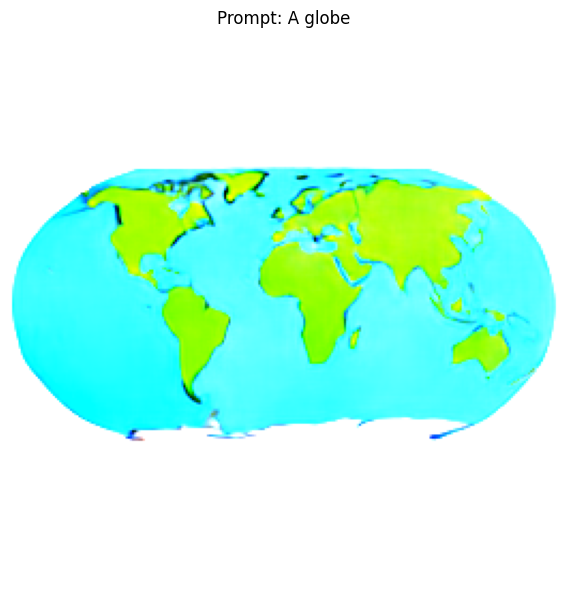

Saved results as prompt_progression.png and prompt_final.png
Text-to-image generation complete!


In [31]:
import torch
import torch.nn as nn
from diffusers import AutoencoderKL, UNet2DConditionModel
from transformers import CLIPTextModel, CLIPTokenizer
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# === Load Models & Scheduler ===

# 1) DDIM Scheduler
class DDIMScheduler:
    def __init__(self, num_train_timesteps=1000, beta_start=1e-4, beta_end=0.02):
        self.num_train_timesteps = num_train_timesteps
        self.betas = torch.linspace(beta_start, beta_end, num_train_timesteps, device=device)
        self.alphas = 1 - self.betas
        self.alpha_cumprod = torch.cumprod(self.alphas, dim=0)
        self.sqrt_alpha_cumprod = torch.sqrt(self.alpha_cumprod)
        self.sqrt_one_minus_alpha_cumprod = torch.sqrt(1 - self.alpha_cumprod)

    def add_noise(self, x0, t, noise):
        a = self.sqrt_alpha_cumprod[t][:, None, None, None]
        b = self.sqrt_one_minus_alpha_cumprod[t][:, None, None, None]
        return a * x0 + b * noise

    def _get_prev(self, t, steps):
        step_ratio = self.num_train_timesteps // steps
        prev = torch.clamp(t - step_ratio, min=0).to(device)
        return prev

    def step(self, model_out, t, sample, guidance_scale, num_inference_steps):
        if isinstance(t, int):
            t = torch.tensor([t], device=device)
        if t.dim()==0:
            t = t.unsqueeze(0)
        prev_t    = self._get_prev(t, num_inference_steps)
        alpha_t   = self.alpha_cumprod[t][:,None,None,None]
        alpha_prev= self.alpha_cumprod[prev_t][:,None,None,None]
        pred_orig = (sample - torch.sqrt(1-alpha_t)*model_out) / torch.sqrt(alpha_t)
        sigma     = torch.sqrt((1-alpha_prev)/(1-alpha_t) * (1 - alpha_t/alpha_prev))
        return torch.sqrt(alpha_prev)*pred_orig + sigma * model_out

    def get_timesteps_for_inference(self, steps):
        ratio = self.num_train_timesteps // steps
        ts = list(range(0, self.num_train_timesteps, ratio))
        return sorted(ts, reverse=True)


# 2) Text-conditioned U-Net
class TextConditionedUNet(nn.Module):
    def __init__(self, text_dim=512):
        super().__init__()
        self.unet = UNet2DConditionModel(
            sample_size=32, in_channels=4, out_channels=4,
            layers_per_block=2, block_out_channels=(256,512,768,1024),
            down_block_types=("DownBlock2D","DownBlock2D","CrossAttnDownBlock2D","CrossAttnDownBlock2D"),
            up_block_types=("CrossAttnUpBlock2D","CrossAttnUpBlock2D","UpBlock2D","UpBlock2D"),
            cross_attention_dim=text_dim, attention_head_dim=64, dropout=0.1
        ).to(device)

    def forward(self, x, t, emb, guidance_scale=1.0):
        if guidance_scale == 1.0:
            return self.unet(x, t, encoder_hidden_states=emb).sample
        uncond    = torch.zeros_like(emb)
        emb_cat   = torch.cat([uncond, emb], dim=0)
        x_cat     = torch.cat([x, x], dim=0)
        t_cat     = torch.cat([t, t], dim=0)
        pred      = self.unet(x_cat, t_cat, encoder_hidden_states=emb_cat).sample
        noise_u, noise_c = pred.chunk(2)
        return noise_u + guidance_scale * (noise_c - noise_u)


# 3) Load the text encoder (CLIP)
print("Loading CLIP text encoder...")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")
text_encoder.eval()

# 4) Load your VAE
print("Loading VAE...")
vae = AutoencoderKL.from_pretrained(
    "runwayml/stable-diffusion-v1-5", subfolder="vae"
).to(device)
ckpt = torch.load("best_fine_tuned_vae.pth", map_location=device)
missing, unexpected = vae.load_state_dict(ckpt, strict=False)
print("VAE load - missing keys:", missing)
print("VAE load - unexpected keys:", unexpected)
vae.eval()

# Get VAE scaling factor
scale = vae.config.scaling_factor  # ≈0.18215

# 5) EMA helper
class EMA:
    def __init__(self, model, decay=0.9999):
        self.decay  = decay
        self.shadow = {n:p.data.clone() for n,p in model.named_parameters() if p.requires_grad}
        self.backup = {}
    def update(self, model):
        for n,p in model.named_parameters():
            if p.requires_grad:
                self.shadow[n] = self.decay * self.shadow[n] + (1-self.decay) * p.data
    def apply_shadow(self, model):
        for n,p in model.named_parameters():
            if p.requires_grad:
                self.backup[n] = p.data
                p.data        = self.shadow[n]
    def restore(self, model):
        for n,p in model.named_parameters():
            if p.requires_grad:
                p.data = self.backup[n]
        self.backup.clear()
    def state_dict(self):    return self.shadow
    def load_state_dict(self, sd): self.shadow = sd

# 6) Instantiate UNet, scheduler, EMA
print("Initializing UNet and scheduler...")
unet = TextConditionedUNet(text_dim=512)
scheduler = DDIMScheduler(num_train_timesteps=1000)
ema = EMA(unet)

# 7) Load your trained model weights
print("Loading model checkpoint...")
try:
    ema_state = torch.load("outputs/best_diffusion_model_ema.pth", map_location=device)
    ema.load_state_dict(ema_state)
    ema.apply_shadow(unet)
    print("Loaded EMA weights successfully")
except:
    print("Failed to load EMA weights, trying regular model weights...")
    model_state = torch.load("outputs/best_diffusion_model_ema.pth", map_location=device)
    unet.load_state_dict(model_state)
    print("Loaded regular model weights")

unet.eval()

# === Text processing function ===
def process_text(text):
    """Process text input into CLIP text embeddings"""
    text_input = tokenizer(
        text,
        padding="max_length",
        max_length=tokenizer.model_max_length,
        truncation=True,
        return_tensors="pt"
    )

    with torch.no_grad():
        encoder_output = text_encoder(
            text_input.input_ids.to(device)
        )
        # Make sure we're getting the right output
        if hasattr(encoder_output, 'last_hidden_state'):
            text_embeddings = encoder_output.last_hidden_state
        else:
            # If it's a tuple, take first element
            text_embeddings = encoder_output[0]

    # Add batch dimension if needed
    if text_embeddings.dim() == 2:
        text_embeddings = text_embeddings.unsqueeze(1)

    return text_embeddings

# === Generation function ===
def generate_from_prompt(prompt, guidance_scale=7.5, steps=100):
    """Generate an image from a text prompt"""
    print(f"Generating image for prompt: '{prompt}'")

    # Get text embeddings
    text_embeddings = process_text(prompt)

    # Debug embeddings shape
    print(f"Text embedding shape: {text_embeddings.shape}")

    # Ensure correct shape - model expects [batch, seq_len, dim]
    if text_embeddings.dim() == 2:
        text_embeddings = text_embeddings.unsqueeze(1)
        print(f"Adjusted embedding shape: {text_embeddings.shape}")

    # Start from random noise
    x_t = torch.randn(1, 4, 32, 32, device=device)
    print(f"Initial noise shape: {x_t.shape}")

    timesteps = scheduler.get_timesteps_for_inference(steps=steps)

    # For visualization
    latents_chain = [x_t.cpu()]

    print(f"Running {steps} denoising steps...")
    with torch.no_grad():
        for step in tqdm(timesteps):
            t_tensor = torch.tensor([step], device=device)

            # Debug input shapes before each forward pass
            if step == timesteps[0]:  # Only for first step
                print(f"x_t shape: {x_t.shape}")
                print(f"t_tensor shape: {t_tensor.shape}")
                print(f"text_embeddings shape: {text_embeddings.shape}")

            noise_pred = unet(x_t, t_tensor, text_embeddings, guidance_scale=guidance_scale)

            # Debug the noise prediction
            if step == timesteps[0]:
                print(f"Noise prediction shape: {noise_pred.shape}")

            x_t = scheduler.step(
                noise_pred, t_tensor, x_t,
                guidance_scale=guidance_scale,
                num_inference_steps=steps
            )

            # Capture intermediate steps
            if step % (scheduler.num_train_timesteps // 5) == 0:
                latents_chain.append(x_t.cpu())

        # Final step
        latents_chain.append(x_t.cpu())

        # Decode generated latent
        print(f"Final latent shape before decoding: {x_t.shape}")
        gen_img = vae.decode(x_t).sample.clamp(0, 1)
        print(f"Generated image tensor shape: {gen_img.shape}")
        gen_img = gen_img[0].permute(1, 2, 0).cpu().numpy()

    # Visualize denoising progression
    fig, axs = plt.subplots(1, len(latents_chain), figsize=(3*len(latents_chain), 3))

    for i, latent in enumerate(latents_chain):
        img_t = vae.decode(latent.to(device)).sample.clamp(0, 1)
        img = img_t[0].detach().permute(1, 2, 0).cpu().numpy()

        axs[i].imshow(img)
        axs[i].set_title("Init" if i==0 else f"Step {i*20}%" if i<5 else "Final")
        axs[i].axis("off")

    plt.tight_layout()
    return fig, gen_img

# === Debug Function ===
def inspect_tensor(tensor, name="tensor"):
    """Helper function to debug tensor shapes and values"""
    if tensor is None:
        print(f"{name} is None")
        return

    print(f"{name} - shape: {tensor.shape}, dtype: {tensor.dtype}")
    print(f"{name} - min: {tensor.min().item()}, max: {tensor.max().item()}")
    if torch.isnan(tensor).any():
        print(f"WARNING: {name} contains NaN values!")
    if torch.isinf(tensor).any():
        print(f"WARNING: {name} contains Inf values!")

# === Run manual text-to-image generation ===
prompt = input("Enter your prompt: ").strip()

if prompt:
    print(f"\n=== Generating image for: '{prompt}' ===")
    try:
        # Process text and debug embeddings
        text_embeddings = process_text(prompt)
        inspect_tensor(text_embeddings, "Text embeddings")

        fig, img = generate_from_prompt(
            prompt=prompt,
            guidance_scale=7.5,
            steps=100
        )

        # Save the visualization
        plt.figure(fig.number)
        plt.savefig("prompt_progression.png")
        plt.close(fig)

        # Save just the final image
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Prompt: {prompt}")
        plt.tight_layout()
        plt.savefig("prompt_final.png")
        plt.show()

        print("Saved results as prompt_progression.png and prompt_final.png")

    except Exception as e:
        print(f"Error processing prompt '{prompt}': {str(e)}")
        import traceback
        traceback.print_exc()
else:
    print("No prompt entered. Exiting.")

print("Text-to-image generation complete!")